# Energy Sector ESG Analysis

This notebook performs exploratory data analysis (EDA) on the energy sector ESG dataset and builds a two-layer predictive model structure.

### 1. Setting Up and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set the aesthetic style of the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

In [3]:
import os
import sys

# Add the parent directory to the system path
sys.path.append(os.path.abspath('..'))

from EDA.clean_data import clean_data

# Define the relative path to the CSV file
file_path = os.path.join('..', 'Data', 'energy_cleaned.csv')

# Load the data
df = pd.read_csv(file_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Number of companies: {df['Company'].nunique()}")
print(f"Years covered: {sorted(df['Year'].unique())}")

Dataset shape: (1224, 142)
Number of companies: 122
Years covered: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


### 2. Exploratory Data Analysis

#### 2.1 Basic Dataset Overview

In [4]:
# Let's look at the first few rows
df.head()

Company Ticker  Year BESG ESG Score  \
0  ACS Actividades de Construccion y Servicios SA    ACS  2014            NaN   
1  ACS Actividades de Construccion y Servicios SA    ACS  2015          1.850   
2  ACS Actividades de Construccion y Servicios SA    ACS  2016          2.170   
3  ACS Actividades de Construccion y Servicios SA    ACS  2017          2.760   
4  ACS Actividades de Construccion y Servicios SA    ACS  2018          2.630   

  BESG Environmental Pillar Score BESG Social Pillar Score  \
0                             NaN                      NaN   
1                           0.660                    2.380   
2                           1.130                    2.370   
3                           1.130                    4.300   
4                           1.110                    4.200   

  BESG Governance Pillar Score ESG Disclosure Score  \
0                          NaN               50.729   
1                        3.660               55.296   
2                        4.050               55.497   
3                        4.110               57.248   
4                        3.640               62.609   

  Environmental Disclosure Score Social Disclosure Score  ...  \
0                         37.511                  33.676  ...   
1                         42.616                  41.717  ...   
2                         48.354                  36.578  ...   
3                         50.317                  44.891  ...   
4                         52.280                  59.039  ...   

  Raw Materials Used Percentage Gender Pay Gap Employees Ex Management  \
0                NaN                                               NaN   
1                NaN                                               NaN   
2                NaN                                               NaN   
3          5,140.650                                               NaN   
4          8,653.300                                               NaN   

  Percentage Raw Material from Sustainable Sources Revenue, Adj  \
0                                              NaN          NaN   
1                                              NaN          NaN   
2                                              NaN          NaN   
3                                              NaN          NaN   
4                                              NaN          NaN   

  Net Income, Adj Margin % EPS, Adj Market Cap ($M) Market Cap Category  \
0             NaN      NaN      NaN         13716.9             Mid Cap   
1             NaN      NaN      NaN         13716.9             Mid Cap   
2             NaN      NaN      NaN         13716.9             Mid Cap   
3             NaN      NaN      NaN         13716.9             Mid Cap   
4             NaN      NaN      NaN         13716.9             Mid Cap   

  Country  
0   Spain  
1   Spain  
2   Spain  
3   Spain  
4   Spain  

[5 rows x 142 columns]

In [5]:
# Basic statistics for numeric columns
df.describe()

Year  Board Age Limit  80%+ Workforce Gender Pay Gap Waterfall  \
count  1224.000000       262.000000                                73.000000   
mean   2017.998366        73.190840                                17.088781   
std       3.741001         1.910305                                29.537263   
min    2005.000000        70.000000                               -16.970000   
25%    2016.000000        72.000000                                 2.180000   
50%    2018.000000        73.000000                                 5.800000   
75%    2021.000000        75.000000                                21.000000   
max    2024.000000        78.000000                               100.000000   

       Pct Minorities in Management  \
count                     92.000000   
mean                      17.062478   
std                        8.866716   
min                        5.000000   
25%                       11.000000   
50%                       16.950000   
75%                       20.650000   
max                       73.850000   

       Percentage Gender Pay Gap for Senior Management  \
count                                        58.000000   
mean                                         92.134483   
std                                           9.857361   
min                                          60.500000   
25%                                          88.000000   
50%                                          94.000000   
75%                                          98.000000   
max                                         107.000000   

       Percentage Gender Pay Gap Mid & Other Management  \
count                                        103.000000   
mean                                          92.928078   
std                                            9.418271   
min                                           17.000000   
25%                                           90.910000   
50%                                           95.000000   
75%                                           96.800000   
max                                          108.400000   

       Pct Recycled Materials  Percentage of Suppliers in Non-Compliance  \
count               20.000000                                   8.000000   
mean                16.010000                                   1.119125   
std                 25.619302                                   0.752484   
min                  0.030000                                   0.000000   
25%                  0.195000                                   0.596000   
50%                  9.290000                                   1.057500   
75%                 11.707500                                   1.675000   
max                 85.000000                                   2.190000   

       ODS Emissions  Percentage Gender Pay Gap Employees Ex Management  \
count      76.000000                                          34.000000   
mean        0.002158                                          90.796412   
std         0.008440                                          12.637465   
min         0.000000                                          27.000000   
25%         0.000000                                          88.000000   
50%         0.000000                                          90.090000   
75%         0.001000                                          96.750000   
max         0.055000                                         103.000000   

       Percentage Raw Material from Sustainable Sources   Margin %  EPS, Adj  \
count                                         11.000000   9.000000  9.000000   
mean                                          82.981818  15.381889  0.094444   
std                                           22.857026  15.172870  0.147208   
min                                           21.800000  -0.024000 -0.001000   
25%                                           80.000000  11.281000  0.040000   
50%                                          

In [6]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_pct
})
missing_df = missing_df.sort_values('Percentage (%)', ascending=False)
missing_df[missing_df['Percentage (%)'] > 20].head(10)

Missing Values  \
Indep Directors                                             1221   
Percentage of Suppliers in Non-Compliance                   1216   
Margin %                                                    1215   
Transition Plan Claim                                       1215   
Revenue, Adj                                                1215   
Net Income, Adj                                             1215   
EPS, Adj                                                    1215   
Percentage Raw Material from Sustainable Sources            1213   
Number Supplier Facilities Audited                          1213   
Adopts TNFD Recommendations                                 1209   

                                                  Percentage (%)  
Indep Directors                                        99.754902  
Percentage of Suppliers in Non-Compliance              99.346405  
Margin %                                               99.264706  
Transition Plan Claim                                  99.264706  
Revenue, Adj                                           99.264706  
Net Income, Adj                                        99.264706  
EPS, Adj                                               99.264706  
Percentage Raw Material from Sustainable Sources       99.101307  
Number Supplier Facilities Audited                     99.101307  
Adopts TNFD Recommendations                            98.774510

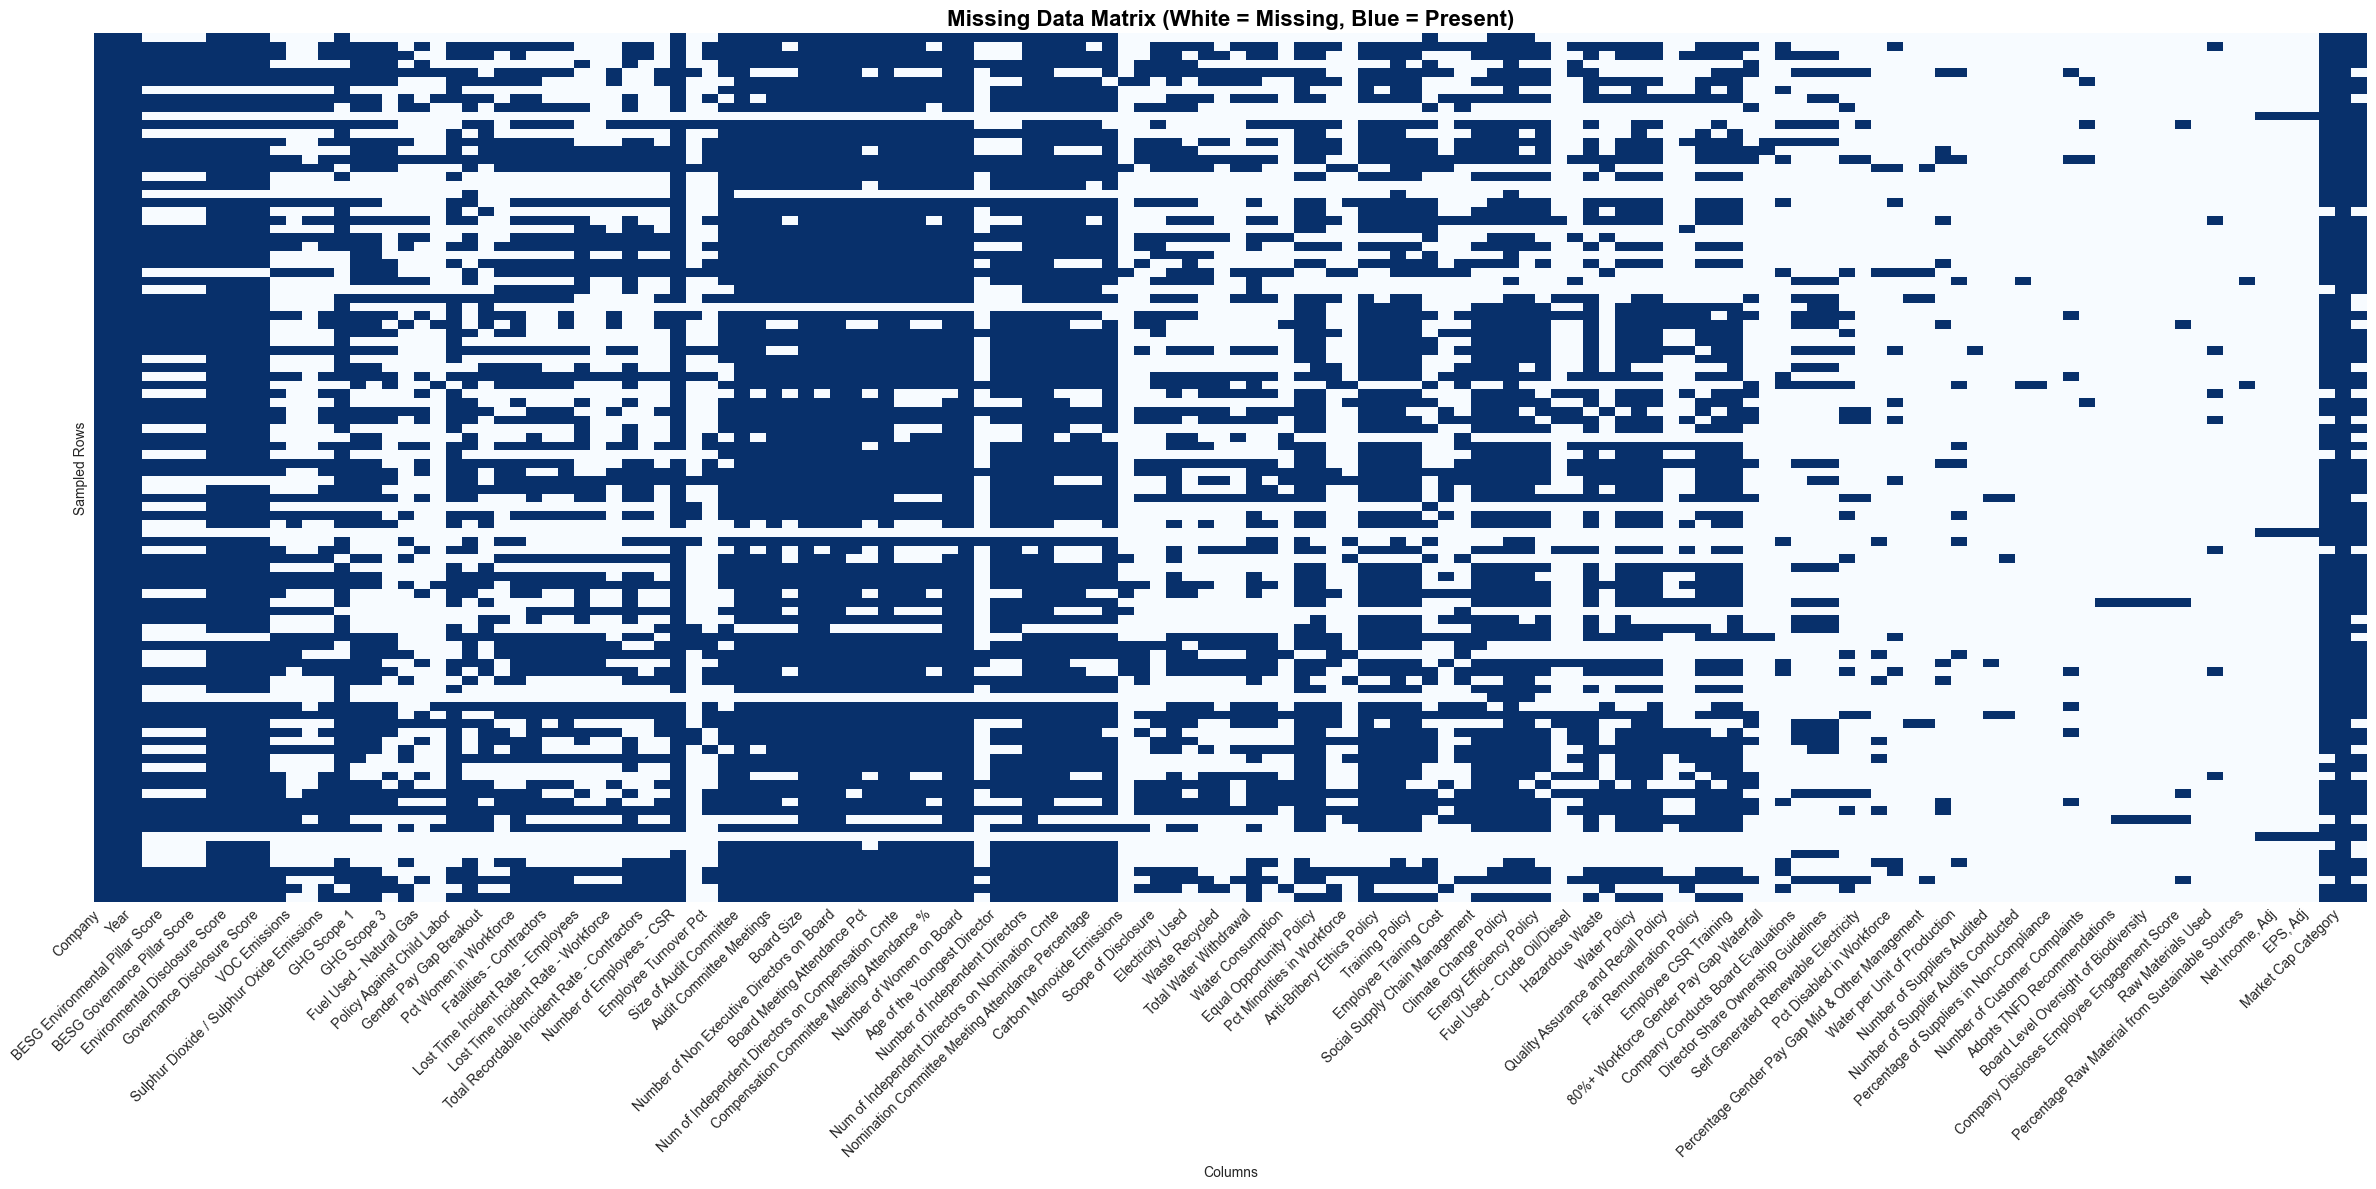

Total columns with >50% missing data: 69
Total columns with >20% missing data: 106


In [7]:
# Create a missing data matrix visualization
plt.figure(figsize=(24, 12))  # Increased figure size to accommodate more columns

# Create a matrix where blue represents present values and white represents missing values
# Sample a subset of rows for better visibility
sample_size = min(100, len(df))
sampled_rows = np.random.choice(df.index, sample_size, replace=False)

# Create the heatmap - white spaces indicate missing values
ax = sns.heatmap(~df.loc[sampled_rows].isnull(),
                cmap='Blues',
                cbar=False,
                yticklabels=False)

plt.title('Missing Data Matrix (White = Missing, Blue = Present)', fontsize=16, weight='bold', color='black')
plt.xlabel('Columns')
plt.ylabel('Sampled Rows')
plt.xticks(rotation=45, ha='right', fontsize=10)



plt.tight_layout()
plt.show()

# Print summary
print(f"Total columns with >50% missing data: {(missing_df['Percentage (%)'] > 50).sum()}")
print(f"Total columns with >20% missing data: {(missing_df['Percentage (%)'] > 20).sum()}")


Columns with >70% missing: 46 out of 142
Columns with >50% missing: 69 out of 142
Columns with <20% missing: 36 out of 142


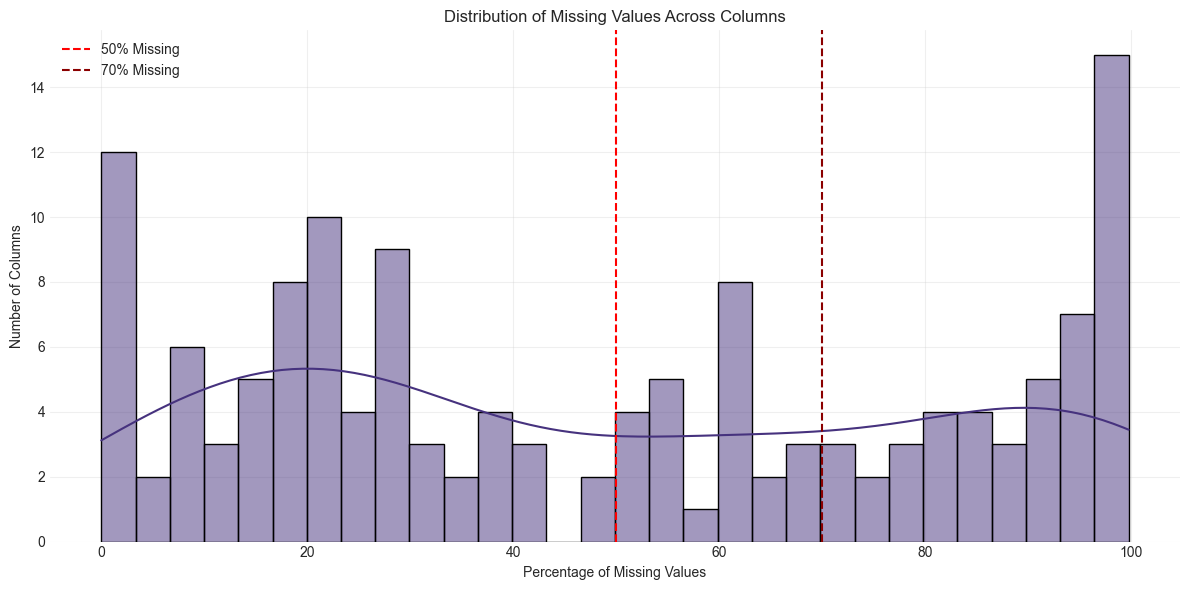

In [8]:
# Plot distribution of missing values in columns
# Create a histogram of missing values percentages
plt.figure(figsize=(12, 6))
sns.histplot(missing_df['Percentage (%)'], bins=30, kde=True, palette='viridis')
plt.title('Distribution of Missing Values Across Columns')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Columns')
plt.axvline(x=50, color='r', linestyle='--', label='50% Missing')
plt.axvline(x=70, color='darkred', linestyle='--', label='70% Missing')
plt.legend()
plt.grid(True, alpha=0.3)

sns.despine(left=True, bottom=True)

# Print some statistics
print(f"Columns with >70% missing: {(missing_df['Percentage (%)'] > 70).sum()} out of {len(missing_df)}")
print(f"Columns with >50% missing: {(missing_df['Percentage (%)'] > 50).sum()} out of {len(missing_df)}")
print(f"Columns with <20% missing: {(missing_df['Percentage (%)'] < 20).sum()} out of {len(missing_df)}")

plt.tight_layout()
plt.show()

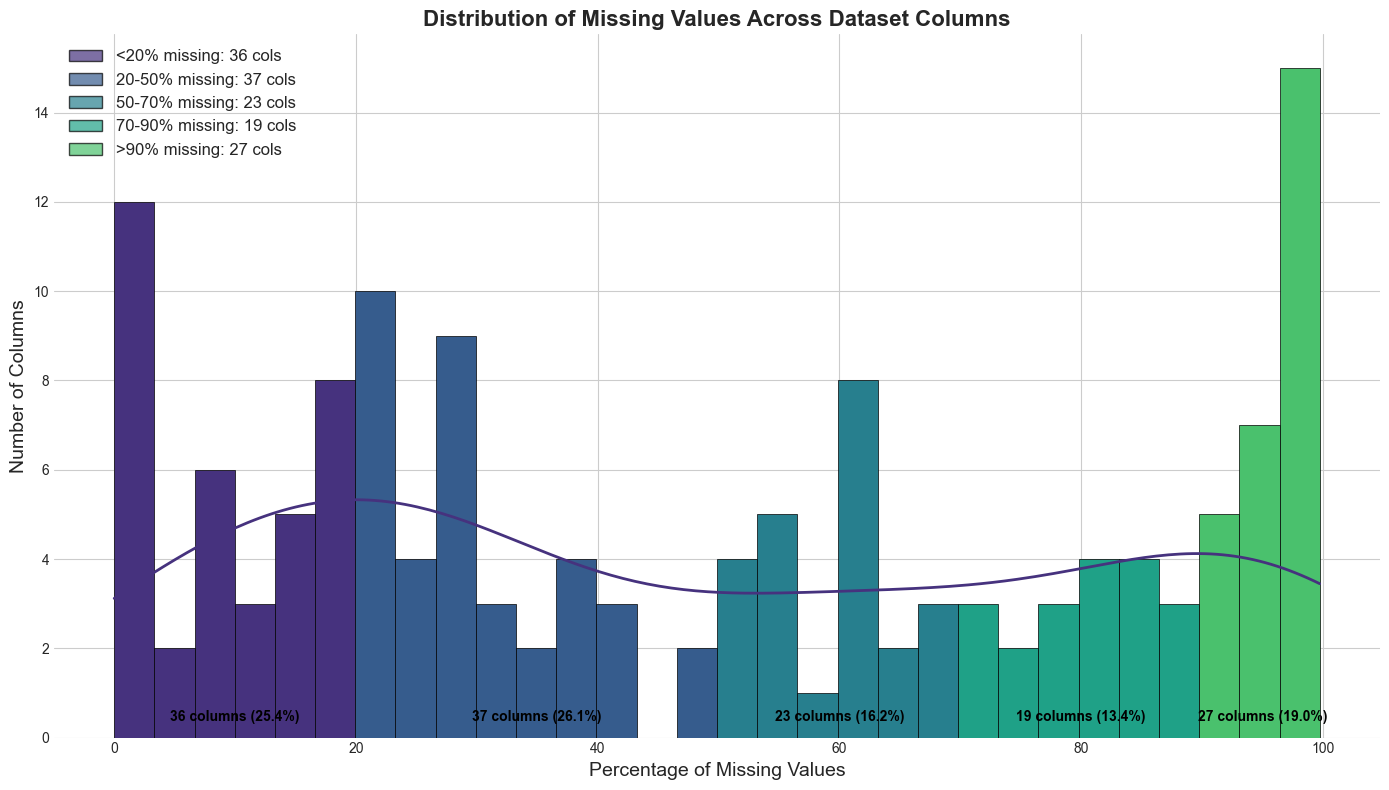

In [9]:
from matplotlib.patches import Patch
from scipy import stats

# Create figure with seaborn styling
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Define color palette for different ranges of missing values
colors = sns.color_palette(n_colors=5)
bins = [0, 20, 50, 70, 90, 100]  # Bin edges for missing value percentages
labels = ['<20%', '20-50%', '50-70%', '70-90%', '>90%']  # Labels for the bins

# Calculate counts for each bin for summary statistics
bin_counts = []
for i in range(len(bins)-1):
    count = ((missing_df['Percentage (%)'] >= bins[i]) &
             (missing_df['Percentage (%)'] < bins[i+1])).sum()
    bin_counts.append(count)

# Create the histogram with seaborn
ax = sns.histplot(missing_df['Percentage (%)'], bins=30,
                kde=True, line_kws={'linewidth': 2, 'color': 'navy'},
                alpha=0.7, edgecolor='black', linewidth=0.5)

# Color the bars based on their x-coordinate
for i, patch in enumerate(ax.patches):
    bin_center = patch.get_x() + patch.get_width()/2
    if bin_center < 20:
        patch.set_facecolor(colors[0])
    elif bin_center < 50:
        patch.set_facecolor(colors[1])
    elif bin_center < 70:
        patch.set_facecolor(colors[2])
    elif bin_center < 90:
        patch.set_facecolor(colors[3])
    else:
        patch.set_facecolor(colors[4])

# Add annotations for percentages
total_cols = len(missing_df)
for i, (bin_start, bin_end, count) in enumerate(zip(bins[:-1], bins[1:], bin_counts)):
    plt.annotate(f'{count} columns ({count/total_cols:.1%})',
                xy=((bin_start + bin_end)/2, 0),
                xytext=(0, 10), textcoords='offset points',
                ha='center', va='bottom',
                color='black', fontweight='bold')

# Add title and labels
plt.title('Distribution of Missing Values Across Dataset Columns', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Missing Values', fontsize=14)
plt.ylabel('Number of Columns', fontsize=14)

# Add a custom legend
legend_elements = [Patch(facecolor=colors[i], edgecolor='black', alpha=0.7,
                        label=f'{labels[i]} missing: {bin_counts[i]} cols')
                for i in range(len(colors))]
plt.legend(handles=legend_elements, fontsize=12, framealpha=0.9)

# Remove spines
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


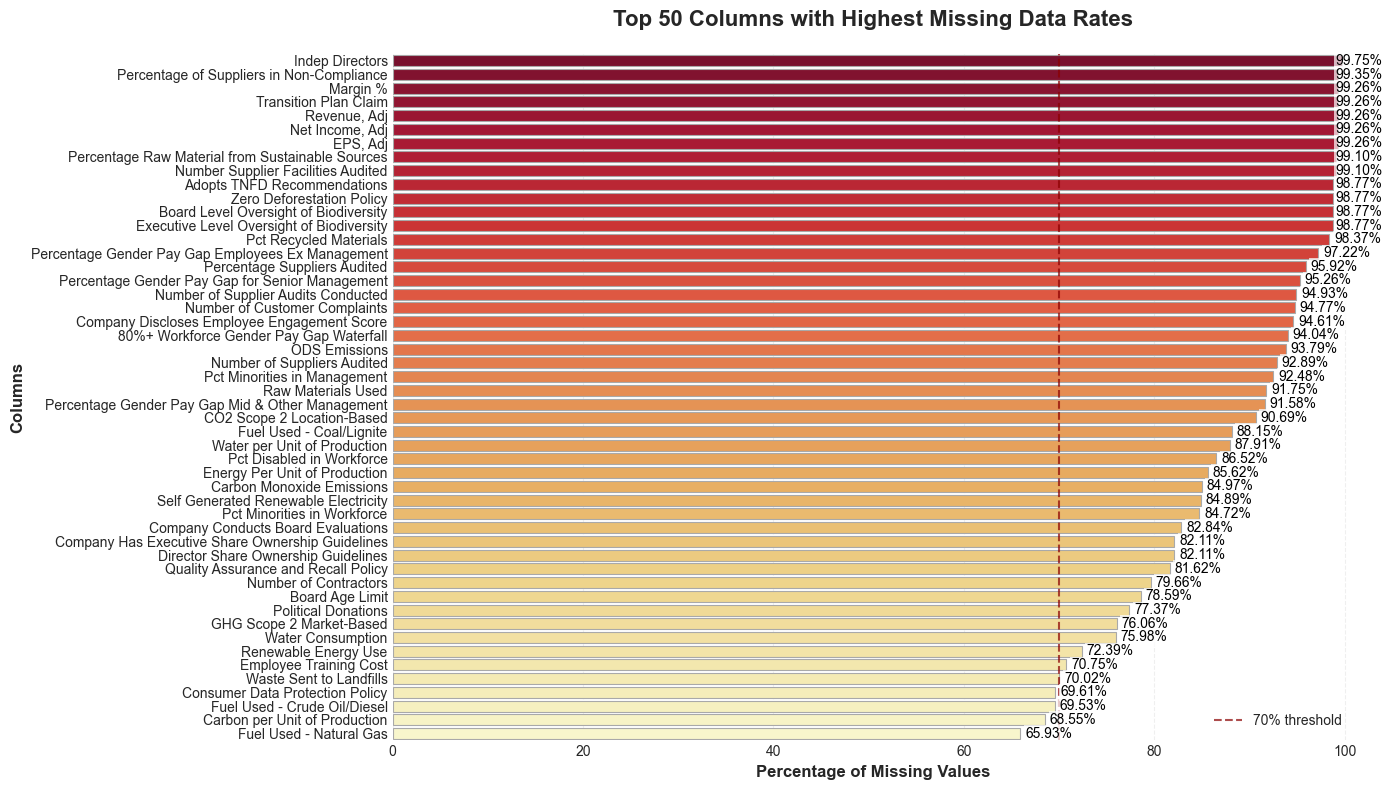

In [10]:
# Plot the top 15 columns with highest missing percentages
plt.figure(figsize=(14, 8))
top_missing = missing_df.head(50)

# Create custom colormap based on severity
colors = sns.color_palette("YlOrRd", n_colors=len(top_missing))
colors = reversed(colors)  # Reverse the color palette for better visual effect

# Create the horizontal bar plot
bars = sns.barplot(x=top_missing['Percentage (%)'], y=top_missing.index, palette=colors, orient='h')

# Enhance bar appearance
for i, bar in enumerate(bars.patches):
    # Set edge color and line width for better definition
    bar.set_edgecolor('darkgray')
    bar.set_linewidth(0.8)

    # Add value annotations with better formatting
    value = top_missing['Percentage (%)'].iloc[i]
    plt.text(min(value + 0.5, 99), i, f"{value:.2f}%",
             color='black', va='center', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Improve labels and title
plt.xlabel('Percentage of Missing Values', fontsize=12, fontweight='bold')
plt.ylabel('Columns', fontsize=12, fontweight='bold')
plt.title(f'Top {len(top_missing)} Columns with Highest Missing Data Rates',
          fontsize=16, fontweight='bold', pad=20)

# Set limits and grid
plt.xlim(0, 101)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add reference lines
plt.axvline(x=70, color='darkred', linestyle='--', alpha=0.7, label='70% threshold')
plt.legend()

# Clean up the appearance
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

#### 2.2 ESG Score Distribution Analysis

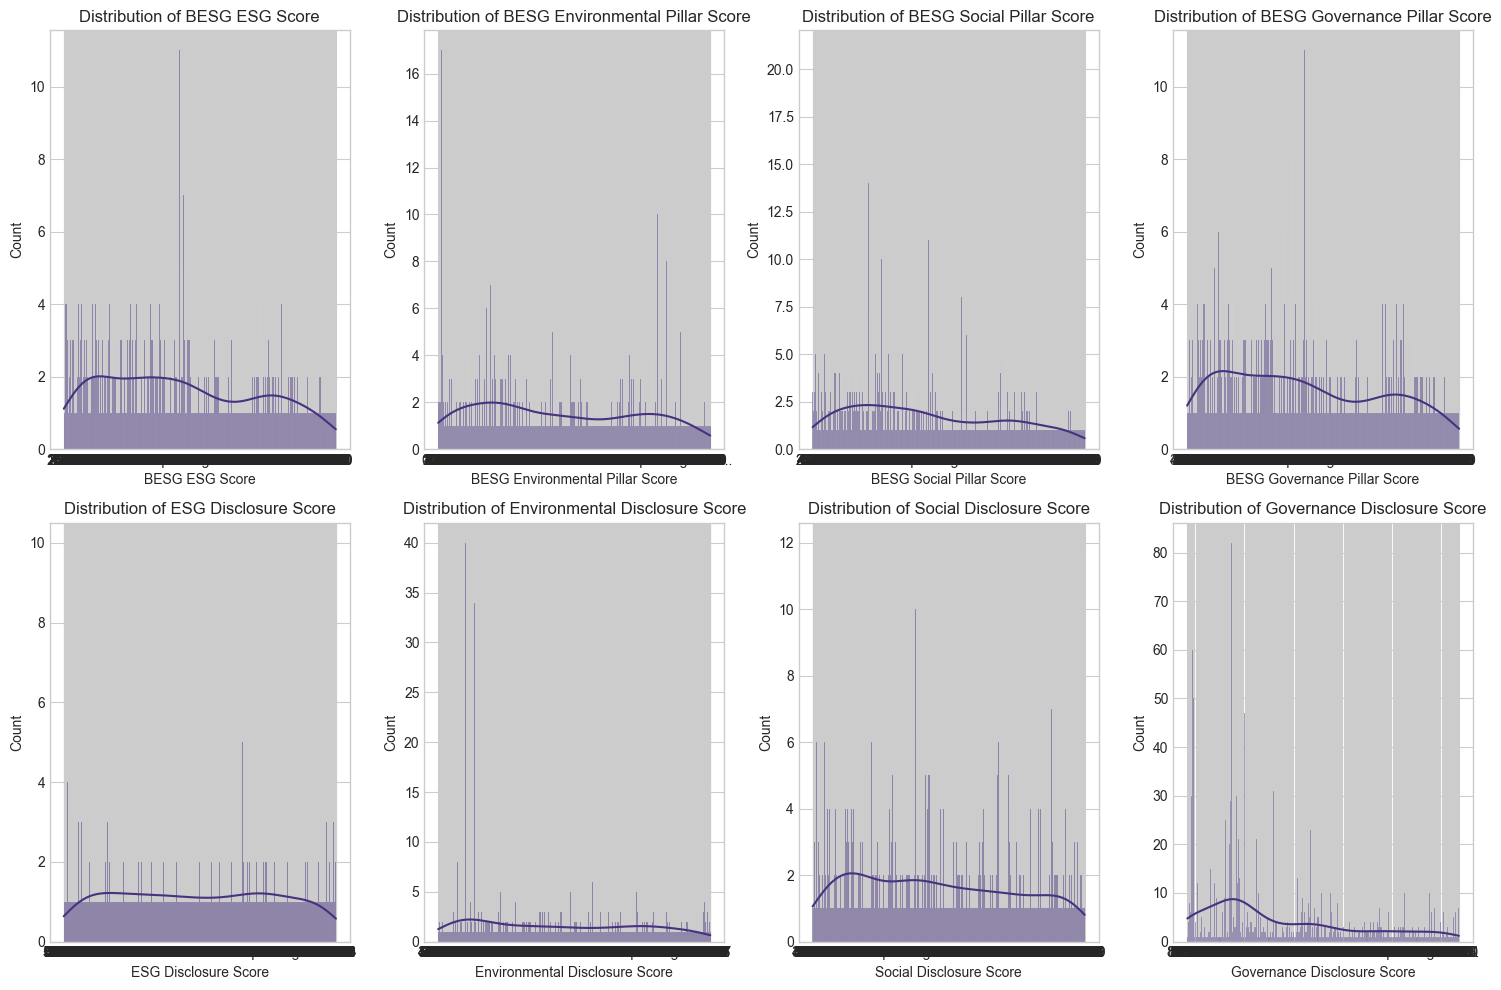

In [11]:
# Define ESG score columns to analyze
esg_score_columns = [
    'BESG ESG Score',
    'BESG Environmental Pillar Score',
    'BESG Social Pillar Score',
    'BESG Governance Pillar Score',
    'ESG Disclosure Score',
    'Environmental Disclosure Score',
    'Social Disclosure Score',
    'Governance Disclosure Score'
]

# Basic statistics for ESG score columns
esg_stats = df[esg_score_columns].describe().T
esg_stats['null_pct'] = df[esg_score_columns].isnull().mean() * 100
esg_stats

# Create histograms for each ESG score
plt.figure(figsize=(15, 10))
for i, col in enumerate(esg_score_columns):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[col].dropna(), kde=True, palette='viridis', bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

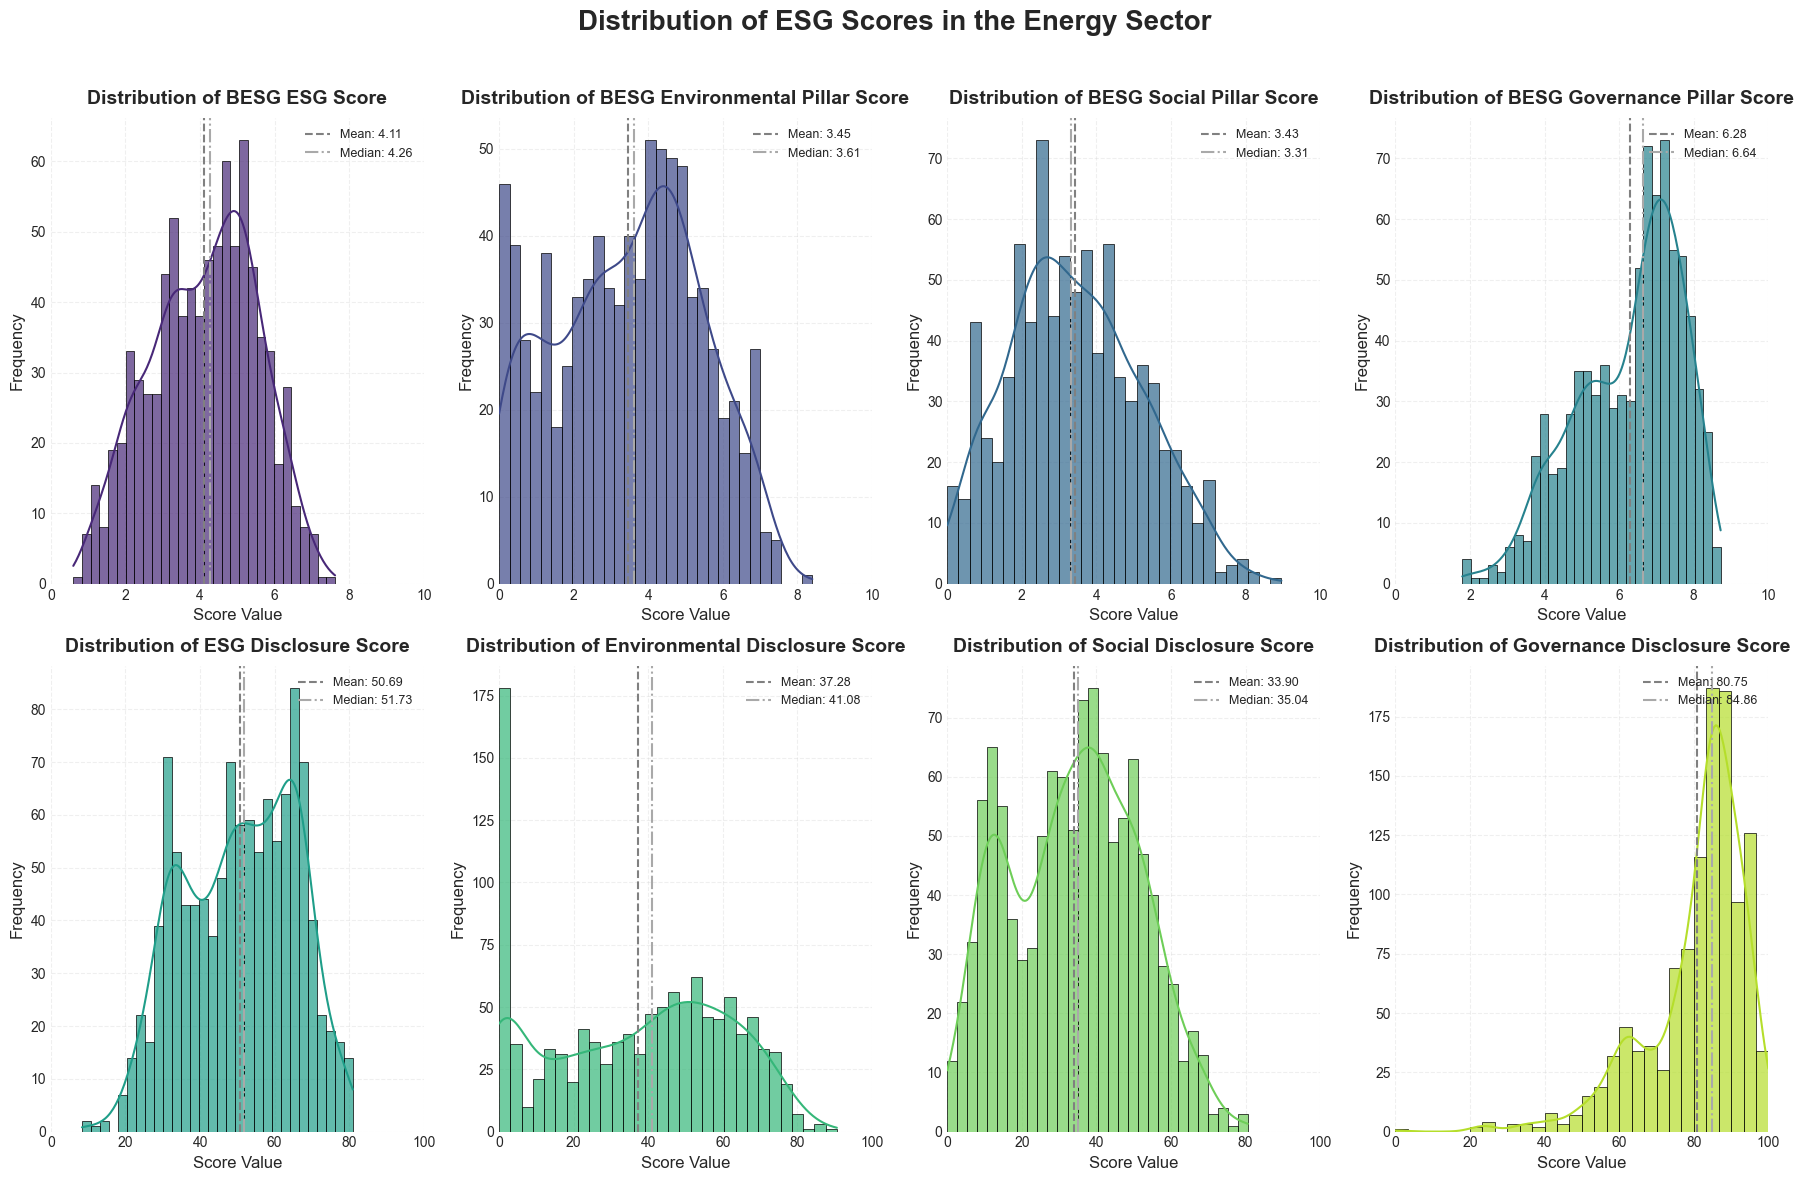

In [12]:
# Define ESG score columns to analyze
esg_score_columns = [
    'BESG ESG Score',
    'BESG Environmental Pillar Score',
    'BESG Social Pillar Score',
    'BESG Governance Pillar Score',
    'ESG Disclosure Score',
    'Environmental Disclosure Score',
    'Social Disclosure Score',
    'Governance Disclosure Score'
]

# Ensure all data is numeric
for col in esg_score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Basic statistics for ESG score columns
esg_stats = df[esg_score_columns].describe().T
esg_stats['null_pct'] = df[esg_score_columns].isnull().mean() * 100
esg_stats

# Create a figure with a custom style for prettier plots
plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of ESG Scores in the Energy Sector', fontsize=20, y=0.98, fontweight='bold')

# Define a custom color palette
colors = sns.color_palette('viridis', n_colors=len(esg_score_columns))

# Plot each histogram with enhanced styling
for i, col in enumerate(esg_score_columns):
    ax = plt.subplot(2, 4, i+1)

    # Get data and statistics - already converted to numeric with coerced errors to NaN
    data = df[col].dropna()

    mean_val = data.mean()
    median_val = data.median()

    # Create the histogram with improved appearance
    sns.histplot(data, kde=True, color=colors[i], bins=30,
                 alpha=0.7, edgecolor='black', linewidth=0.5,
                 line_kws={'color': 'darkblue', 'linewidth': 1.5})

    # Add vertical lines for mean and median
    plt.axvline(mean_val, color='grey', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='darkgrey', linestyle='-.', linewidth=1.5, label=f'Median: {median_val:.2f}')

    # Improve title and labels
    plt.title(f'Distribution of {col}', fontsize=14, pad=10, fontweight='bold')
    plt.xlabel('Score Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add a legend
    plt.legend(fontsize=9, loc='upper right')

    # Set consistent x-axis limits based on the type of score
    if 'Disclosure' in col:
        plt.xlim(0, 100)  # Disclosure scores are typically 0-100
    else:
        plt.xlim(0, 10)   # Bloomberg ESG scores are typically 0-10

    # Improve grid
    plt.grid(True, alpha=0.3, linestyle='--')

    # Remove top and right spines for cleaner look
    sns.despine(left=True, bottom=True)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.show()

#### 2.3 Correlation Analysis

In [13]:
# Clean data for correlation analysis
df_clean = clean_data(df)
print(df_clean.columns)

Dataset shape: (850, 65)
Number of companies: 118
Year range: 2015 to 2023
Imputing missing values for numeric columns: ['BESG ESG Score', 'BESG Environmental Pillar Score', 'BESG Social Pillar Score', 'BESG Governance Pillar Score', 'ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score', 'Governance Disclosure Score', 'GHG Scope 1', 'GHG Scope 2 Location-Based', 'Pct Women in Workforce', 'Fatalities - Employees', 'Fatalities - Total', 'Total Recordable Incident Rate - Employees', 'Number of Employees - CSR', 'Years Auditor Employed', 'Size of Audit Committee', 'Number of Independent Directors on Audit Committee', 'Audit Committee Meetings', 'Audit Committee Meeting Attendance Percentage', 'Board Size', 'Number of Executives / Company Managers', 'Number of Non Executive Directors on Board', 'Number of Board Meetings for the Year', 'Board Meeting Attendance Pct', 'Size of Compensation Committee', 'Num of Independent Directors on Compensation Cmte', 'Number o

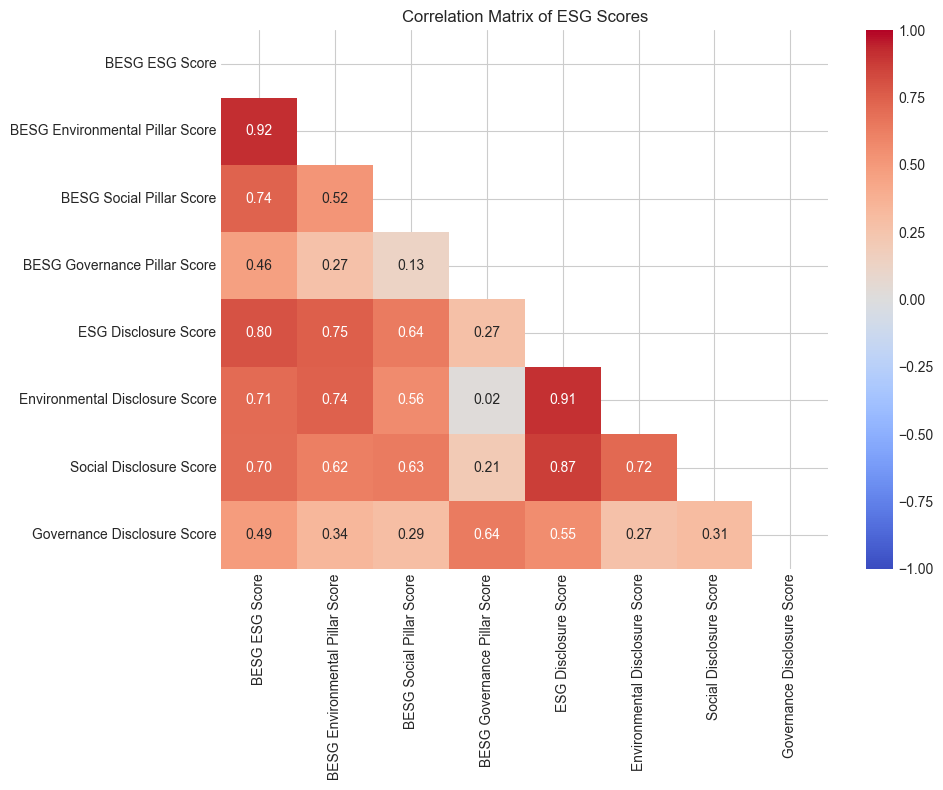

In [14]:
# Calculate correlation matrix for ESG scores
esg_corr = df_clean[esg_score_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(esg_corr, dtype=bool))
sns.heatmap(esg_corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of ESG Scores')
plt.tight_layout()
plt.show()

In [15]:
# OLS model for Bloomberg ESG Score and pillar and disclosure scores
target = 'BESG ESG Score'
features = esg_score_columns[1:]  # Exclude the target variable
X = df_clean[features]
y = df_clean[target]
X = X.dropna()
y = y[X.index]  # Align y with the rows of X
X = X.dropna()

model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         BESG ESG Score   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.695e+05
Date:                Thu, 03 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:51:22   Log-Likelihood:                          625.31
No. Observations:                 850   AIC:                                     -1237.
Df Residuals:                     843   BIC:                                     -1203.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

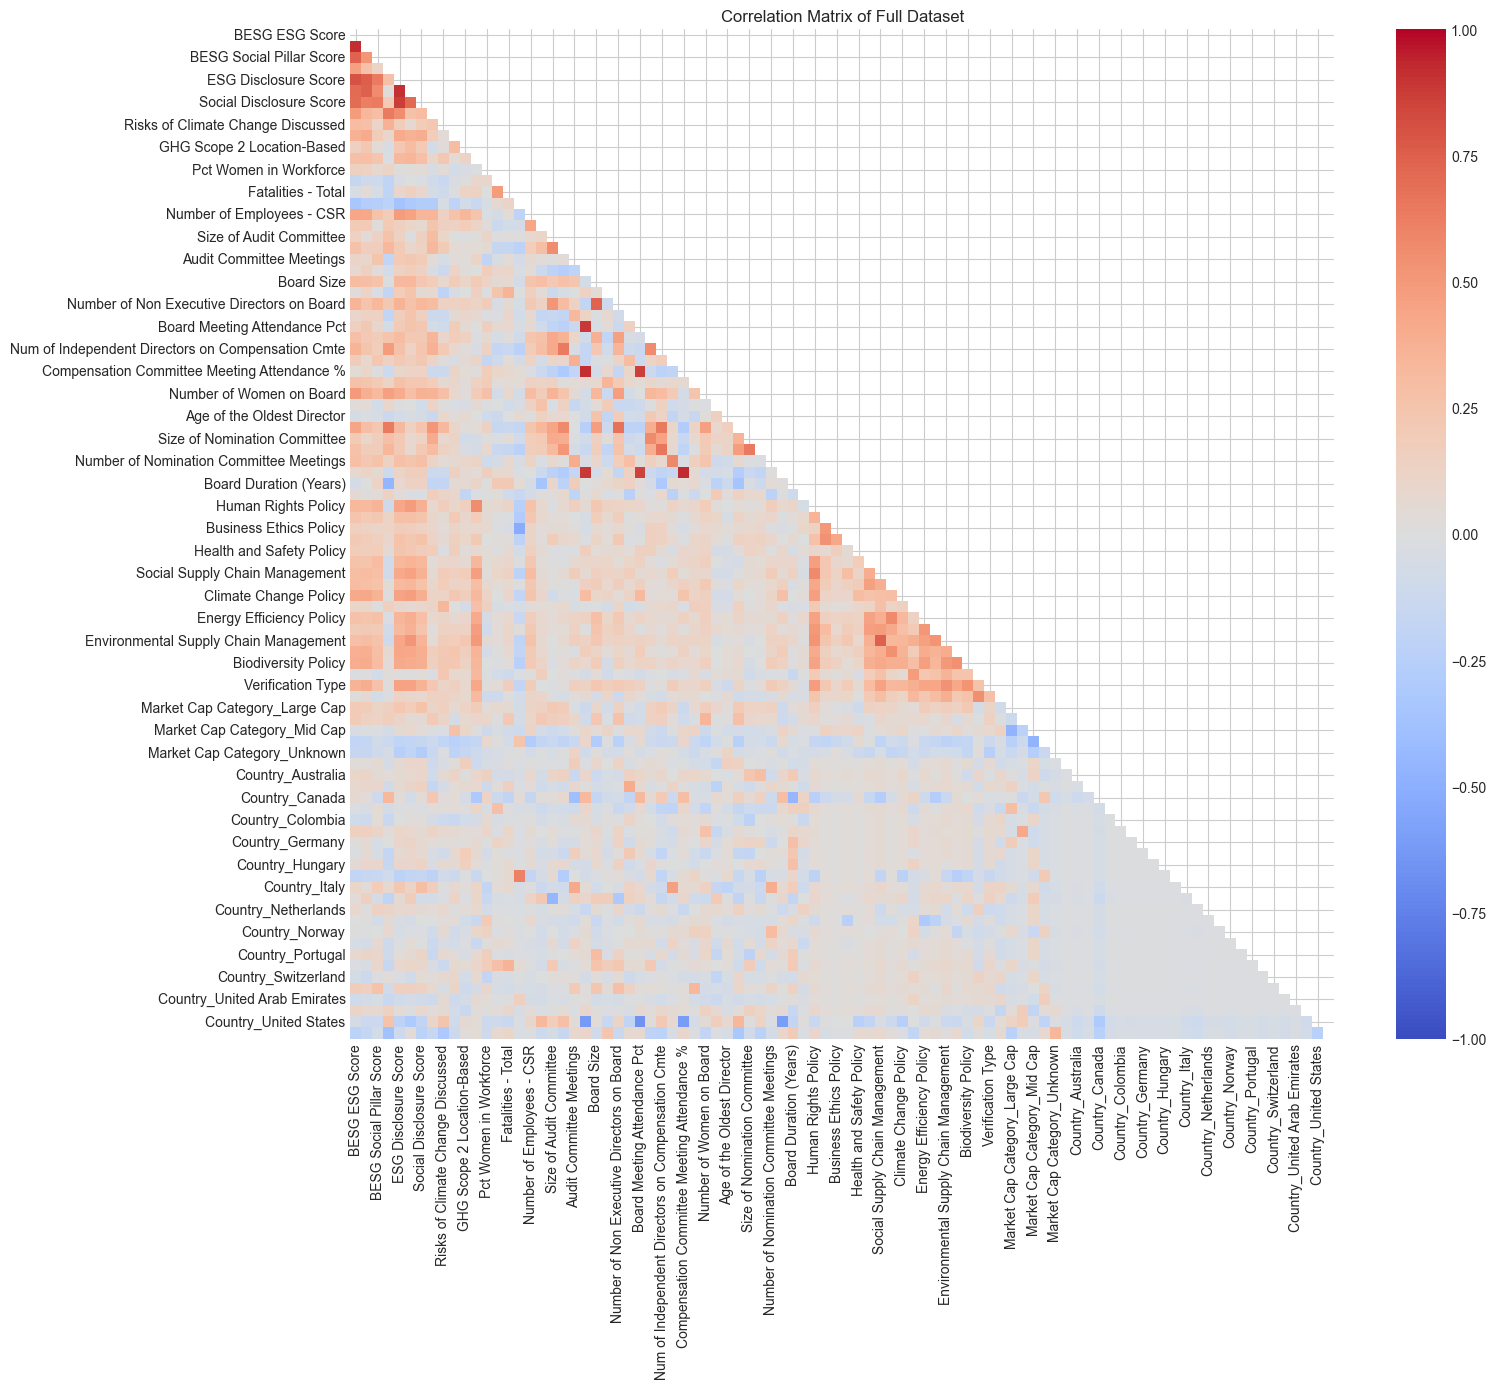

In [16]:
# Full ESG score correlation matrix with full dataset
cols_to_drop = ['Company', 'Ticker', 'Year']

esg_corr_full = df_clean.drop(columns=cols_to_drop).corr()
plt.figure(figsize=(16, 14))
mask_full = np.triu(np.ones_like(esg_corr_full, dtype=bool))
sns.heatmap(esg_corr_full, mask=mask_full, annot=False, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Full Dataset')
plt.tight_layout()
plt.show()

In [17]:
def print_top_correlations(corr_matrix, top_n=20):
    """Print the top N strongest correlations from a correlation matrix"""
    # Unstack the correlation matrix
    corr_unstack = corr_matrix.unstack()

    # Create a set to track processed pairs
    processed_pairs = set()

    # Create a list to store unique correlations
    unique_correlations = []

    # Sort by absolute correlation values
    corr_unstack = corr_unstack.sort_values(key=abs, ascending=False)

    # Process correlations
    for (var1, var2), corr in corr_unstack.items():
        # Skip self-correlations
        if var1 == var2:
            continue

        # Create a frozenset with the variable pair to identify unique pairs regardless of order
        pair = frozenset([var1, var2])

        # If we haven't seen this pair before, add it to our results
        if pair not in processed_pairs:
            unique_correlations.append((var1, var2, corr))
            processed_pairs.add(pair)

    # Print top correlations
    print(f"Top {top_n} strongest correlations:")
    for i, (var1, var2, corr) in enumerate(unique_correlations[:top_n]):
        print(f"{i+1}. {var1} - {var2}: {corr:.3f}")

# Print top correlations
print_top_correlations(esg_corr_full, top_n=20)

Top 20 strongest correlations:
1. Compensation Committee Meeting Attendance % - Nomination Committee Meeting Attendance Percentage: 0.927
2. BESG Environmental Pillar Score - BESG ESG Score: 0.918
3. Audit Committee Meeting Attendance Percentage - Compensation Committee Meeting Attendance %: 0.916
4. Environmental Disclosure Score - ESG Disclosure Score: 0.910
5. Audit Committee Meeting Attendance Percentage - Board Meeting Attendance Pct: 0.886
6. Nomination Committee Meeting Attendance Percentage - Audit Committee Meeting Attendance Percentage: 0.884
7. Social Disclosure Score - ESG Disclosure Score: 0.871
8. Compensation Committee Meeting Attendance % - Board Meeting Attendance Pct: 0.864
9. Board Meeting Attendance Pct - Nomination Committee Meeting Attendance Percentage: 0.856
10. ESG Disclosure Score - BESG ESG Score: 0.801
11. ESG Disclosure Score - BESG Environmental Pillar Score: 0.750
12. Social Supply Chain Management - Environmental Supply Chain Management: 0.748
13. BESG E

#### 2.4 Trends Over Time

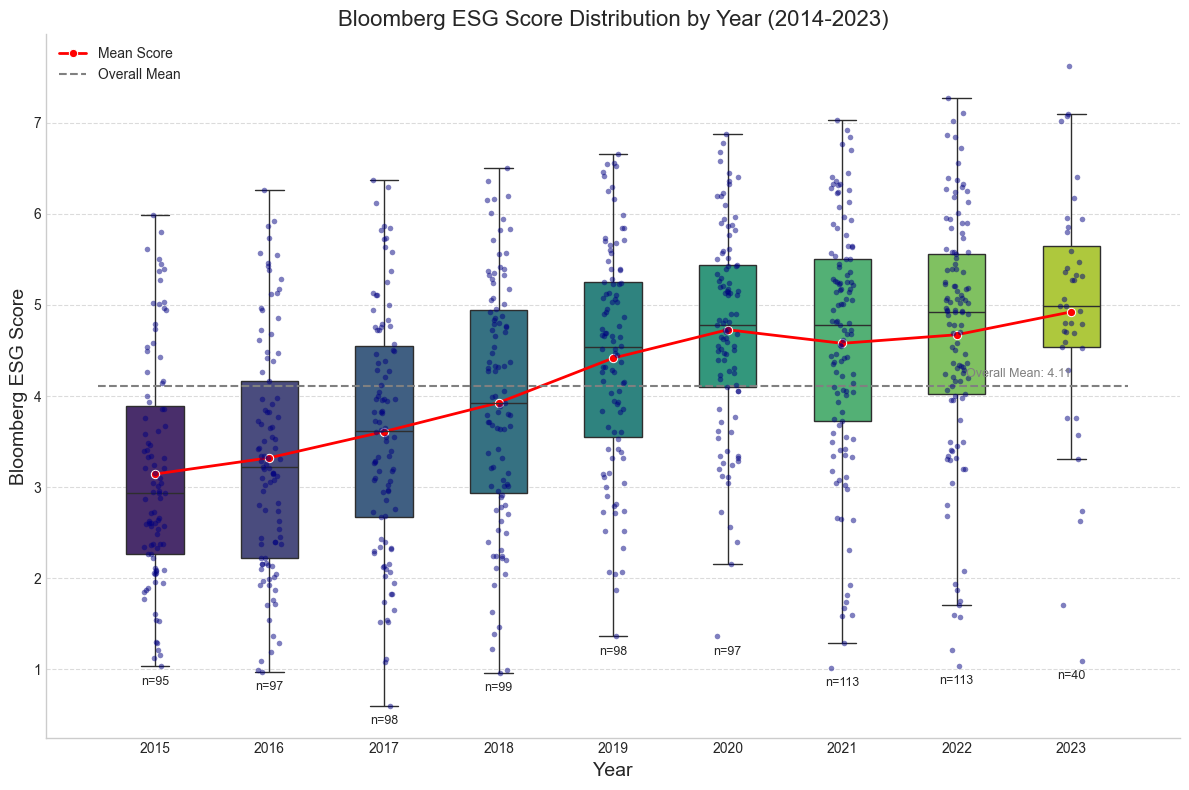

In [18]:
# Convert 'BESG ESG Score' to numeric, forcing errors to NaN
df['BESG ESG Score'] = pd.to_numeric(df['BESG ESG Score'], errors='coerce')

# Filter only rows with BESG ESG Score data
df_filtered = df.dropna(subset=['BESG ESG Score'])

# Drop rows with Years before 2014
df_filtered = df_filtered[df_filtered['Year'] >= 2015]

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

# Create the box plot without outliers
ax = sns.boxplot(x='Year', y='BESG ESG Score', data=df_filtered, palette='viridis', width=0.5, showfliers=False)

# Add individual data points with jitter
sns.stripplot(x='Year', y='BESG ESG Score', data=df_filtered,
              size=4, color='navy', alpha=0.5, jitter=True)

# Add a trend line showing the mean score per year
means = df_filtered.groupby('Year')['BESG ESG Score'].mean().reset_index()
sns.lineplot(x=means.index, y='BESG ESG Score', data=means,
             color='r', linewidth=2, label='Mean Score', marker='o')

# Enhance the plot with labels and title
plt.title('Bloomberg ESG Score Distribution by Year (2014-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Bloomberg ESG Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Annotate with some key statistics
for i, year in enumerate(sorted(df_filtered['Year'].unique())):
    year_data = df_filtered[df_filtered['Year'] == year]['BESG ESG Score']
    if not year_data.empty:
        plt.annotate(f'n={len(year_data)}',
                    xy=(i, year_data.min() - 0.2),
                    ha='center', fontsize=9)

# Add a horizontal line at the overall mean
overall_mean = df_filtered['BESG ESG Score'].mean()
sns.lineplot(x=[-0.5, len(df_filtered['Year'].unique()) - 0.5],
             y=[overall_mean, overall_mean],
             color='gray', linestyle='--', label='Overall Mean')
plt.annotate(f'Overall Mean: {overall_mean:.2f}',
             xy=(len(df_filtered['Year'].unique()) - 1, overall_mean + 0.1),
             ha='right', fontsize=9, color='gray')

# Improve aesthetics
sns.despine(left=False, bottom=False)
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# One hot encoding for categorical variables
df_encoded = pd.get_dummies(df_clean, columns=df_clean.select_dtypes(include='category').columns)
df_encoded.head()

Company Ticker  Year  \
1  ACS Actividades de Construccion y Servicios SA    ACS  2015   
2  ACS Actividades de Construccion y Servicios SA    ACS  2016   
3  ACS Actividades de Construccion y Servicios SA    ACS  2017   
4  ACS Actividades de Construccion y Servicios SA    ACS  2018   
5  ACS Actividades de Construccion y Servicios SA    ACS  2019   

   BESG ESG Score  BESG Environmental Pillar Score  BESG Social Pillar Score  \
1            1.85                             0.66                      2.38   
2            2.17                             1.13                      2.37   
3            2.76                             1.13                      4.30   
4            2.63                             1.11                      4.20   
5            2.79                             1.31                      4.21   

   BESG Governance Pillar Score  ESG Disclosure Score  \
1                          3.66                55.296   
2                          4.05                55.497   
3                          4.11                57.248   
4                          3.64                62.609   
5                          3.87                64.390   

   Environmental Disclosure Score  Social Disclosure Score  ...  \
1                          42.616                   41.717  ...   
2                          48.354                   36.578  ...   
3                          50.317                   44.891  ...   
4                          52.280                   59.039  ...   
5                          57.626                   59.039  ...   

   Country_Norway  Country_Poland  Country_Portugal  Country_Spain  \
1           False           False             False           True   
2           False           False             False           True   
3           False           False             False           True   
4           False           False             False           True   
5           False           False             False           True   

   Country_Switzerland  Country_Thailand  Country_United Arab Emirates  \
1                False             False                         False   
2                False             False                         False   
3                False             False                         False   
4                False             False                         False   
5                False             False                         False   

   Country_United Kingdom  Country_United States  Country_Unknown  
1                   False                  False            False  
2                   False                  False            False  
3                   False                  False            False  
4                   False                  False            False  
5                   False                  False            False  

[5 rows x 93 columns]

In [20]:
df_large_cap = df_encoded[df_encoded['Market Cap Category_Large Cap'] | df_encoded['Market Cap Category_Mega Cap']]
df_large_cap.shape

(220, 93)

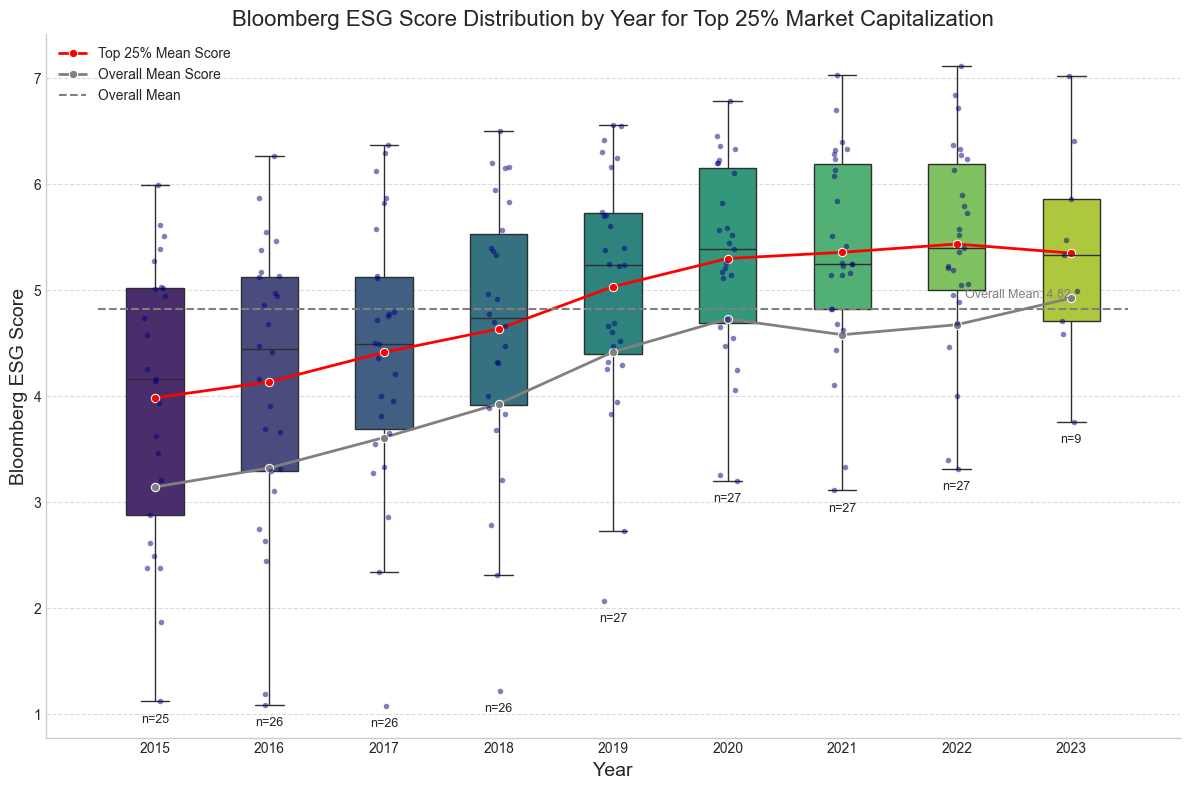

In [21]:
# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

# Create the box plot without outliers
ax = sns.boxplot(x='Year', y='BESG ESG Score', data=df_large_cap, palette='viridis',
                 width=0.5, showfliers=False)

# Add individual data points with jitter
sns.stripplot(x='Year', y='BESG ESG Score', data=df_large_cap,
              size=4, color='navy', alpha=0.5, jitter=True)

# Add a trend line showing the mean score per year
means = df_large_cap.groupby('Year')['BESG ESG Score'].mean().reset_index()
sns.lineplot(x=means.index, y='BESG ESG Score', data=means,
             color='r', linewidth=2, label='Top 25% Mean Score', marker='o')

# Add a trend line to show original trend line showing mean score per year for all companies
means_all = df_filtered.groupby('Year')['BESG ESG Score'].mean().reset_index()
sns.lineplot(x=means_all.index, y='BESG ESG Score', data=means_all,
             color='gray', linewidth=2, label='Overall Mean Score', marker='o')

# Enhance the plot with labels and title
plt.title('Bloomberg ESG Score Distribution by Year for Top 25% Market Capitalization', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Bloomberg ESG Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Annotate with some key statistics
for i, year in enumerate(sorted(df_large_cap['Year'].unique())):
    year_data = df_large_cap[df_large_cap['Year'] == year]['BESG ESG Score']
    if not year_data.empty:
        plt.annotate(f'n={len(year_data)}',
                    xy=(i, year_data.min() - 0.2),
                    ha='center', fontsize=9)

# Add a horizontal line at the overall mean
overall_mean = df_large_cap['BESG ESG Score'].mean()
sns.lineplot(x=[-0.5, len(df_large_cap['Year'].unique()) - 0.5],
             y=[overall_mean, overall_mean],
             color='gray', linestyle='--', label='Overall Mean')
plt.annotate(f'Overall Mean: {overall_mean:.2f}',
             xy=(len(df_large_cap['Year'].unique()) - 1, overall_mean + 0.1),
             ha='right', fontsize=9, color='gray')

# Improve aesthetics
sns.despine(left=False, bottom=False)
plt.tight_layout()

# Show the plot
plt.show()


### 3. Plot variables


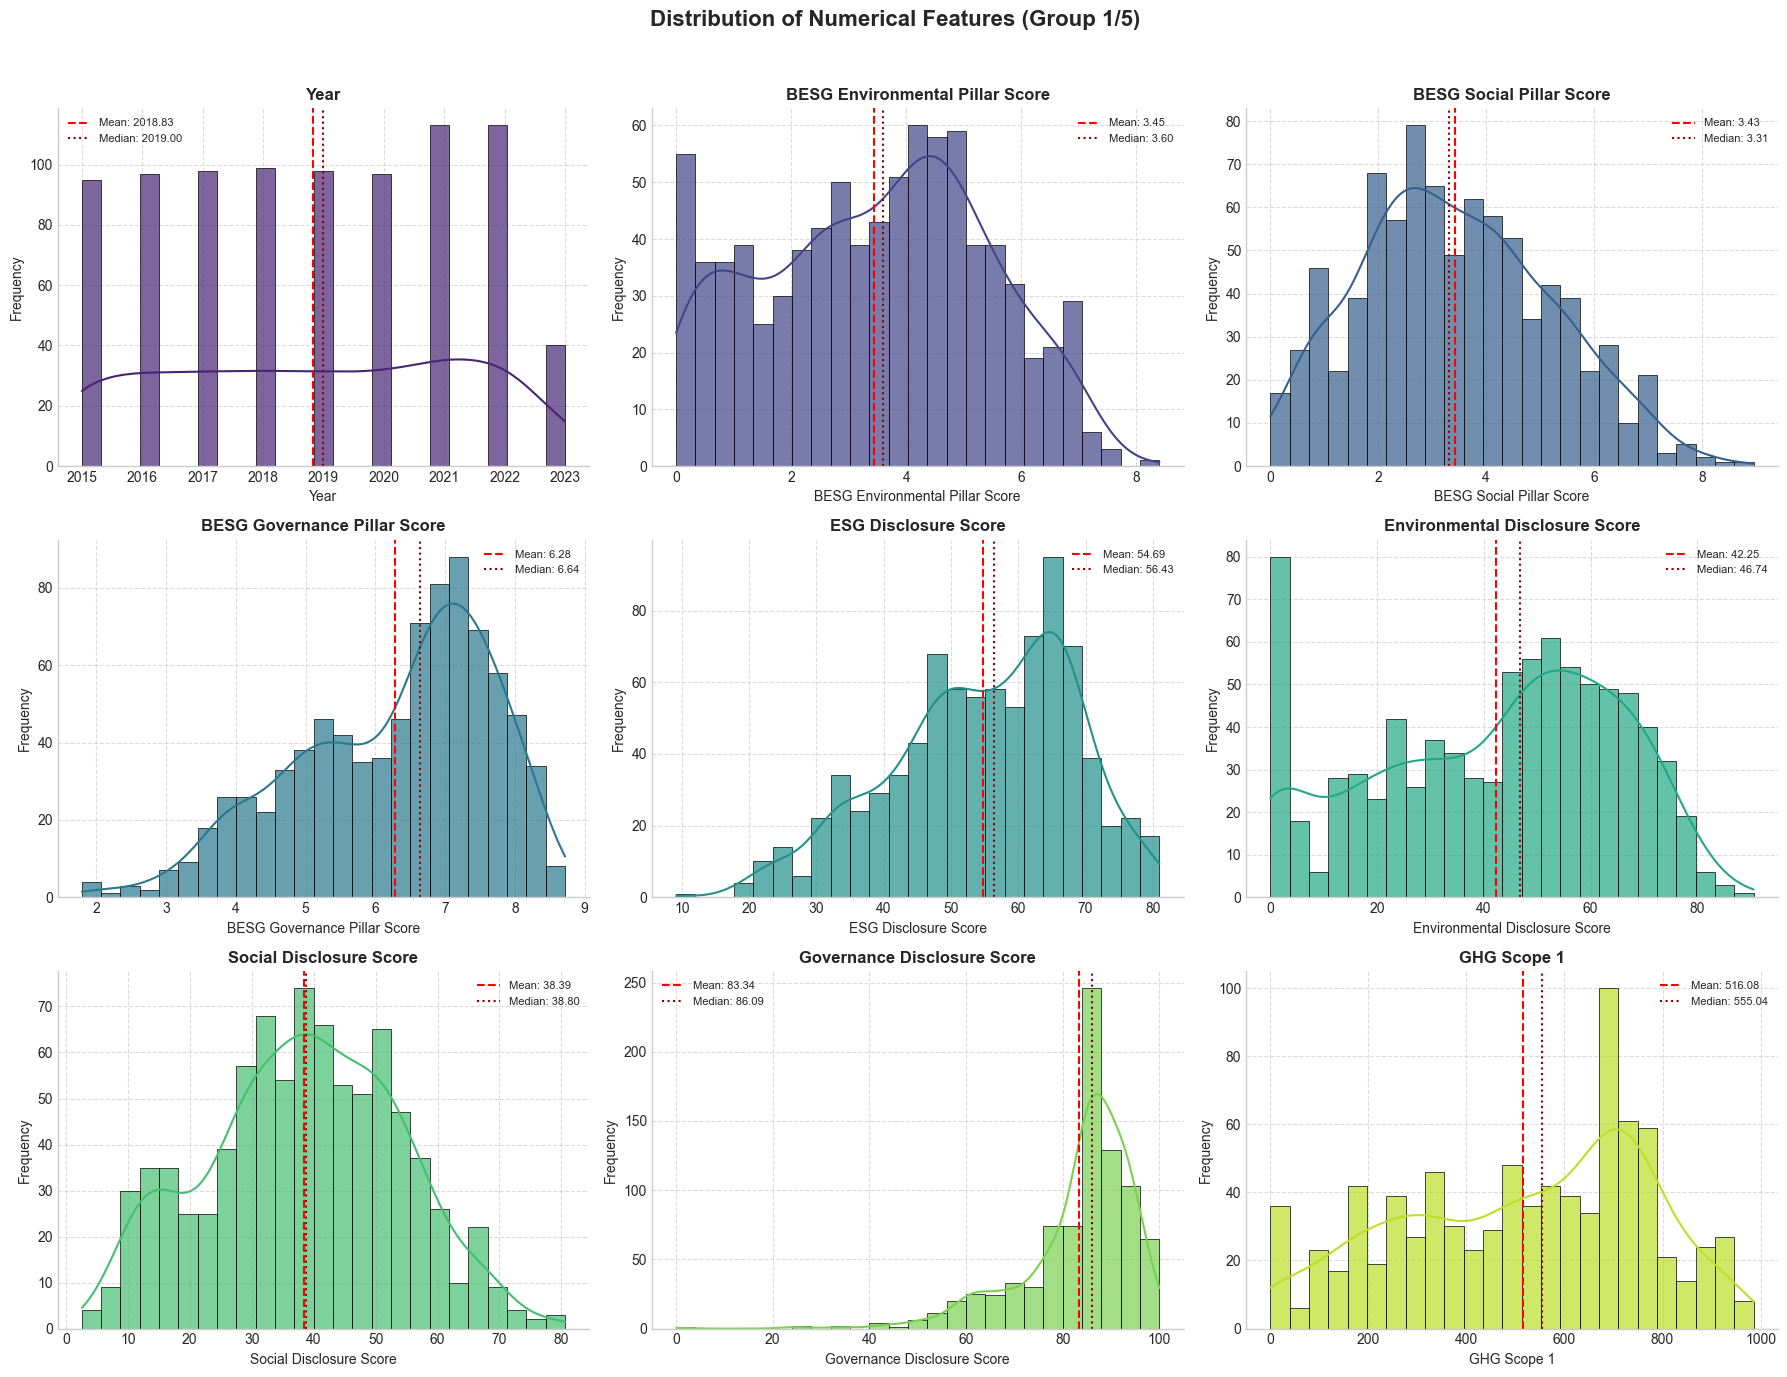

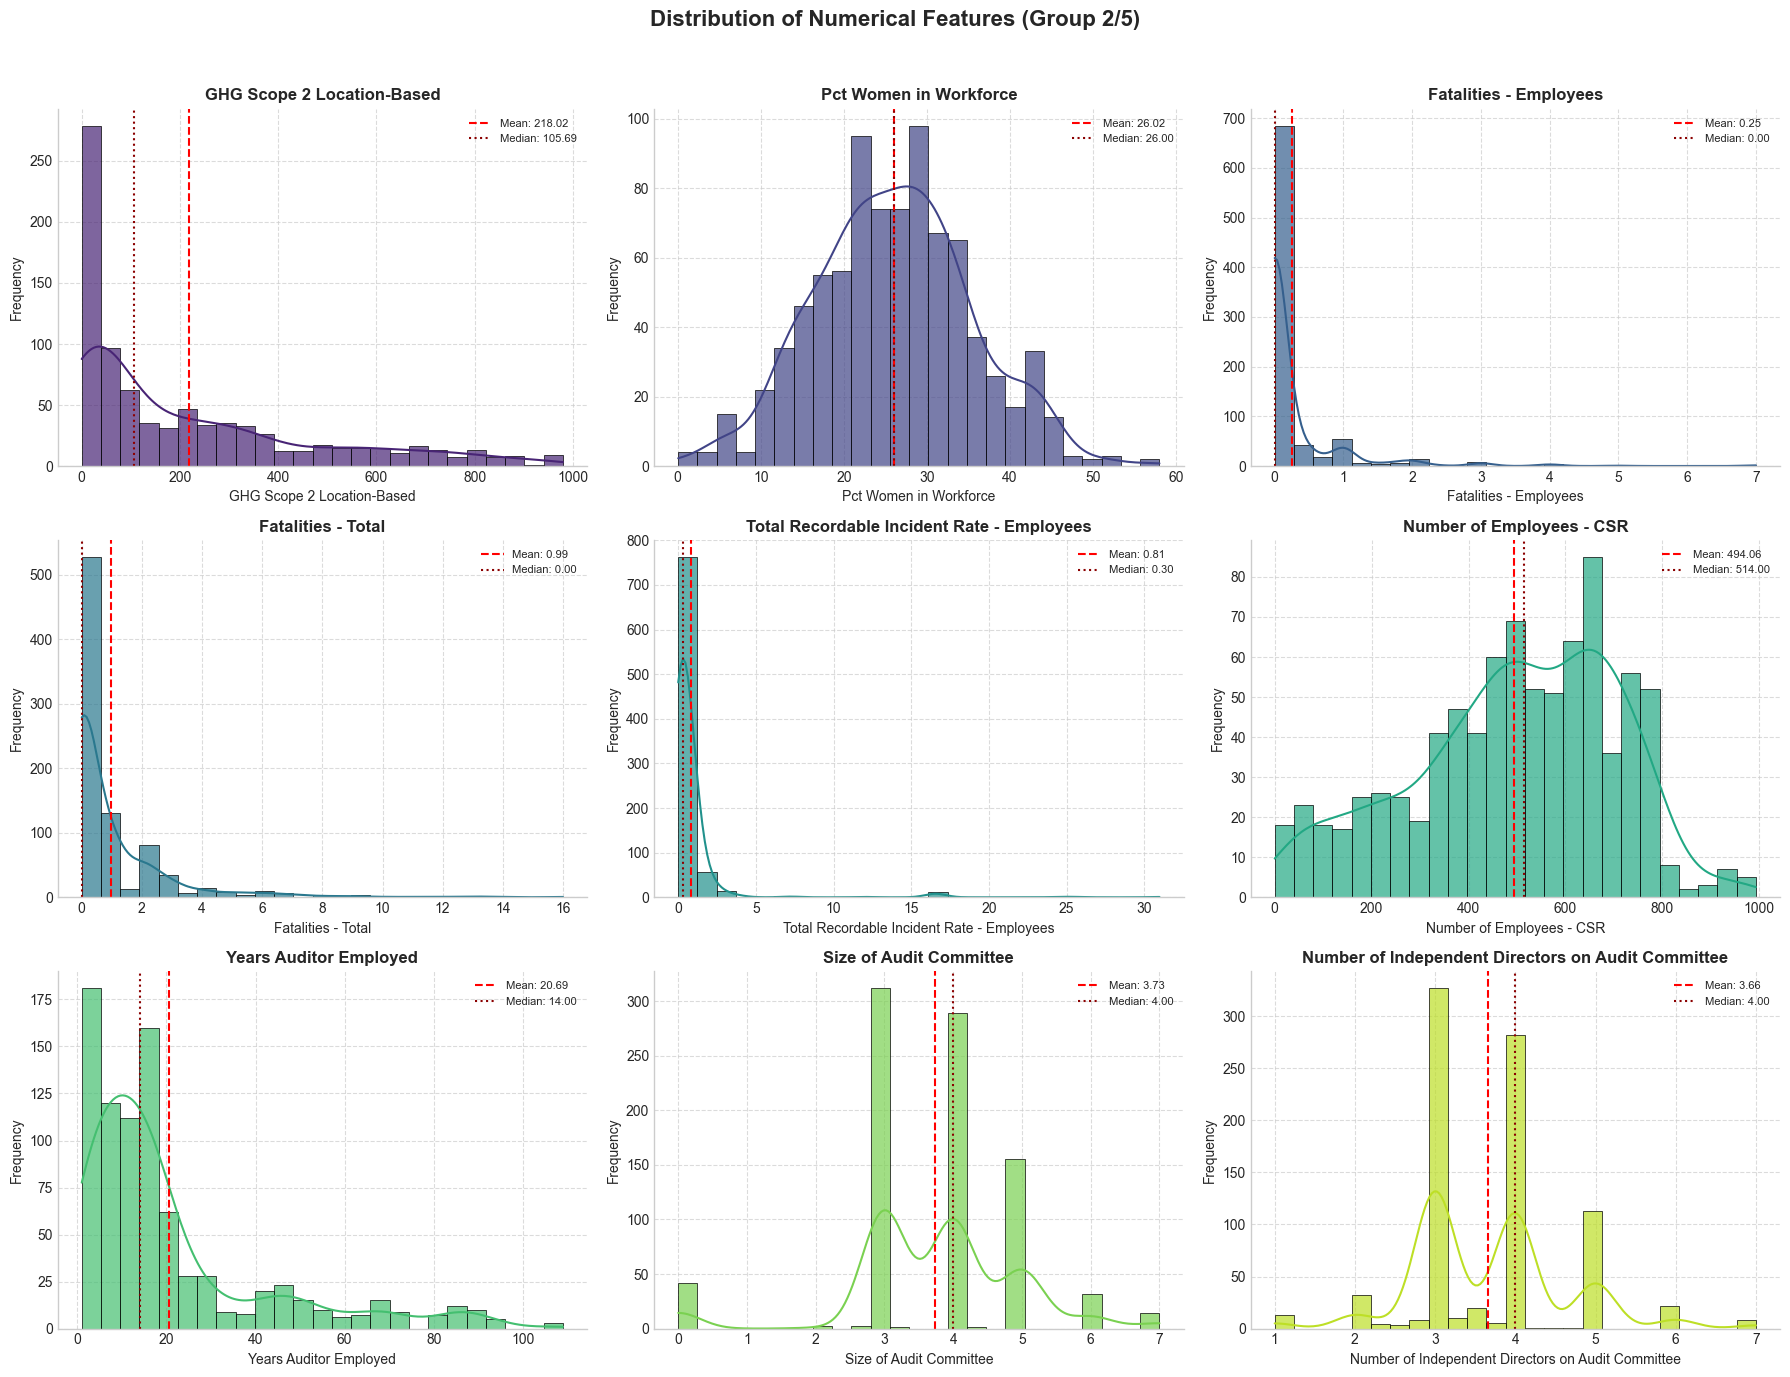

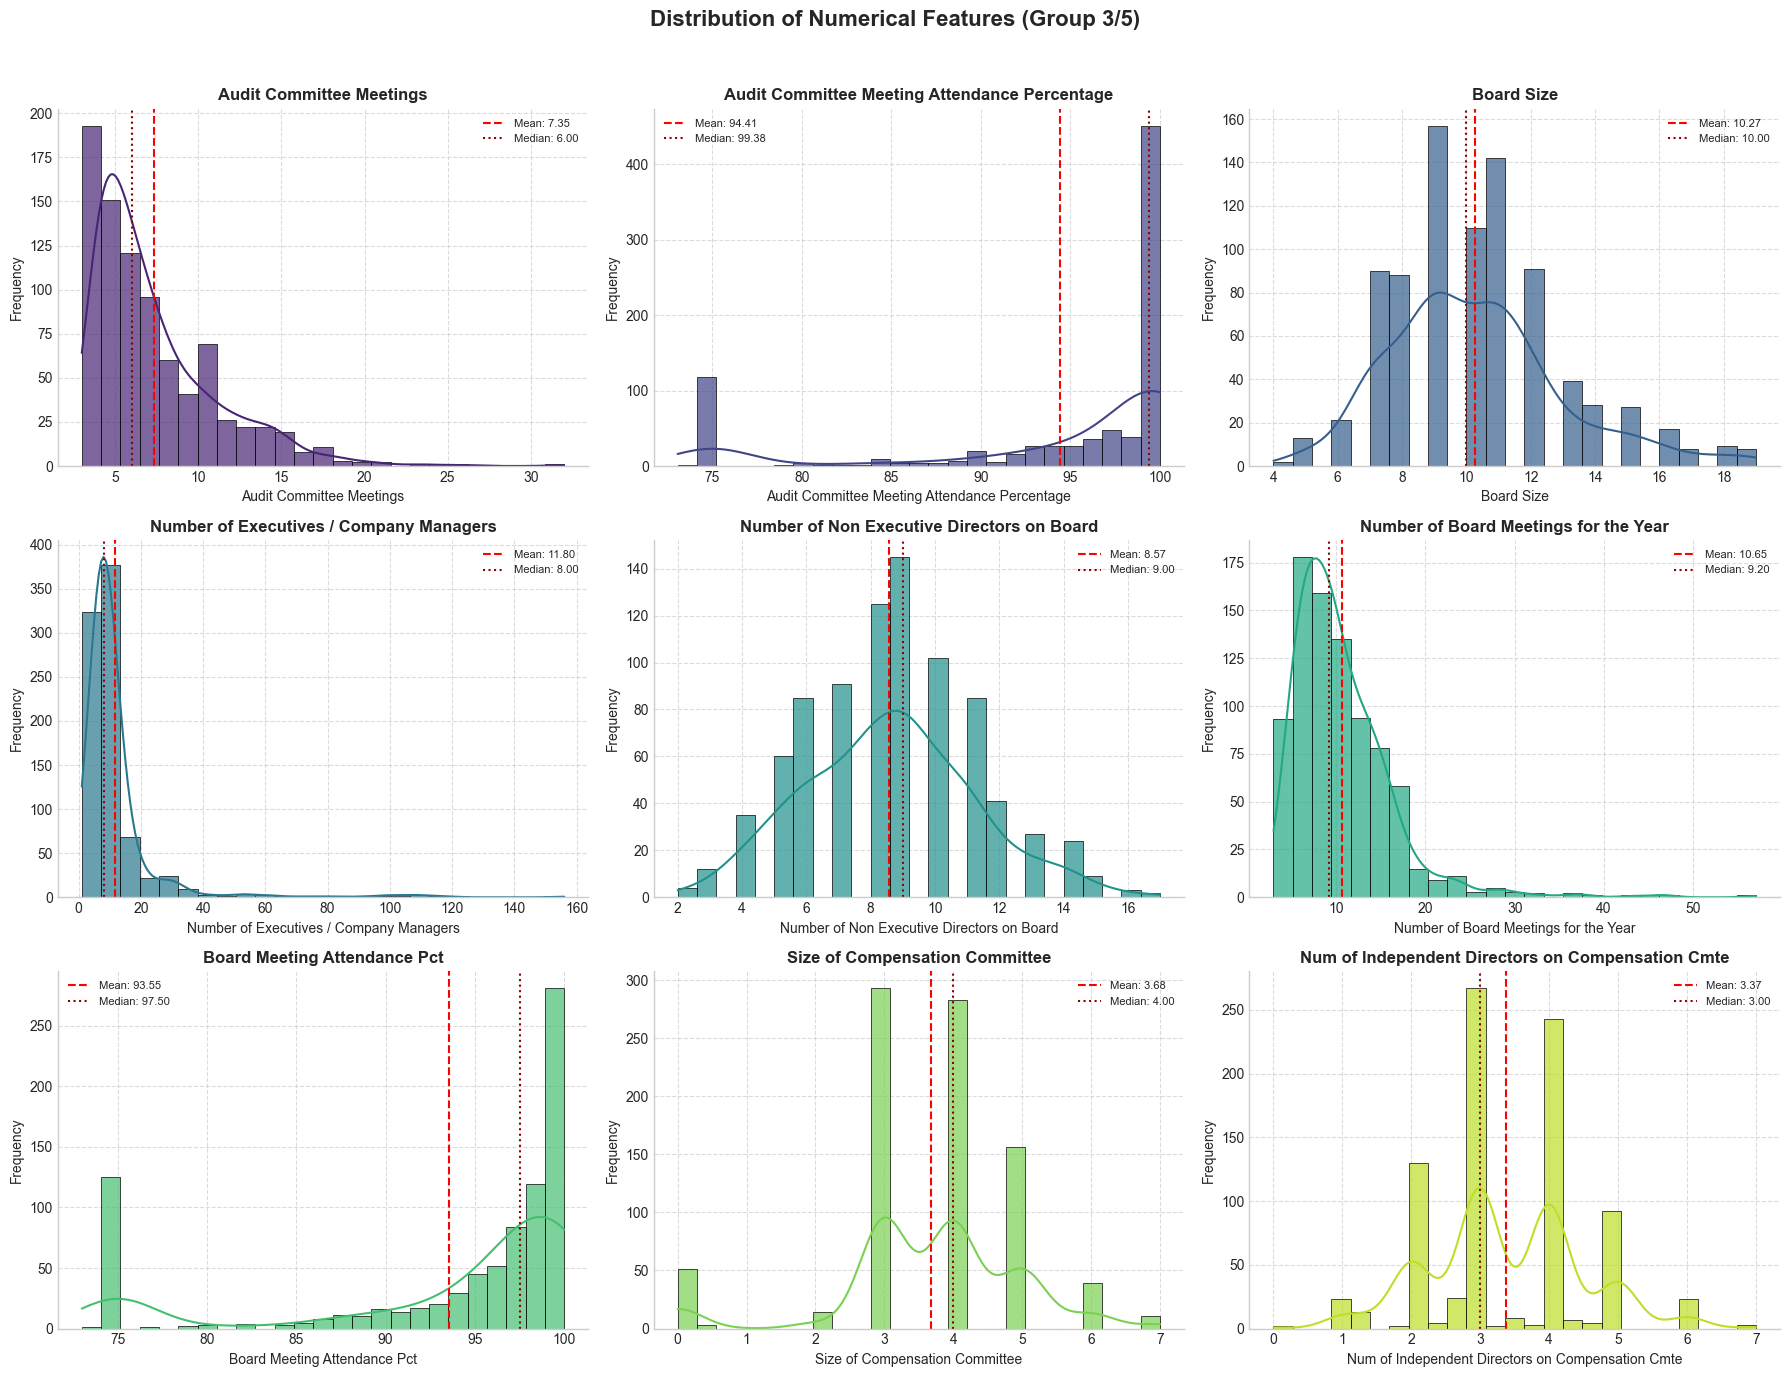

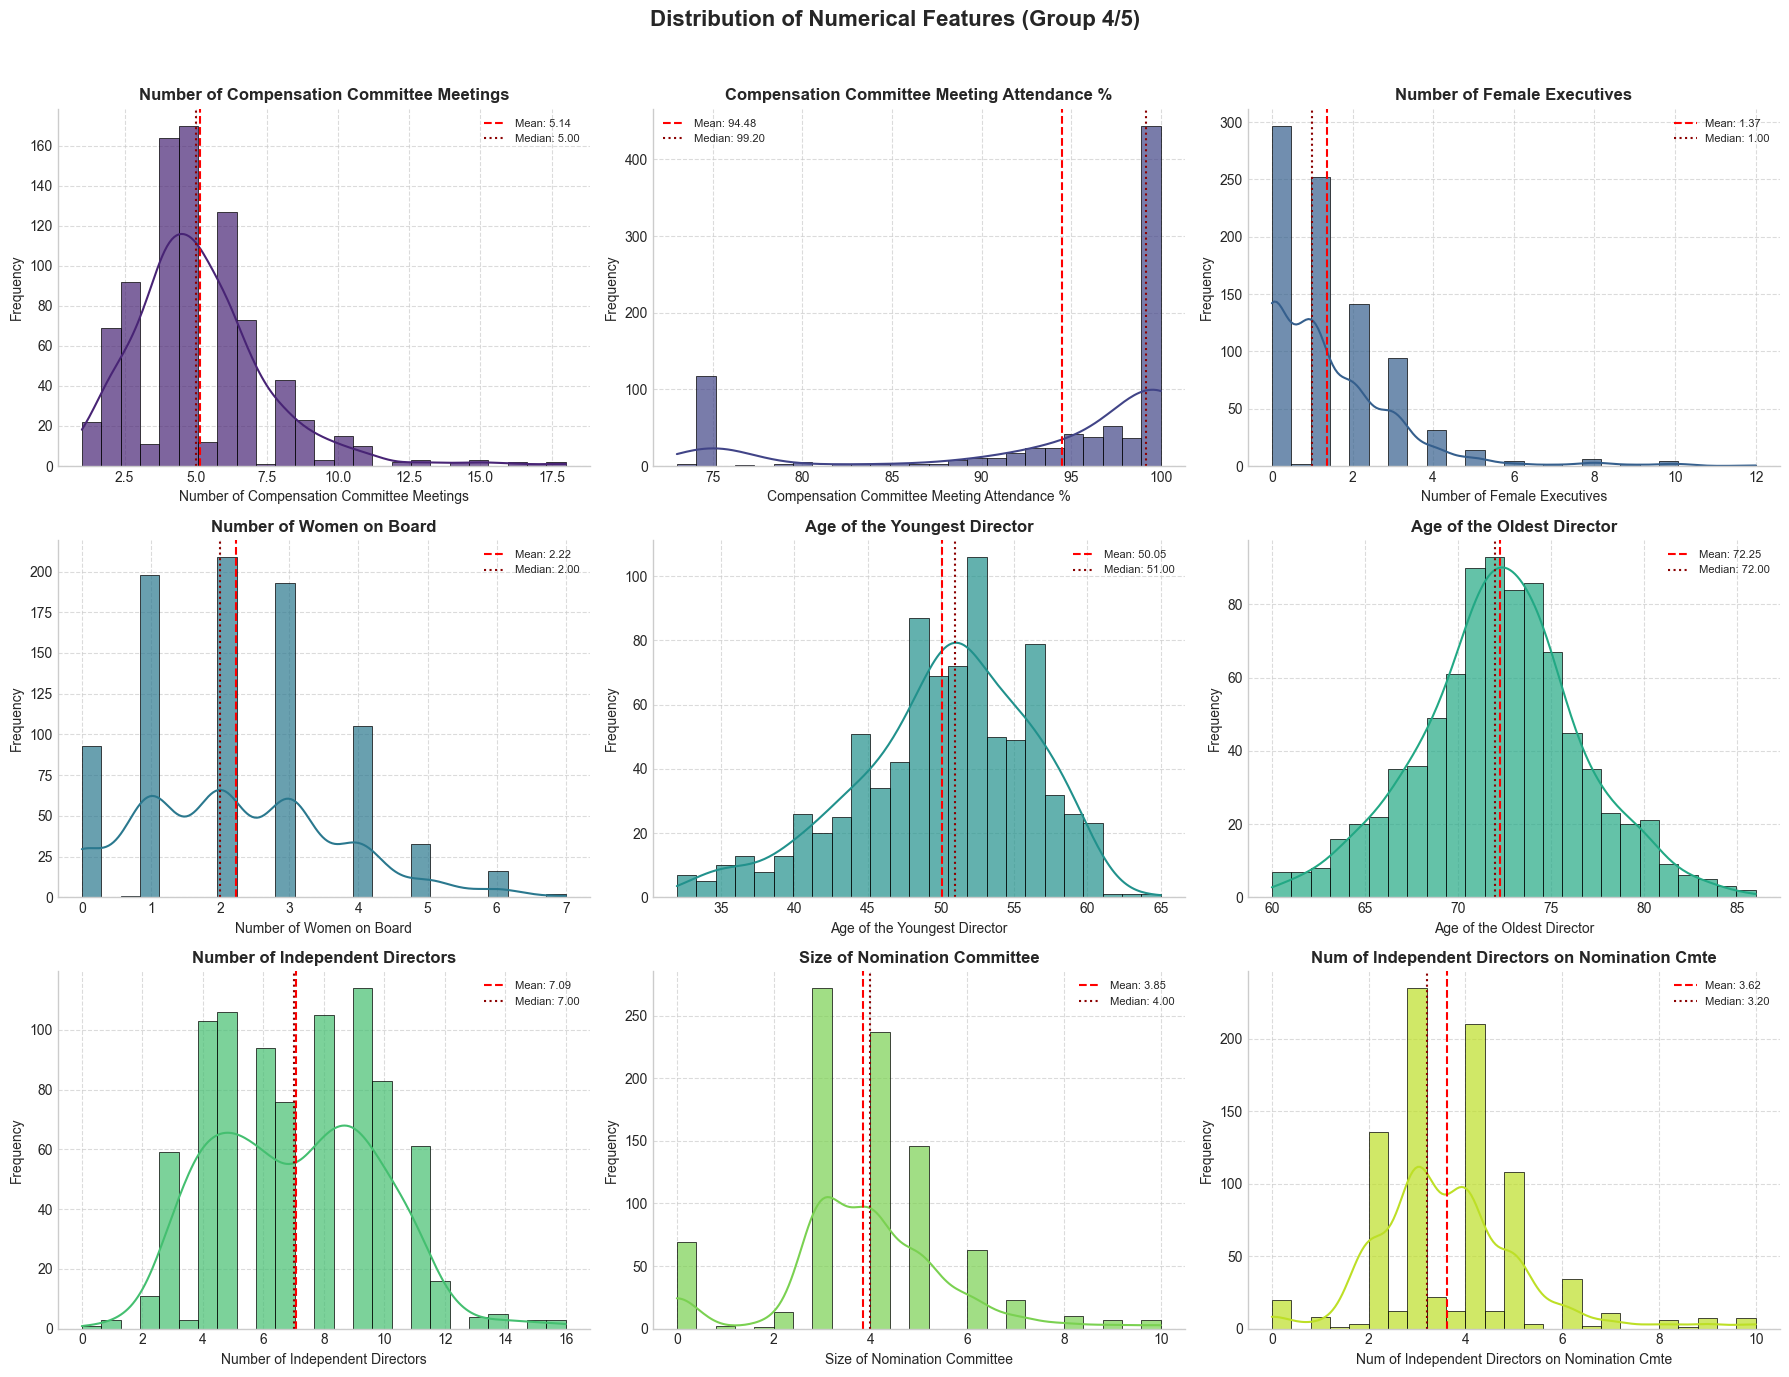

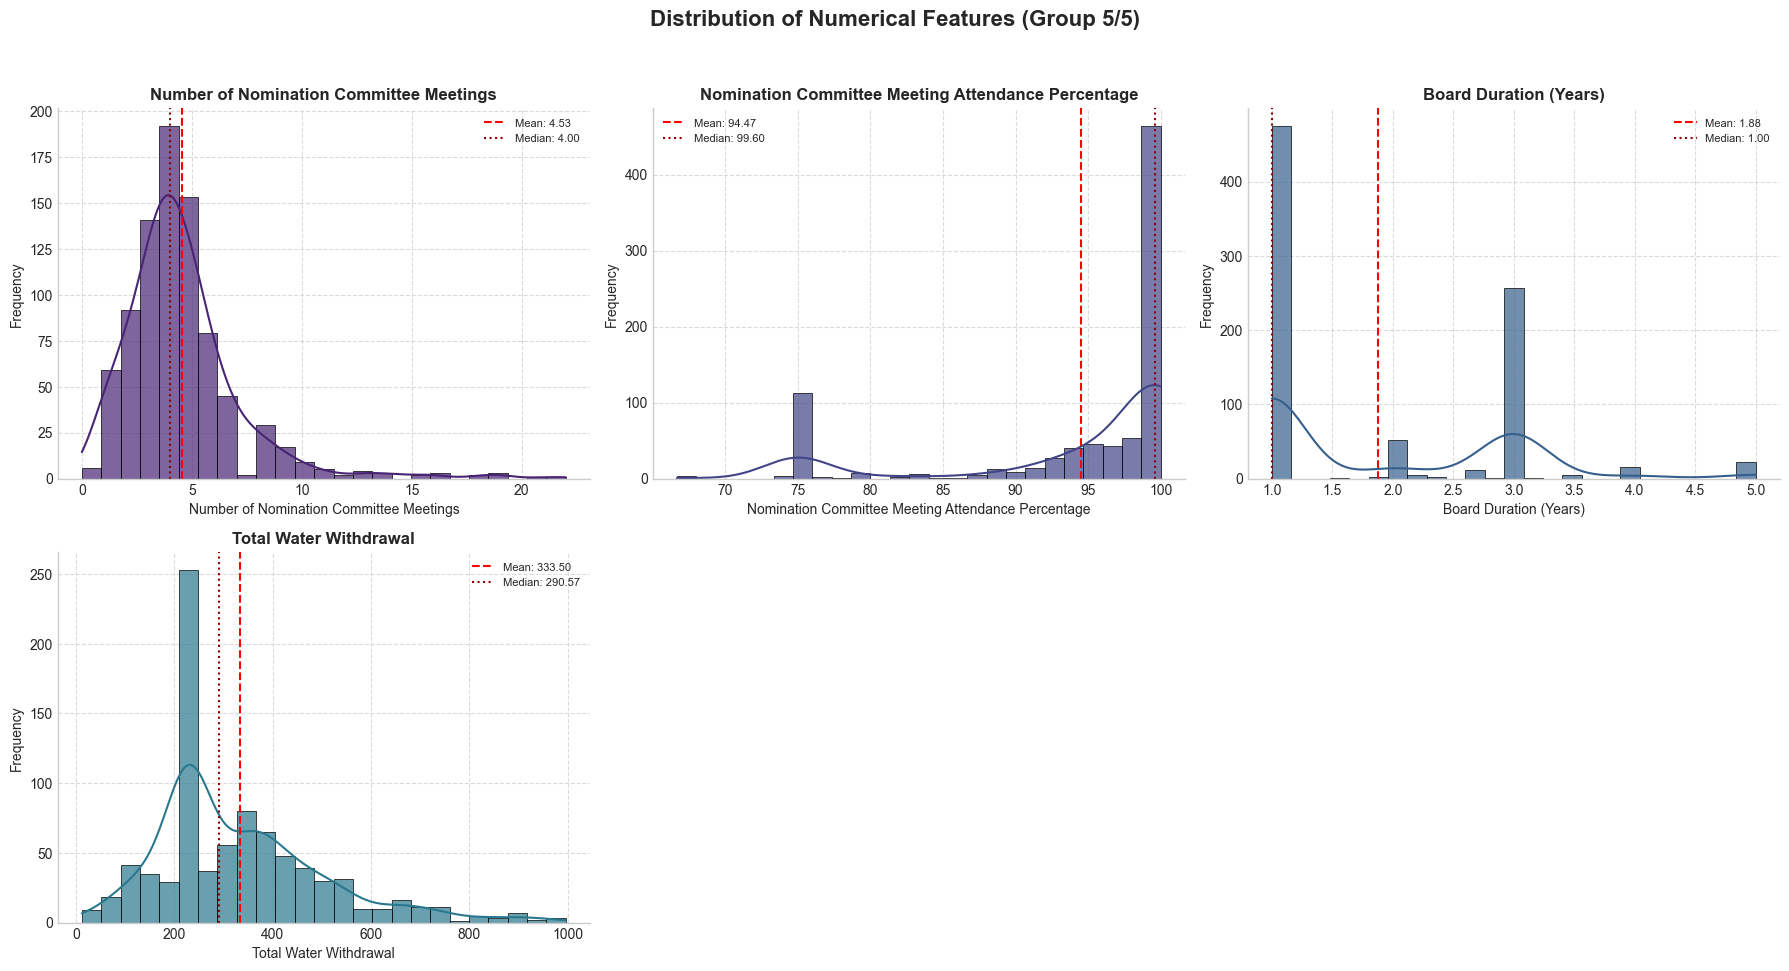

In [22]:
# Get numerical features from cleaned dataframe
numerical_features = df_clean.select_dtypes(include=['float', 'int']).columns.tolist()
if 'BESG ESG Score' in numerical_features:
    numerical_features.remove('BESG ESG Score')  # Remove target variable from the list

# Split features into groups to avoid overcrowding
features_per_figure = 9
num_figures = (len(numerical_features) + features_per_figure - 1) // features_per_figure

# Custom color palette for better visualization
colors = sns.color_palette('viridis', n_colors=features_per_figure)

# Loop through groups of features
for fig_num in range(num_figures):
    start_idx = fig_num * features_per_figure
    end_idx = min(start_idx + features_per_figure, len(numerical_features))
    features_group = numerical_features[start_idx:end_idx]

    # Create a figure with a reasonable size
    fig, axes = plt.subplots(3, 3, figsize=(18, 14))
    fig.suptitle(f'Distribution of Numerical Features (Group {fig_num+1}/{num_figures})',
                 fontsize=16, fontweight='bold', y=0.98)

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    # Plot histograms for each feature in the group
    for i, feature in enumerate(features_group):
        ax = axes[i]

        # Get data and basic statistics
        data = df_clean[feature].dropna()
        mean_val = data.mean()
        median_val = data.median()

        # Plot the histogram with KDE
        sns.histplot(data, bins=25, kde=True, ax=ax, color=colors[i],
                    alpha=0.7, edgecolor='black', linewidth=0.5)

        # Add vertical lines for mean and median
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='darkred', linestyle=':', linewidth=1.5, label=f'Median: {median_val:.2f}')

        # Add title and labels
        ax.set_title(feature, fontsize=12, fontweight='bold')
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)

        # Add a legend
        ax.legend(fontsize=8, loc='best')

        # Add grid for better readability
        ax.grid(True, linestyle='--', alpha=0.7)

        # Remove top and right spines for cleaner look
        sns.despine(ax=ax)

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [23]:
binary_features = [col for col in df.columns.tolist() if df[col].nunique() == 2]

numerical_features = df_clean.select_dtypes(include=['float']).columns.tolist()

# Categorical features (excluding binary and numerical)
categorical_features = [col for col in df.columns.tolist()
                       if col not in binary_features
                       and col not in numerical_features
                       and col not in ['Company', 'Ticker', 'Year']
                       and 1 < df[col].nunique() < 5]

# Combine binary and categorical features
features_to_plot = binary_features + categorical_features

print(f"Total features to plot: {len(features_to_plot)}")

print(features_to_plot)

Total features to plot: 20
['Risks of Climate Change Discussed', 'Policy Against Child Labor', 'Human Rights Policy', 'Equal Opportunity Policy', 'Business Ethics Policy', 'Anti-Bribery Ethics Policy', 'Health and Safety Policy', 'Training Policy', 'Social Supply Chain Management', 'Emissions Reduction Initiatives', 'Climate Change Policy', 'Climate Change Opportunities Discussed', 'Energy Efficiency Policy', 'Waste Reduction Policy', 'Environmental Supply Chain Management', 'Water Policy', 'Biodiversity Policy', 'Fair Remuneration Policy', 'Verification Type', 'Employee CSR Training']


<Figure size 1800x1200 with 0 Axes>

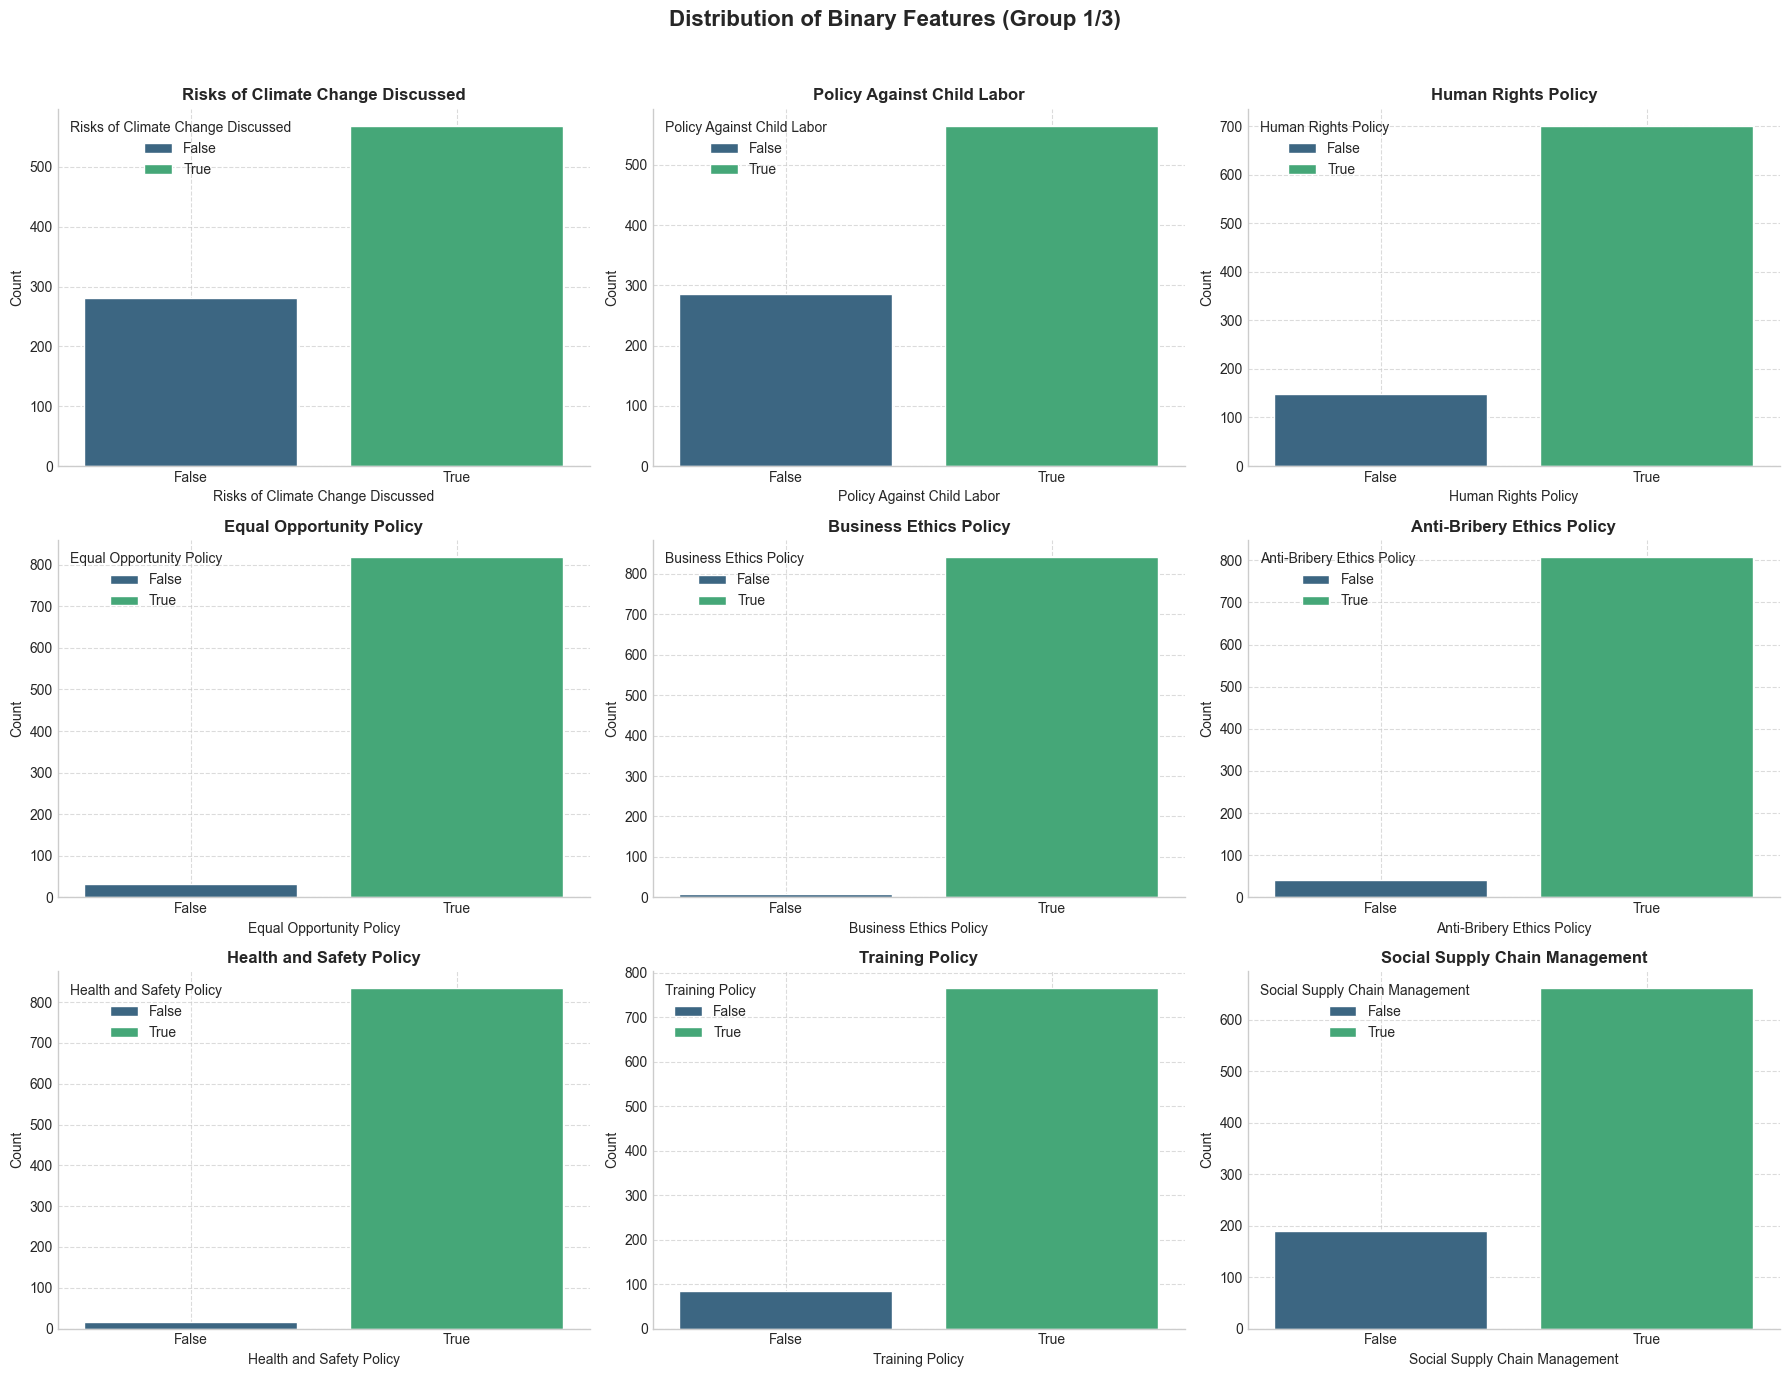

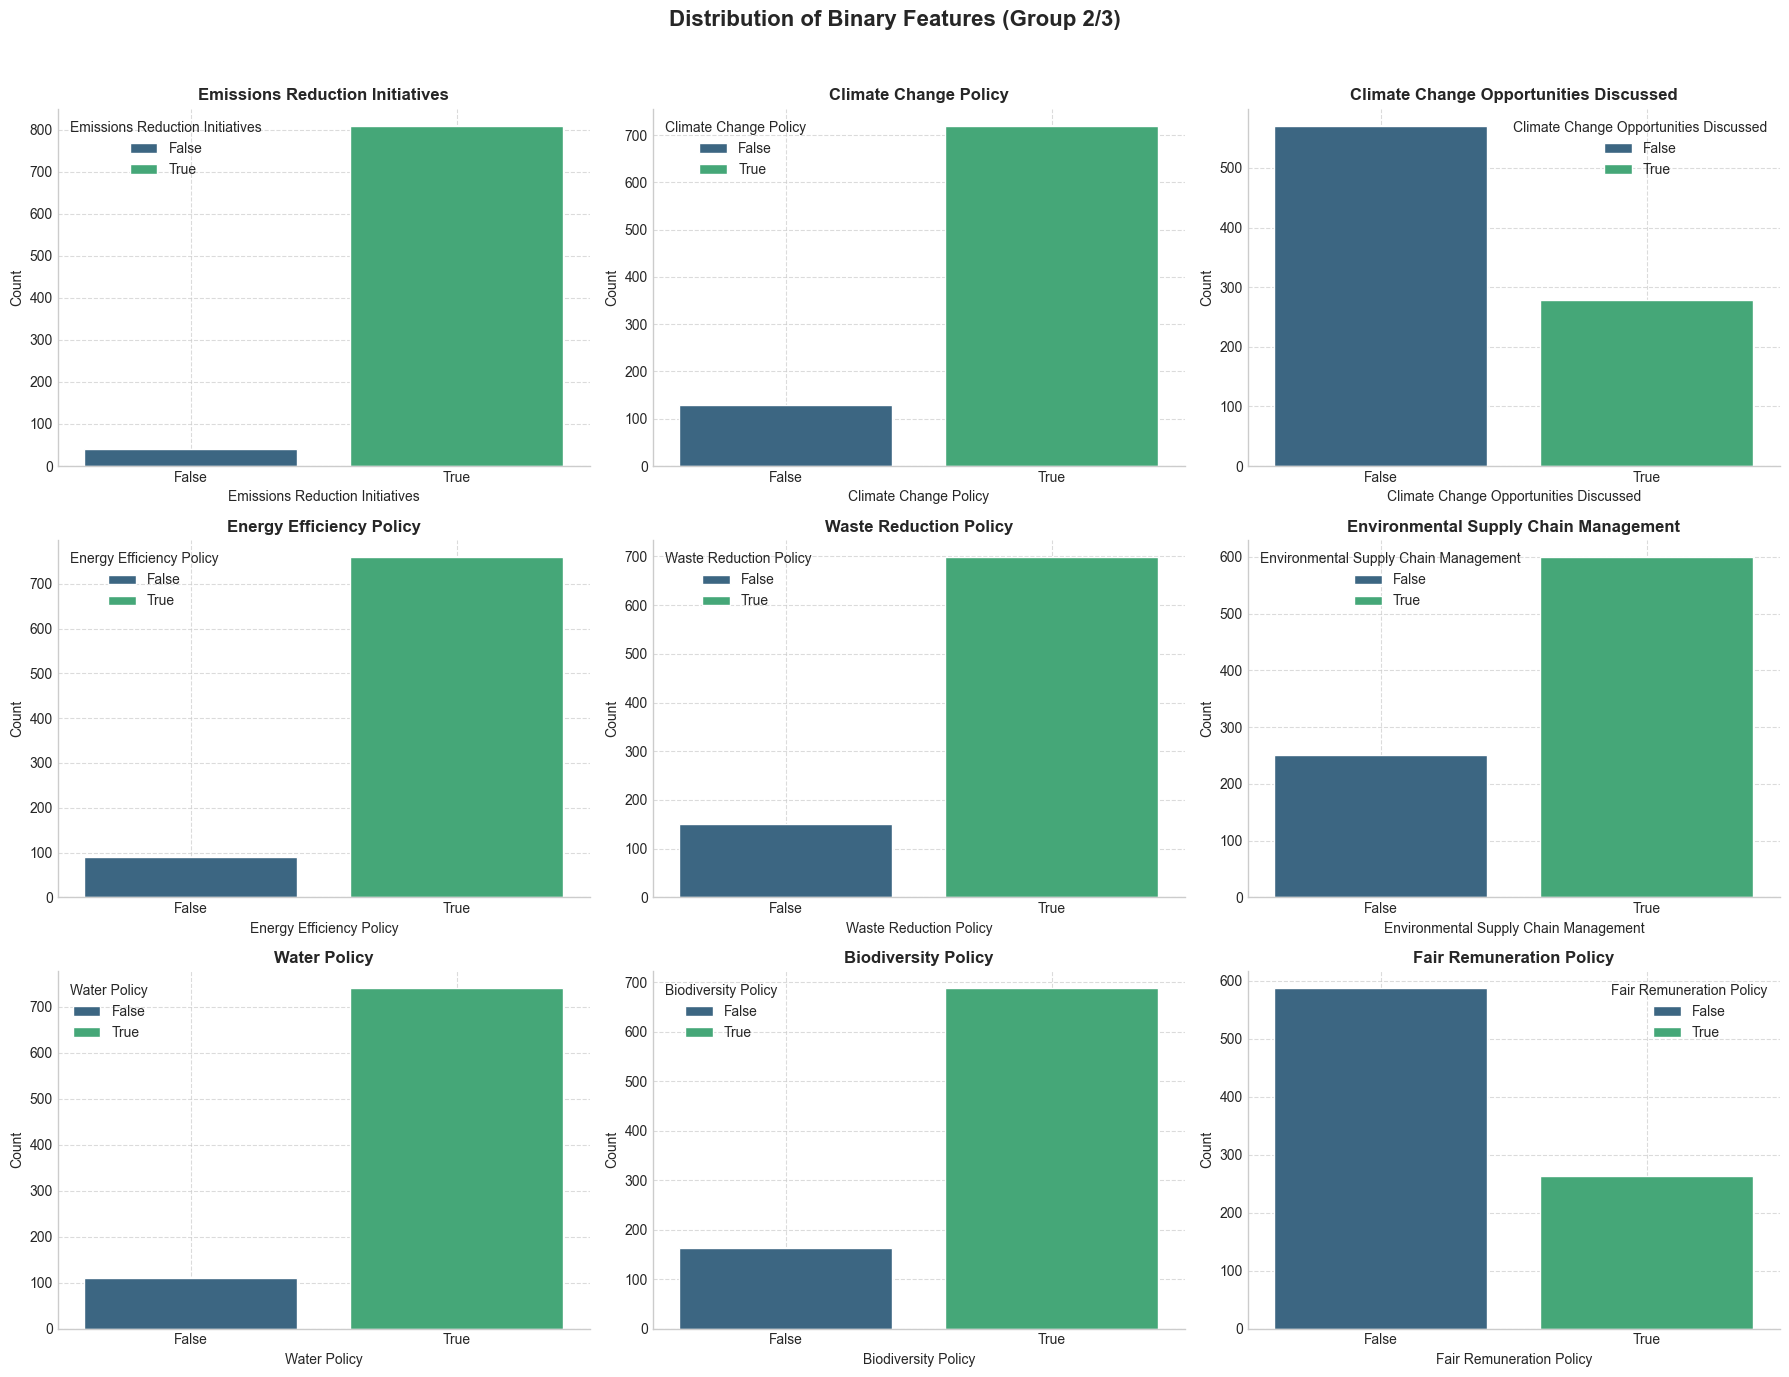

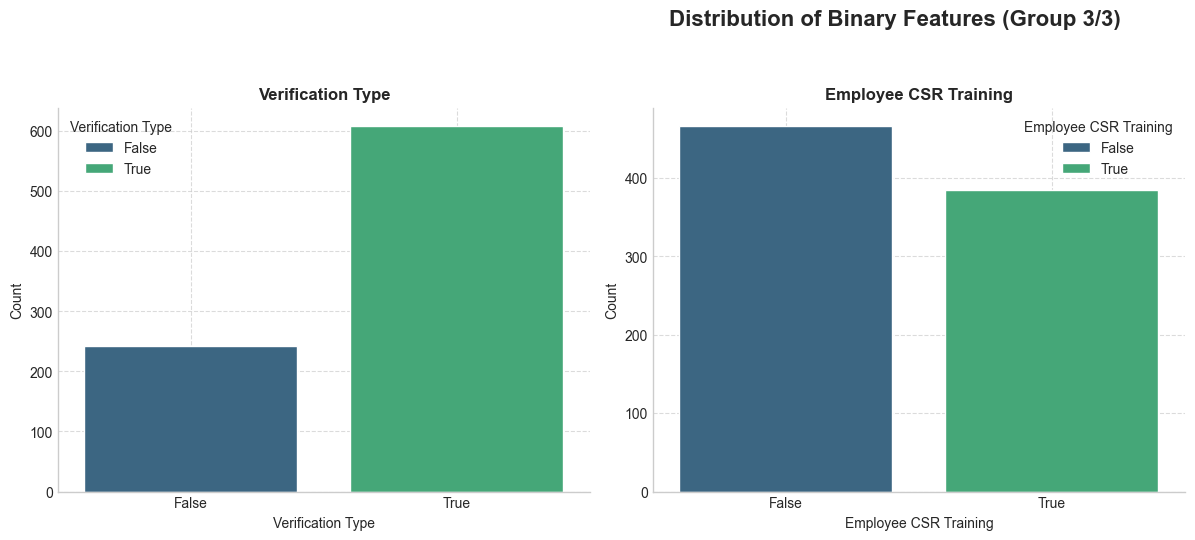

In [24]:
# Create a figure with a reasonable size
plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of Binary Features', fontsize=20, y=0.98, fontweight='bold')
# Custom color palette for better visualization
binary_colors = sns.color_palette('viridis', 2)
categorical_colors = sns.color_palette('viridis', len(df[categorical_features].nunique()))
# Loop through binary features

# Split features into groups to avoid overcrowding
features_per_figure = 9
num_figures = len(features_to_plot) // features_per_figure + (len(features_to_plot) % features_per_figure > 0)

# Plot count plots for each feature
for fig_num in range(num_figures):
    start_idx = fig_num * features_per_figure
    end_idx = min(start_idx + features_per_figure, len(features_to_plot))
    features_group = features_to_plot[start_idx:end_idx]

    # Create a figure with a reasonable size
    fig, axes = plt.subplots(3, 3, figsize=(18, 14))
    fig.suptitle(f'Distribution of Binary Features (Group {fig_num+1}/{num_figures})',
                 fontsize=16, fontweight='bold', y=0.98)

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    # Plot count plots for each feature in the group
    for i, feature in enumerate(features_group):
        ax = axes[i]

        # Get data and basic statistics
        data = df[feature].dropna()

        # Plot the count plot
        sns.countplot(x=feature, data=df, palette=binary_colors if feature in binary_features else categorical_colors, hue=feature,
                      ax=ax)

        # Add title and labels
        ax.set_title(feature, fontsize=12, fontweight='bold')
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)

        # Add grid for better readability
        ax.grid(True, linestyle='--', alpha=0.7)

        # Remove top and right spines for cleaner look
        sns.despine(ax=ax)

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

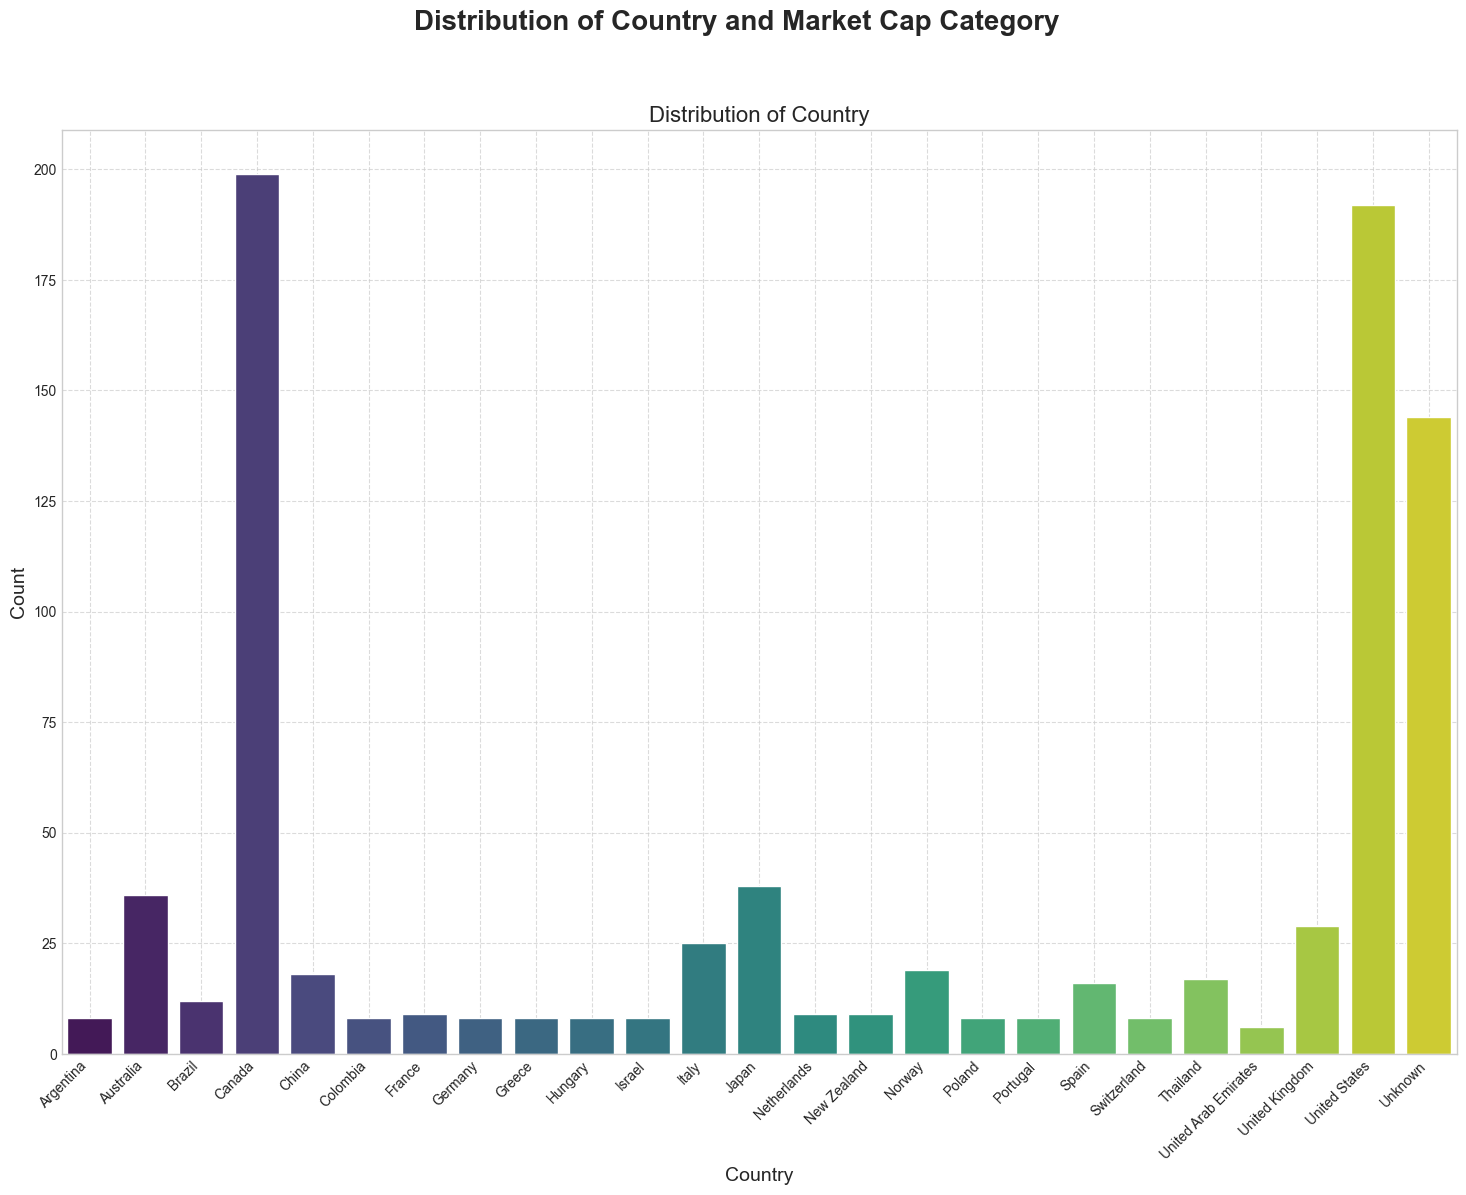

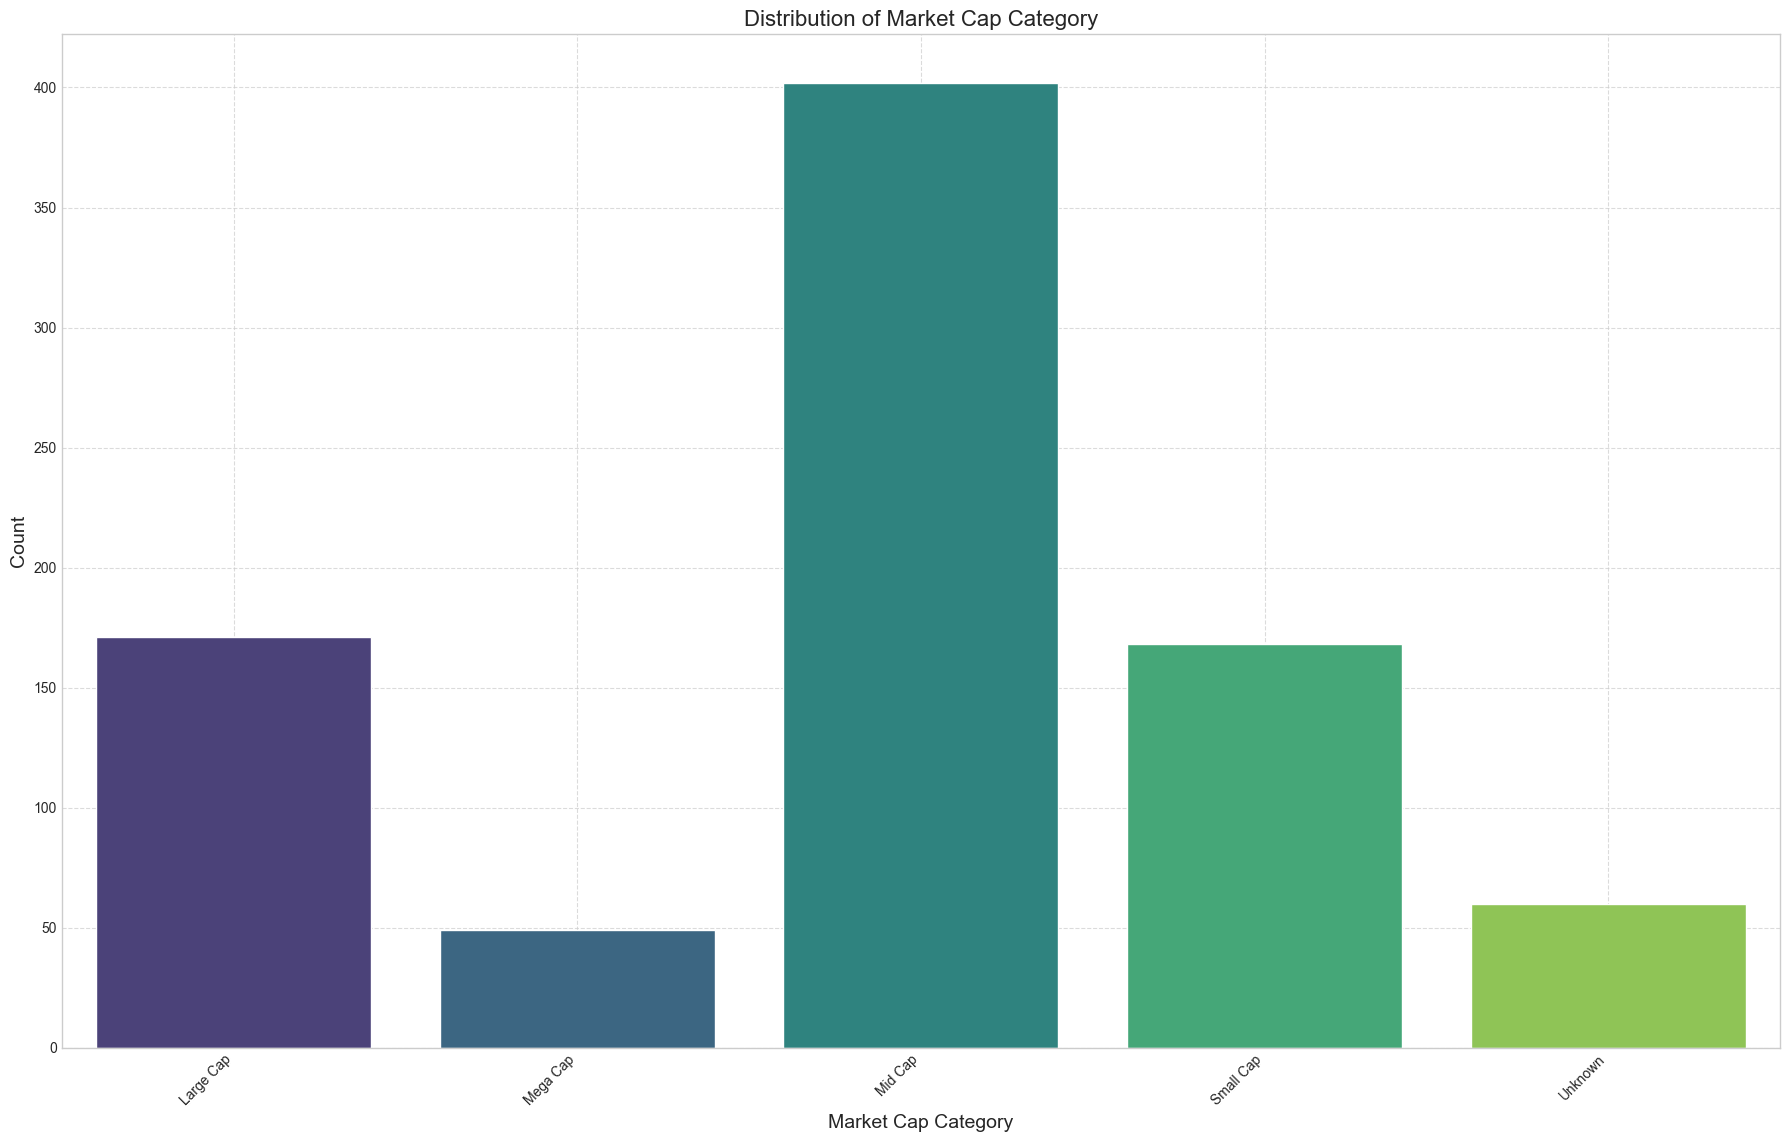

In [ ]:
# Plot Country and Market Cap Category
plt.figure(figsize=(18, 12))
sns.countplot(x='Country', data=df, palette='viridis', hue='Country')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Country', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(18, 12))
# Stacked plot for Market Cap Category
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Market Cap Category', fontsize=16, weight='bold')
plt.xlabel('Market Cap Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 4. Linear Regression with Stepwise Elimination
We'll build our models with a two-layer structure:

- Layer 1: Predict Disclosure and Pillar Scores
- Layer 2: Use predicted values to predict the main BESG ESG Score

In [26]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """
    Perform stepwise feature selection

    Parameters:
    -----------
    X : pandas.DataFrame
        Feature dataframe
    y : pandas.Series
        Target variable
    initial_list : list
        List of features to start with
    threshold_in : float
        Threshold p-value for including features
    threshold_out : float
        Threshold p-value for excluding features
    verbose : bool
        Print steps

    Returns:
    --------
    selected_features : list
        List of selected features
    """
    included = list(initial_list)

    while True:
        changed = False

        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)

        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]

        best_pval = new_pval.min()

        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature:20} with p-value {best_pval:.6f}')

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()

        # Use all p-values except for the intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()

        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f'Drop {worst_feature:20} with p-value {worst_pval:.6f}')

        if not changed:
            break

    return included

### 4.2 Layer 1: Modeling Pillar and Disclosure Scores

In [27]:
# Select numeric columns and handle missing values
numeric_df = df_encoded.select_dtypes(include=[np.number])

# Function to prepare data for modeling
def prepare_data_for_modeling(df, target, threshold=0.3):
    """
    Prepare data for modeling by:
    1. Dropping rows where target is null
    2. Selecting features with sufficient non-null values
    3. Filling missing values with medians

    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    target : str
        Target column name
    threshold : float
        Minimum completeness threshold for features

    Returns:
    --------
    X : pandas.DataFrame
        Feature dataframe
    y : pandas.Series
        Target series
    """
    # Drop rows where target is null
    df_model = df.dropna(subset=[target])

    # Select features with sufficient non-null values
    feature_completeness = df_model.count() / len(df_model)
    valid_features = feature_completeness[feature_completeness >= threshold].index.tolist()
    valid_features = [f for f in valid_features if f != target and f in numeric_df.columns]

    # Prepare X and y
    X = df_model[valid_features].copy()
    y = df_model[target].copy()

    # Fill missing values with medians
    X = X.fillna(X.median())

    return X, y, valid_features

In [28]:
# Unified modeling function to predict any target score
def model_score_prediction(df, target_score, threshold=0.3):
    """
    Model to predict any target score (pillar or disclosure) using OLS regression

    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe with all data
    target_score : str
        Name of the target score to predict
    threshold : float
        Minimum completeness threshold for features

    Returns:
    --------
    model : statsmodels.regression.linear_model.OLS
        Fitted OLS model
    selected_features : list
        Features selected by stepwise regression
    r2_score : float
        R-squared score of the model
    """
    print(f"\nModeling {target_score}:")

    # Define columns to exclude (all scores except the target)
    scores_to_exclude = [
        'BESG ESG Score', 'BESG Environmental Pillar Score',
        'BESG Social Pillar Score', 'BESG Governance Pillar Score',
        'ESG Disclosure Score', 'Environmental Disclosure Score',
        'Social Disclosure Score', 'Governance Disclosure Score'
    ]

    # Non-numeric columns to exclude
    other_cols_to_exclude = ['Company', 'Ticker', 'Year']

    # All columns to exclude
    cols_to_exclude = scores_to_exclude + other_cols_to_exclude

    # Remove target score from exclusion list
    cols_to_exclude = [col for col in cols_to_exclude if col != target_score]

    # Exclude columns
    df_model = df.drop(columns=[col for col in cols_to_exclude if col in df.columns])

    # Prepare data
    X, y, valid_features = prepare_data_for_modeling(df_model, target_score, threshold)
    print(f"Number of potential features: {len(valid_features)}")

    # Feature selection
    selected_features = stepwise_selection(X[valid_features], y, verbose=False)

    # Build final model
    X_selected = X[selected_features]
    model = sm.OLS(y, sm.add_constant(X_selected)).fit()
    r2_score = model.rsquared
    mse = mean_squared_error(y, model.predict(sm.add_constant(X_selected)))
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y - model.predict(sm.add_constant(X_selected))))
    adjusted_r2 = model.rsquared_adj


    # Print results
    print(f"R² score: {r2_score:.4f}")
    print(f"Adjusted R² score: {adjusted_r2:.4f}")
    print(f"Selected features: {', '.join(selected_features)}")
    print("Model Summary:")
    print(model.summary().tables[1])

    return model, selected_features, r2_score, adjusted_r2, mse, rmse, mae

In [29]:
# Dictionary to store all models and results
all_models = {}
all_selected_features = {}
all_r2_scores = {}
all_adjusted_r2_scores = {}
all_mse_scores = {}
all_rmse_scores = {}
all_mae_scores = {}

# List of all target scores
pillar_scores = [
    'BESG Environmental Pillar Score',
    'BESG Social Pillar Score',
    'BESG Governance Pillar Score'
]

disclosure_scores = [
    'Environmental Disclosure Score',
    'Social Disclosure Score',
    'Governance Disclosure Score',
    'ESG Disclosure Score'
]

# Model all target scores (both disclosure and pillar) using the same approach
for score in pillar_scores + disclosure_scores:
    model, features, r2, adjusted_r2, mse, rmse, mae = model_score_prediction(df_encoded, score)
    all_models[score] = model
    all_selected_features[score] = features
    all_r2_scores[score] = r2
    all_adjusted_r2_scores[score] = adjusted_r2
    all_mse_scores[score] = mse
    all_rmse_scores[score] = rmse
    all_mae_scores[score] = mae

# Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    'Target Variable': all_models.keys(),
    'R² Score': all_r2_scores.values(),
    'Adjusted R² Score': all_adjusted_r2_scores.values(),
    'MSE': all_mse_scores.values(),
    'RMSE': all_rmse_scores.values(),
    'MAE': all_mae_scores.values()
})


Modeling BESG Environmental Pillar Score:
Number of potential features: 32
R² score: 0.4857
Adjusted R² score: 0.4771
Selected features: Number of Employees - CSR, GHG Scope 1, Number of Women on Board, Board Meeting Attendance Pct, Total Recordable Incident Rate - Employees, Number of Executives / Company Managers, Number of Nomination Committee Meetings, Number of Independent Directors, Fatalities - Employees, Number of Board Meetings for the Year, Number of Compensation Committee Meetings, Size of Audit Committee, Board Duration (Years), Num of Independent Directors on Compensation Cmte
Model Summary:
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -4.0554      0.662     -6.122      0.000      -5.356      -2.755
Number of Employees - CSR        

In [30]:
# Compare R² scores
print("\n=== Model Performance Summary ===")
print(results_df.sort_values(by='R² Score', ascending=False).to_string(index=False))

# Summary of features used in each model
print("\n=== Features Selected for Each Model ===")
for score, features in all_selected_features.items():
    print(f"{score}: {len(features)} features")
    print(f"  {', '.join(features)}")


=== Model Performance Summary ===
                Target Variable  R² Score  Adjusted R² Score        MSE      RMSE       MAE
   BESG Governance Pillar Score  0.714411           0.709623   0.565157  0.751769  0.587528
           ESG Disclosure Score  0.580396           0.573871  77.556336  8.806607  7.040635
 Environmental Disclosure Score  0.526605           0.519243 247.679526 15.737837 12.799185
    Governance Disclosure Score  0.522602           0.514016  65.454578  8.090400  6.166526
BESG Environmental Pillar Score  0.485708           0.477085   1.956184  1.398637  1.101131
        Social Disclosure Score  0.455106           0.446633 130.992891 11.445213  9.290647
       BESG Social Pillar Score  0.316399           0.306598   2.126560  1.458273  1.162506

=== Features Selected for Each Model ===
BESG Environmental Pillar Score: 14 features
  Number of Employees - CSR, GHG Scope 1, Number of Women on Board, Board Meeting Attendance Pct, Total Recordable Incident Rate - Employees, 

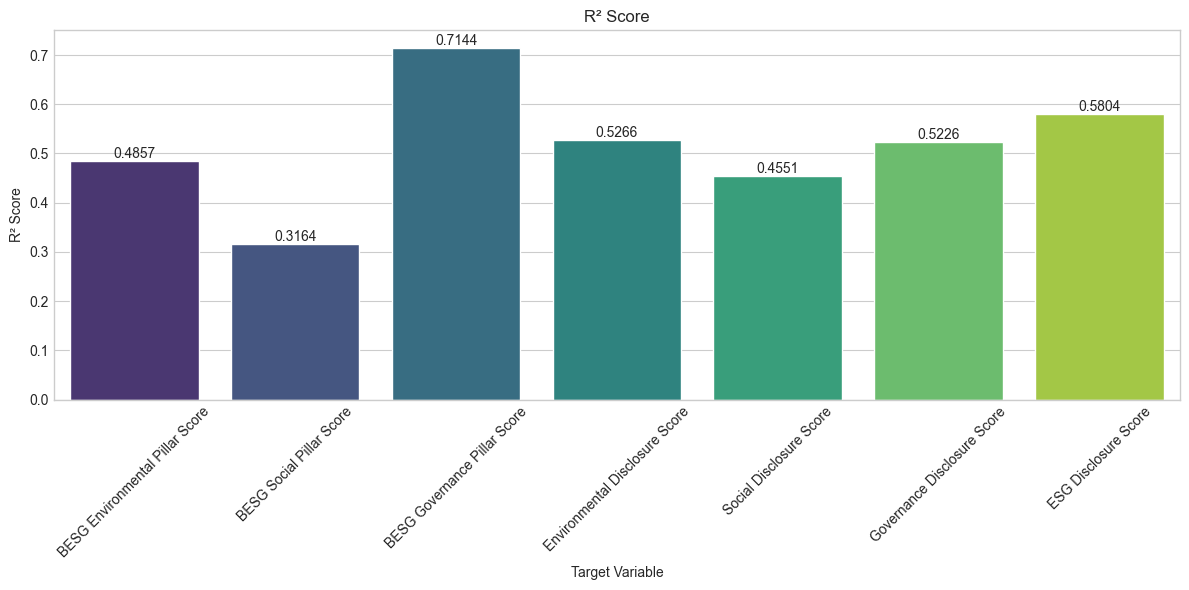

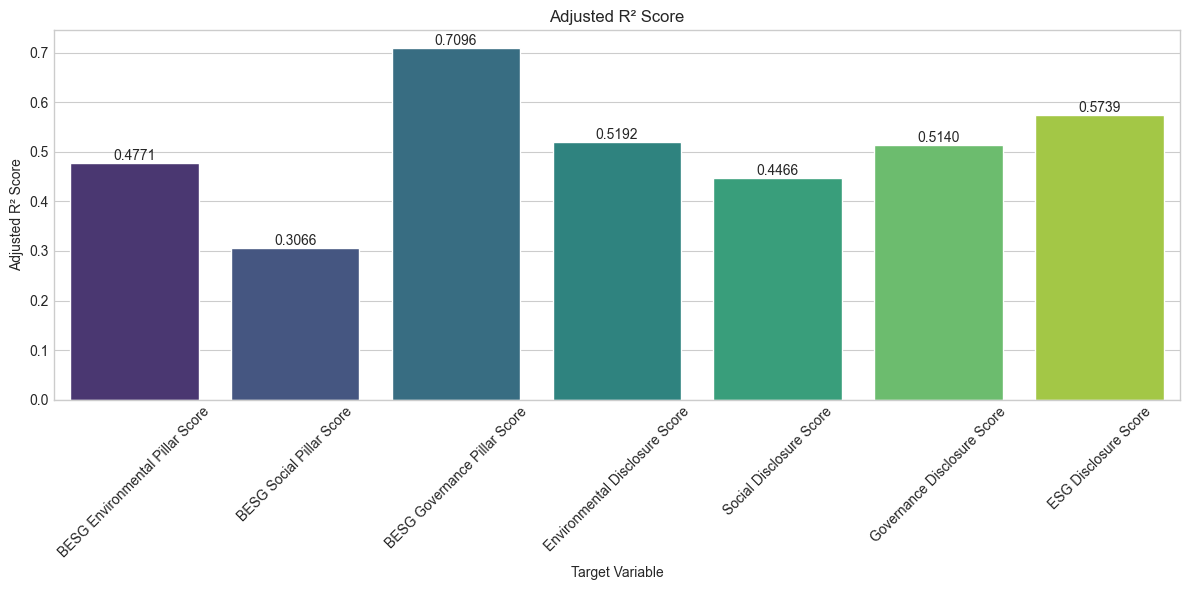

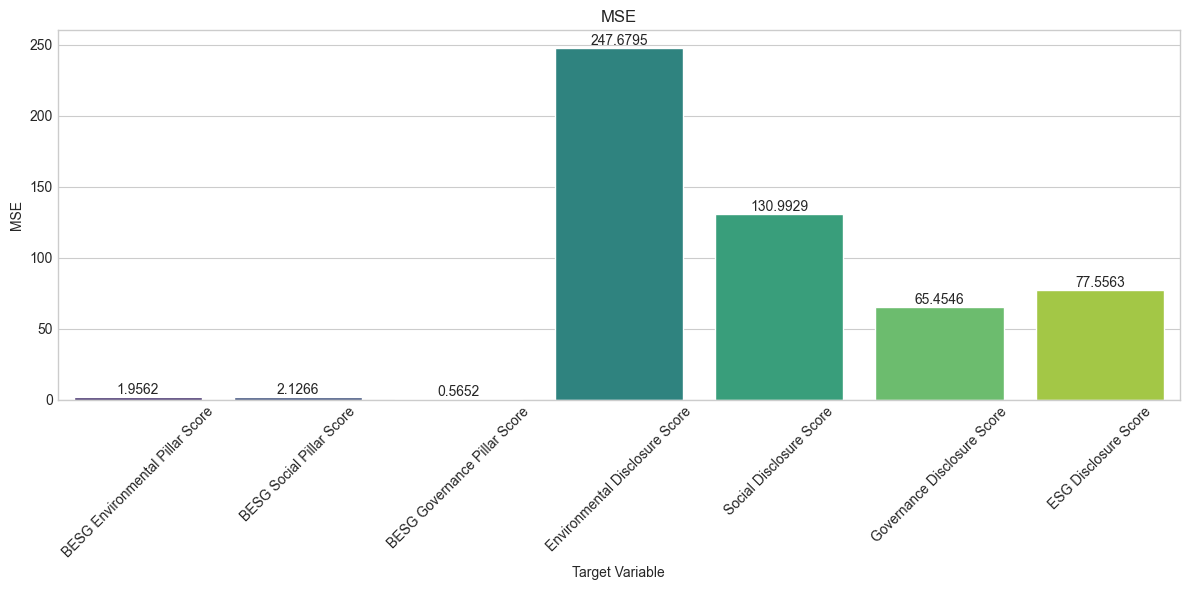

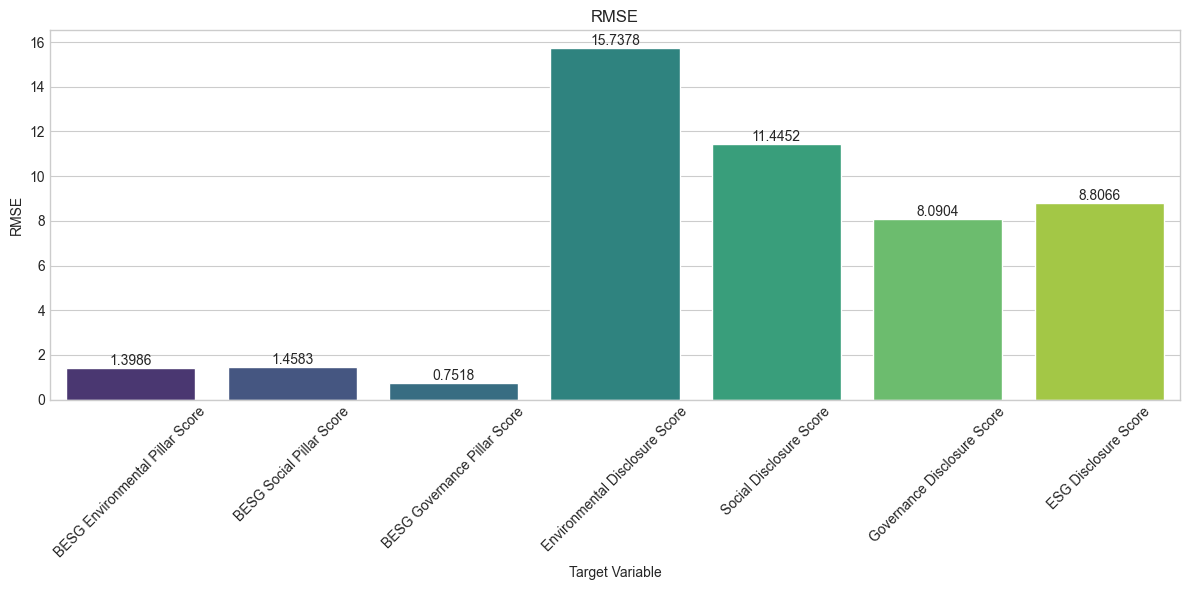

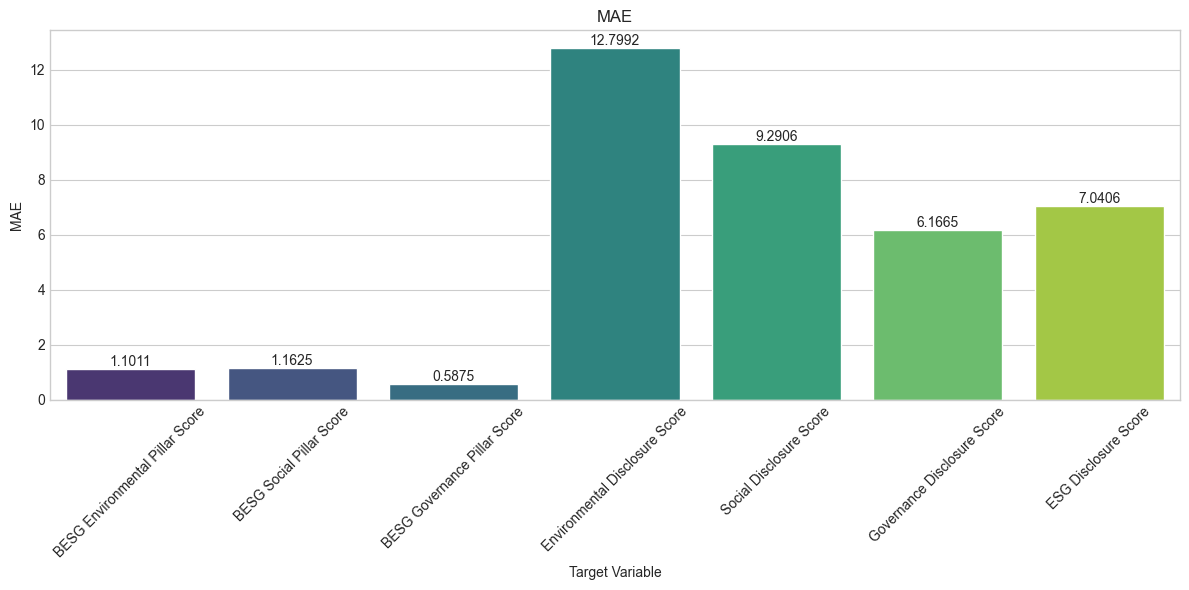

In [31]:
# Plot performance metrics for each metric
for metric in ['R² Score', 'Adjusted R² Score', 'MSE', 'RMSE', 'MAE']:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Target Variable', y=metric, data=results_df, palette='viridis')
    plt.title(f'{metric}')
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    # Annotate each bar with its value
    for index, value in enumerate(results_df[metric]):
        plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

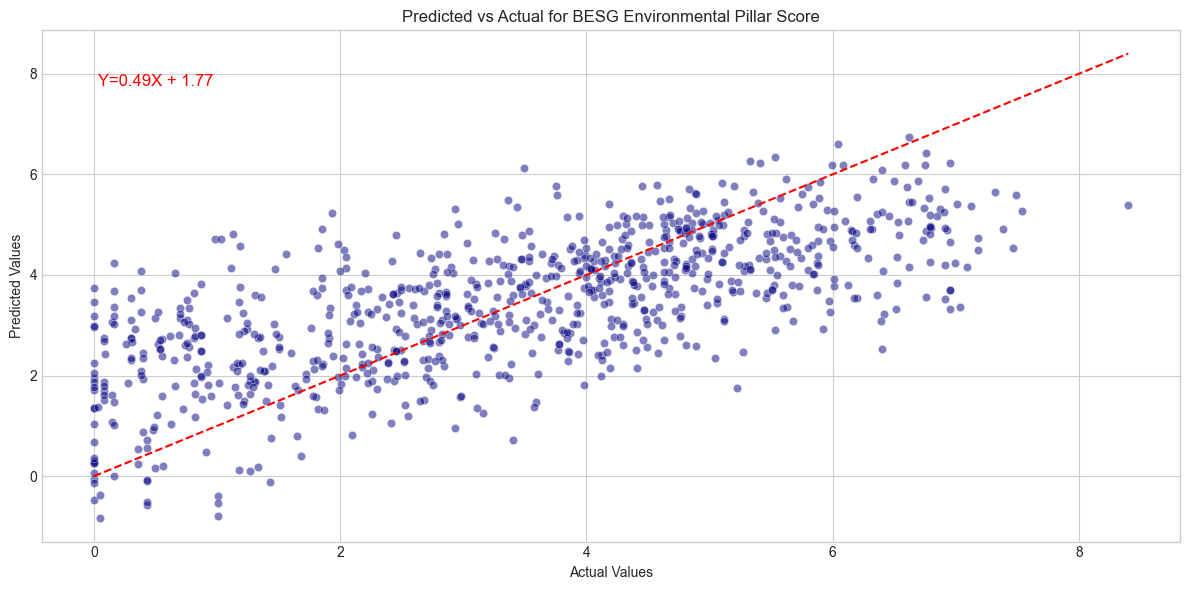

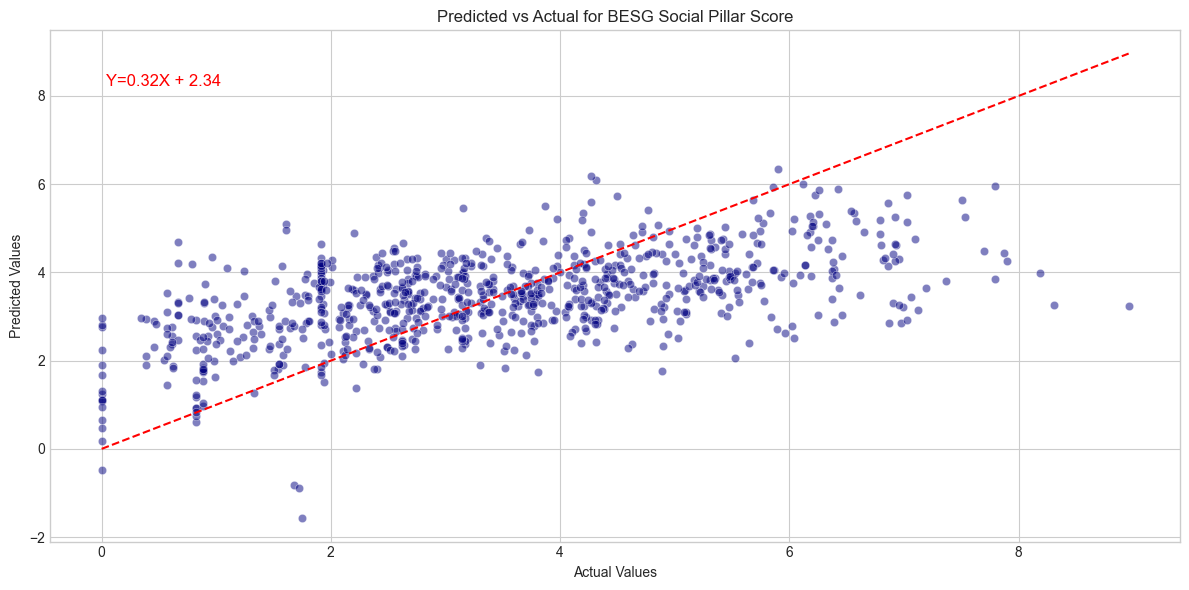

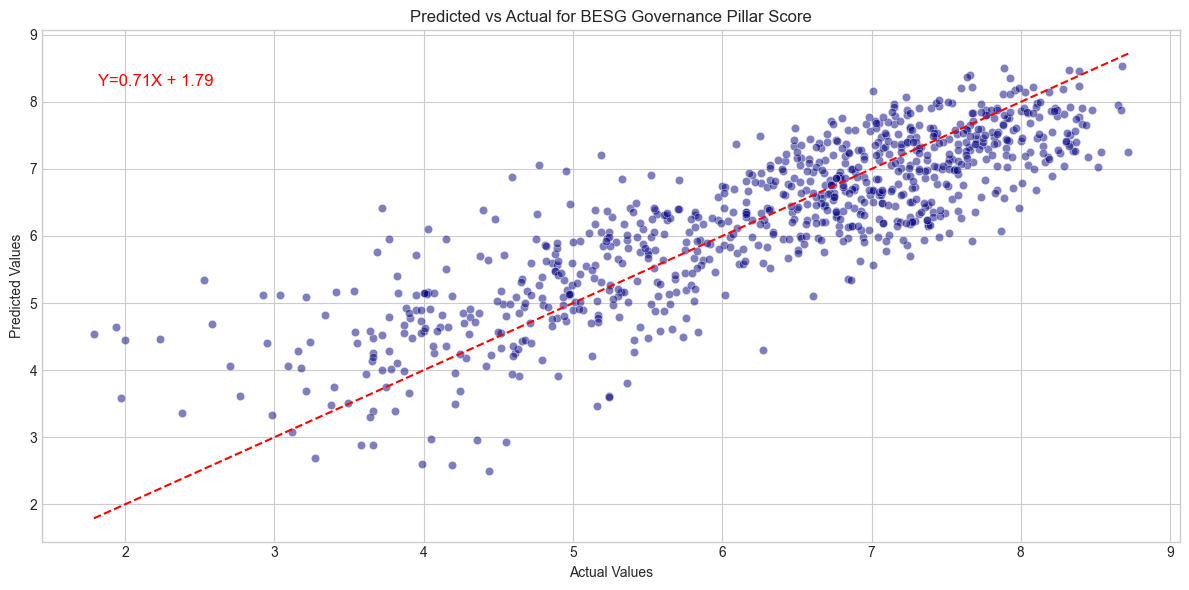

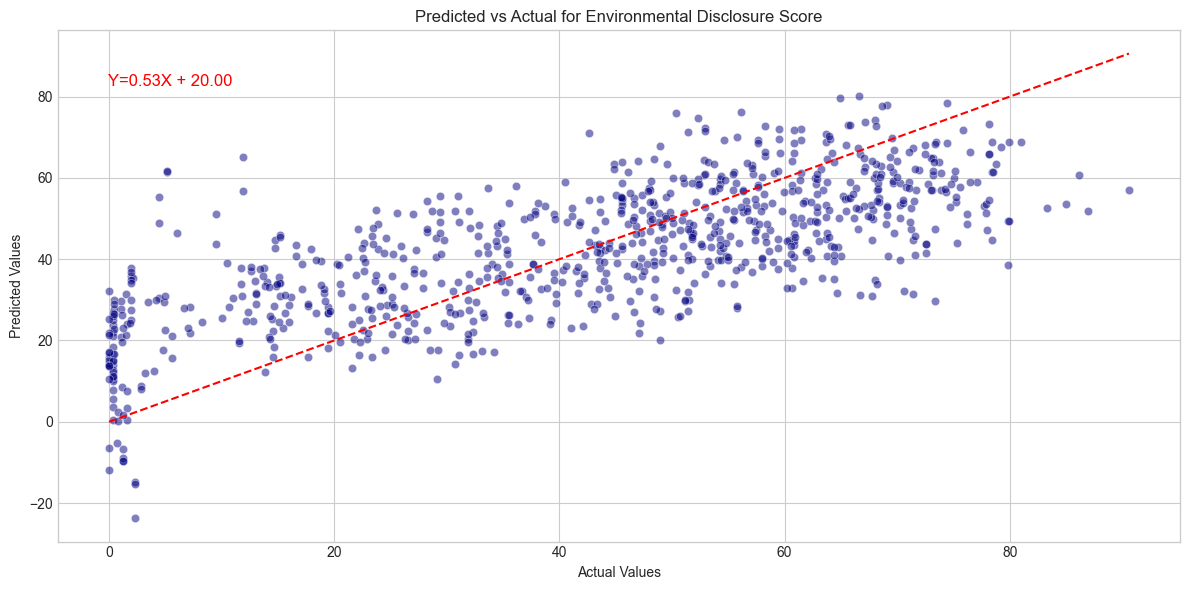

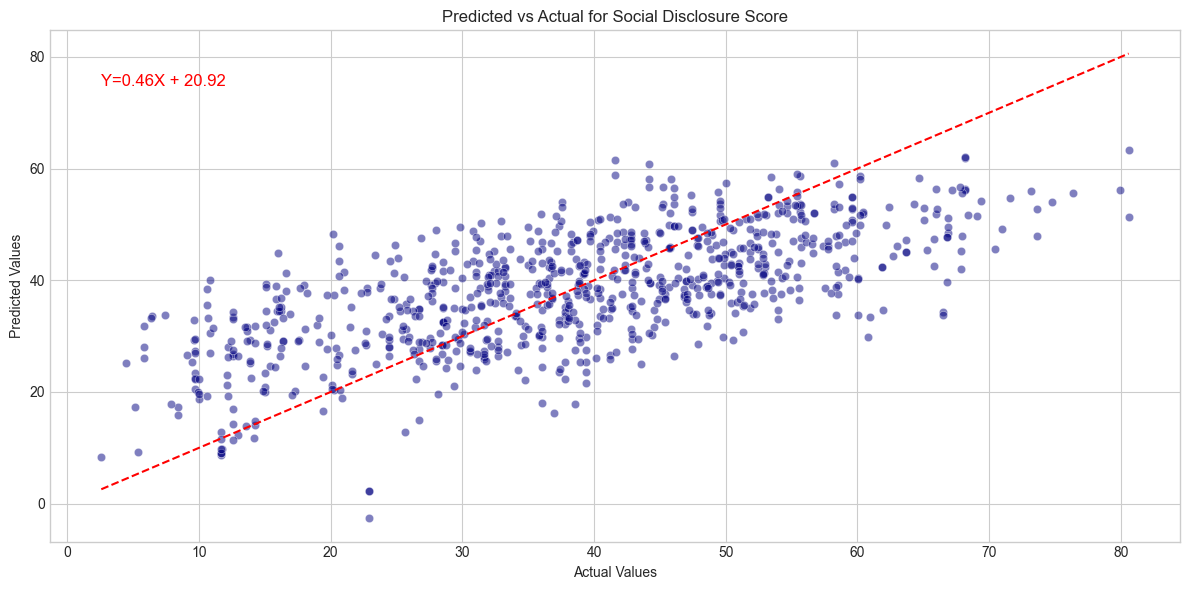

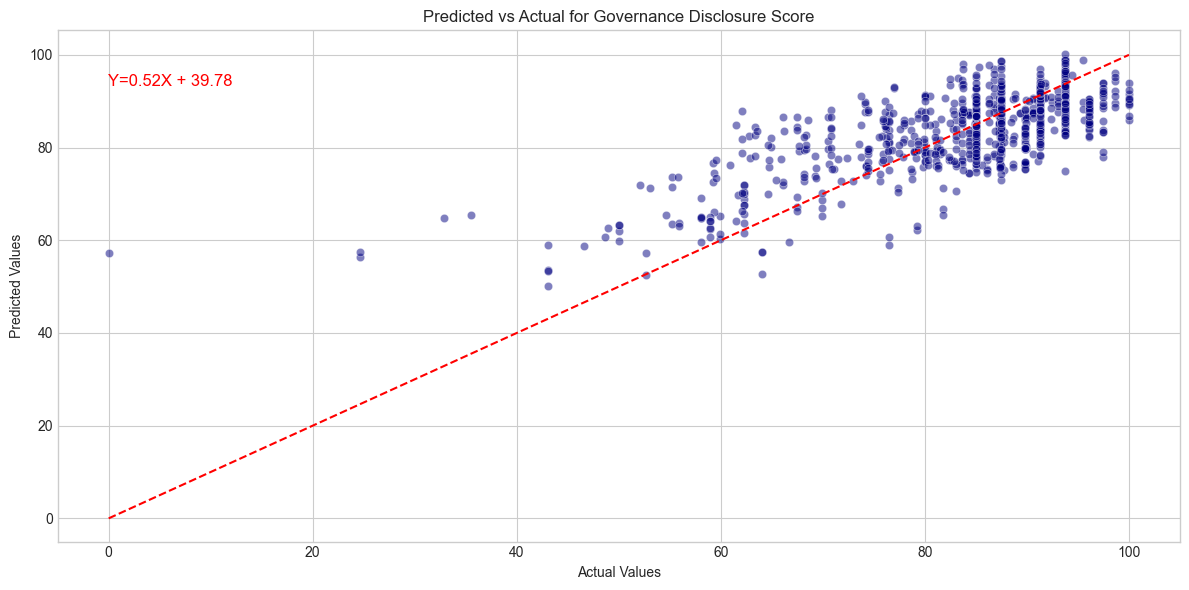

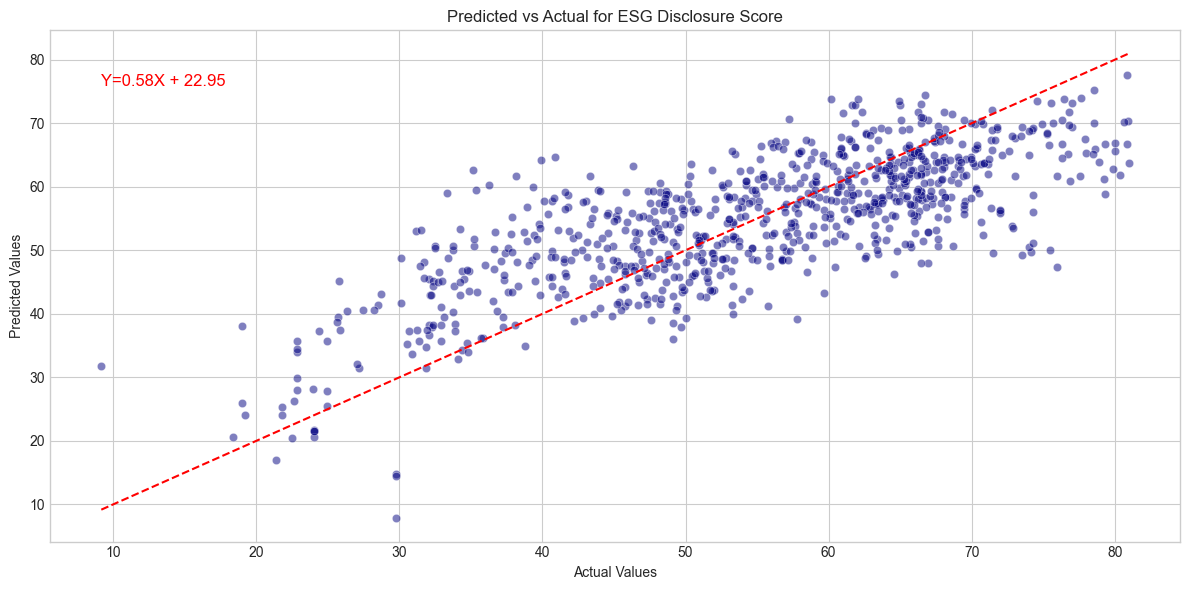

In [32]:
# Plot predicted vs actual values for each target variable
for score in pillar_scores + disclosure_scores:
    plt.figure(figsize=(12, 6))
    model = all_models[score]
    X = df_encoded[all_selected_features[score]]
    y = df_encoded[score]

    # Predict values
    y_pred = model.predict(sm.add_constant(X))

    # Scatter plot of predicted vs actual
    sns.scatterplot(x=y, y=y_pred, color='navy', alpha=0.5)
    # Add a regression line
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
    # Annotate the regression line with the gradient and intercept on top of regression line
    slope, intercept = np.polyfit(y, y_pred, 1)
    plt.annotate(f'Y={slope:.2f}X + {intercept:.2f}', xy=(0.1, 0.9), xycoords='axes fraction',
                 fontsize=12, color='red', ha='center', va='center')
    plt.title(f'Predicted vs Actual for {score}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 5. Random Forest Regression

In [33]:
# Function to train and evaluate a Random Forest model
def model_score_with_rf(df, target_score, test_size=0.2, random_state=42, threshold=0.3):
    """
    Model to predict any target score using Random Forest regression

    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe with all data
    target_score : str
        Name of the target score to predict
    test_size : float
        Proportion of the dataset to include in the test split
    random_state : int
        Random seed for reproducibility
    threshold : float
        Minimum completeness threshold for features

    Returns:
    --------
    model : RandomForestRegressor
        Fitted Random Forest model
    r2_score : float
        R-squared score of the model
    feature_importances : pandas.Series
        Feature importances from the model
    results : dict
        Dictionary containing various performance metrics
    """
    print(f"\nRandom Forest Modeling for {target_score}:")

    # Define columns to exclude (all scores except the target)
    scores_to_exclude = [
        'BESG ESG Score', 'BESG Environmental Pillar Score',
        'BESG Social Pillar Score', 'BESG Governance Pillar Score',
        'ESG Disclosure Score', 'Environmental Disclosure Score',
        'Social Disclosure Score', 'Governance Disclosure Score'
    ]

    # Non-numeric columns to exclude
    other_cols_to_exclude = ['Company', 'Ticker', 'Year']

    # All columns to exclude
    cols_to_exclude = scores_to_exclude + other_cols_to_exclude

    # Remove target score from exclusion list
    cols_to_exclude = [col for col in cols_to_exclude if col != target_score]

    # Exclude columns
    df_model = df.drop(columns=[col for col in cols_to_exclude if col in df.columns])

    # Prepare data
    X, y, valid_features = prepare_data_for_modeling(df_model, target_score, threshold)

    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=random_state, n_jobs=-1)
    rf_model.fit(X, y)

    # Calculate metrics
    y_pred_train = rf_model.predict(X)
    y_pred_test = rf_model.predict(X)

    r2 = r2_score(y, y_pred_test)
    mse = mean_squared_error(y, y_pred_test)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y - y_pred_test))
    adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

    # Get feature importances
    feature_importances = pd.Series(
        rf_model.feature_importances_,
        index=valid_features
    ).sort_values(ascending=False)

    # Print results
    print(f"R² score: {r2:.4f}")
    print(f"Adjusted R² score: {adjusted_r2:.4f}")
    print(f"Top 10 important features: {feature_importances.head(10).index.tolist()}")

    return target_score, rf_model, feature_importances, r2, adjusted_r2, mse, rmse, mae

In [34]:
# Dictionary to store RF models and results
rf_target_scores = {}
rf_models = {}
rf_feature_importances = {}
rf_r2_scores = {}
rf_adjusted_r2_scores = {}
rf_mse_scores = {}
rf_rmse_scores = {}
rf_mae_scores = {}

# List of all target scores
pillar_scores = [
    'BESG Environmental Pillar Score',
    'BESG Social Pillar Score',
    'BESG Governance Pillar Score'
]

disclosure_scores = [
    'Environmental Disclosure Score',
    'Social Disclosure Score',
    'Governance Disclosure Score',
    'ESG Disclosure Score'
]

# Run Random Forest for each score
for score in pillar_scores + disclosure_scores:
    predictor, rf_model, importances, score, adjusted_r2, mse, rmse, mae = model_score_with_rf(df_encoded, score)
    rf_target_scores[predictor] = predictor
    rf_models[predictor] = rf_model
    rf_feature_importances[predictor] = importances
    rf_r2_scores[score] = score
    rf_adjusted_r2_scores[score] = adjusted_r2
    rf_mse_scores[score] = mse
    rf_rmse_scores[score] = rmse
    rf_mae_scores[score] = mae

# Create a DataFrame to summarize the results
rf_results_df = pd.DataFrame({
    'Target Variable': rf_target_scores.values(),
    'R² Score': rf_r2_scores.values(),
    'Adjusted R² Score': rf_adjusted_r2_scores.values(),
    'MSE': rf_mse_scores.values(),
    'RMSE': rf_rmse_scores.values(),
    'MAE': rf_mae_scores.values()
})


Random Forest Modeling for BESG Environmental Pillar Score:
R² score: 0.9567
Adjusted R² score: 0.9550
Top 10 important features: ['GHG Scope 1', 'Number of Employees - CSR', 'Total Recordable Incident Rate - Employees', 'Pct Women in Workforce', 'Number of Women on Board', 'Years Auditor Employed', 'GHG Scope 2 Location-Based', 'Board Size', 'Number of Executives / Company Managers', 'Total Water Withdrawal']

Random Forest Modeling for BESG Social Pillar Score:
R² score: 0.9426
Adjusted R² score: 0.9403
Top 10 important features: ['Total Recordable Incident Rate - Employees', 'GHG Scope 1', 'Number of Non Executive Directors on Board', 'Number of Employees - CSR', 'GHG Scope 2 Location-Based', 'Total Water Withdrawal', 'Pct Women in Workforce', 'Number of Compensation Committee Meetings', 'Years Auditor Employed', 'Number of Executives / Company Managers']

Random Forest Modeling for BESG Governance Pillar Score:
R² score: 0.9745
Adjusted R² score: 0.9735
Top 10 important features: 

In [35]:
# Compare R² scores
print("\n=== Model Performance Summary ===")
print(rf_results_df.sort_values(by='R² Score', ascending=False).to_string(index=False))

# Summary of features used in each model
print("\n=== Feature Importances for Each Model ===")
for score, importances in rf_feature_importances.items():
    print(f"{score}: Top 10 important features")
    print(f"  {importances.head(10).index.tolist()}")


=== Model Performance Summary ===
                Target Variable  R² Score  Adjusted R² Score       MSE     RMSE      MAE
   BESG Governance Pillar Score  0.974515           0.973517  0.050433 0.224573 0.160541
           ESG Disclosure Score  0.972678           0.971608  5.049911 2.247201 1.654156
 Environmental Disclosure Score  0.970175           0.969007 15.604266 3.950224 2.901237
    Governance Disclosure Score  0.966847           0.965548  4.545528 2.132024 1.412481
        Social Disclosure Score  0.964393           0.962998  8.559937 2.925737 2.206349
BESG Environmental Pillar Score  0.956729           0.955034  0.164589 0.405696 0.304546
       BESG Social Pillar Score  0.942582           0.940333  0.178617 0.422631 0.318401

=== Feature Importances for Each Model ===
BESG Environmental Pillar Score: Top 10 important features
  ['GHG Scope 1', 'Number of Employees - CSR', 'Total Recordable Incident Rate - Employees', 'Pct Women in Workforce', 'Number of Women on Board', 'Ye

In [36]:
# Compare with OLS results

comparison_df = pd.DataFrame({
    'Target Variable': rf_results_df['Target Variable'],
    'R² Score (RF)': rf_results_df['R² Score'],
    'Adjusted R² Score (RF)': rf_results_df['Adjusted R² Score'],
    'MSE (RF)': rf_results_df['MSE'],
    'RMSE (RF)': rf_results_df['RMSE'],
    'MAE (RF)': rf_results_df['MAE']
})

# Merge with OLS results
comparison_df = comparison_df.merge(results_df, on='Target Variable', how='left')
comparison_df.columns = [
    'Target Variable',
    'R² Score (RF)',
    'Adjusted R² Score (RF)',
    'MSE (RF)',
    'RMSE (RF)',
    'MAE (RF)',
    'R² Score (OLS)',
    'Adjusted R² Score (OLS)',
    'MSE (OLS)',
    'RMSE (OLS)',
    'MAE (OLS)'
]

# Display the comparison DataFrame
print("\n=== Comparison of Random Forest and OLS Models ===")
print(comparison_df)


=== Comparison of Random Forest and OLS Models ===
                   Target Variable  R² Score (RF)  Adjusted R² Score (RF)  \
0  BESG Environmental Pillar Score       0.956729                0.955034   
1         BESG Social Pillar Score       0.942582                0.940333   
2     BESG Governance Pillar Score       0.974515                0.973517   
3   Environmental Disclosure Score       0.970175                0.969007   
4          Social Disclosure Score       0.964393                0.962998   
5      Governance Disclosure Score       0.966847                0.965548   
6             ESG Disclosure Score       0.972678                0.971608   

    MSE (RF)  RMSE (RF)  MAE (RF)  R² Score (OLS)  Adjusted R² Score (OLS)  \
0   0.164589   0.405696  0.304546        0.485708                 0.477085   
1   0.178617   0.422631  0.318401        0.316399                 0.306598   
2   0.050433   0.224573  0.160541        0.714411                 0.709623   
3  15.604266   3.95

In [37]:
# Create melted DataFrame for easier plotting
comparison_melted = comparison_df.melt(id_vars='Target Variable',
                                        value_vars=[
                                            'R² Score (RF)', 'R² Score (OLS)',
                                            'Adjusted R² Score (RF)', 'Adjusted R² Score (OLS)',
                                            'MSE (RF)', 'MSE (OLS)',
                                            'RMSE (RF)', 'RMSE (OLS)',
                                            'MAE (RF)', 'MAE (OLS)'
                                        ],
                                        var_name='Metric', value_name='Value')

# Create column for model type
comparison_melted['Model Type'] = comparison_melted['Metric'].apply(lambda x: 'RF' if 'RF' in x else 'OLS')
comparison_melted['Metric'] = comparison_melted['Metric'].str.replace(r' \(.*\)', '', regex=True)

print(comparison_melted)

                    Target Variable    Metric      Value Model Type
0   BESG Environmental Pillar Score  R² Score   0.956729         RF
1          BESG Social Pillar Score  R² Score   0.942582         RF
2      BESG Governance Pillar Score  R² Score   0.974515         RF
3    Environmental Disclosure Score  R² Score   0.970175         RF
4           Social Disclosure Score  R² Score   0.964393         RF
..                              ...       ...        ...        ...
65     BESG Governance Pillar Score       MAE   0.587528        OLS
66   Environmental Disclosure Score       MAE  12.799185        OLS
67          Social Disclosure Score       MAE   9.290647        OLS
68      Governance Disclosure Score       MAE   6.166526        OLS
69             ESG Disclosure Score       MAE   7.040635        OLS

[70 rows x 4 columns]


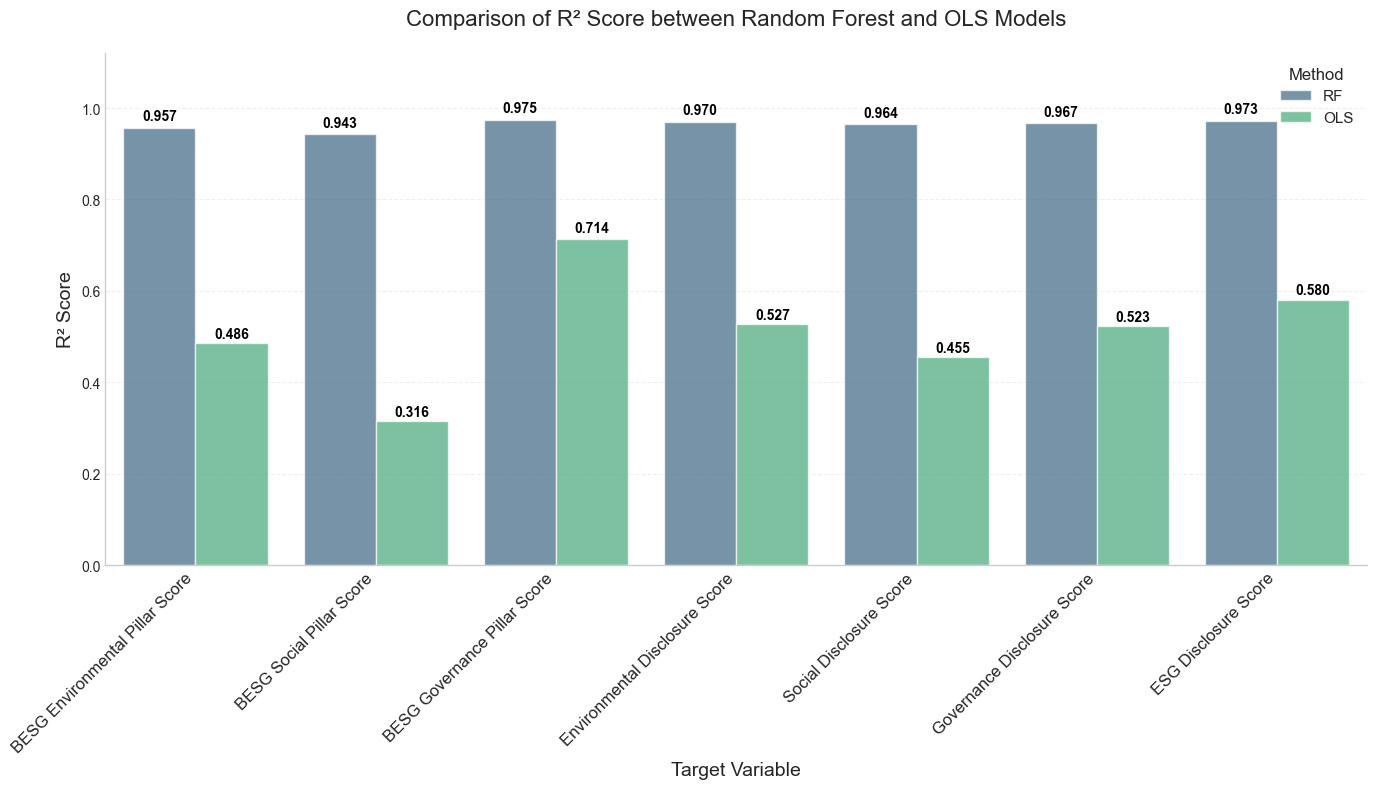

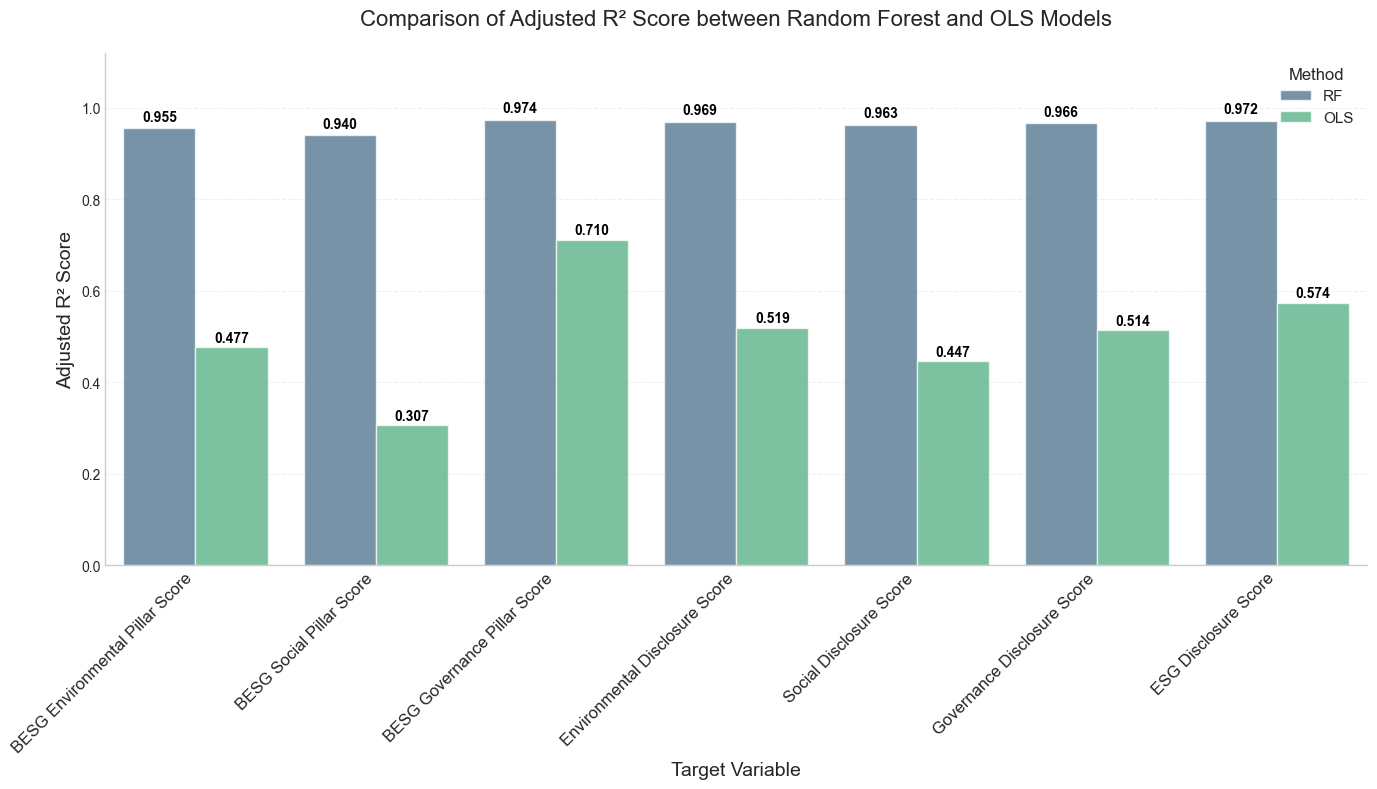

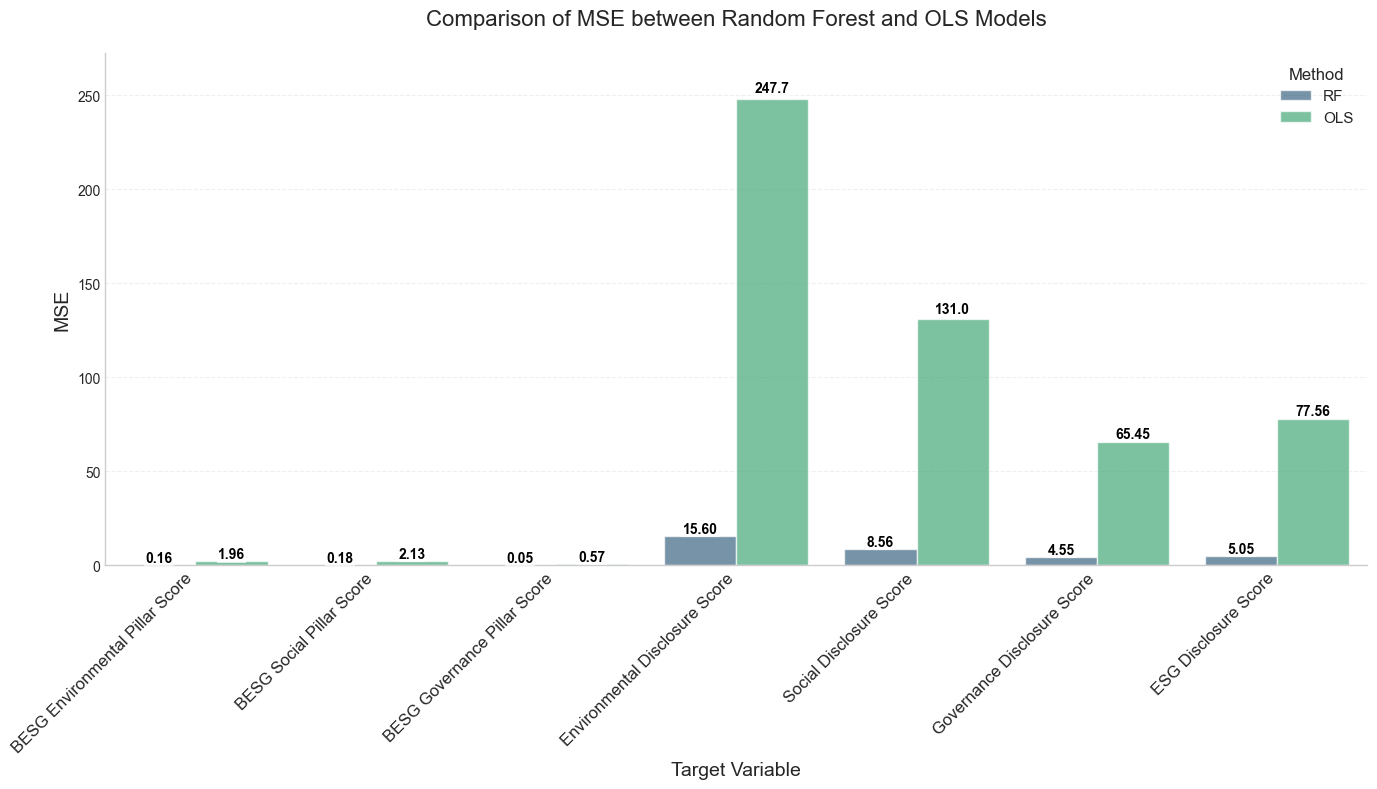

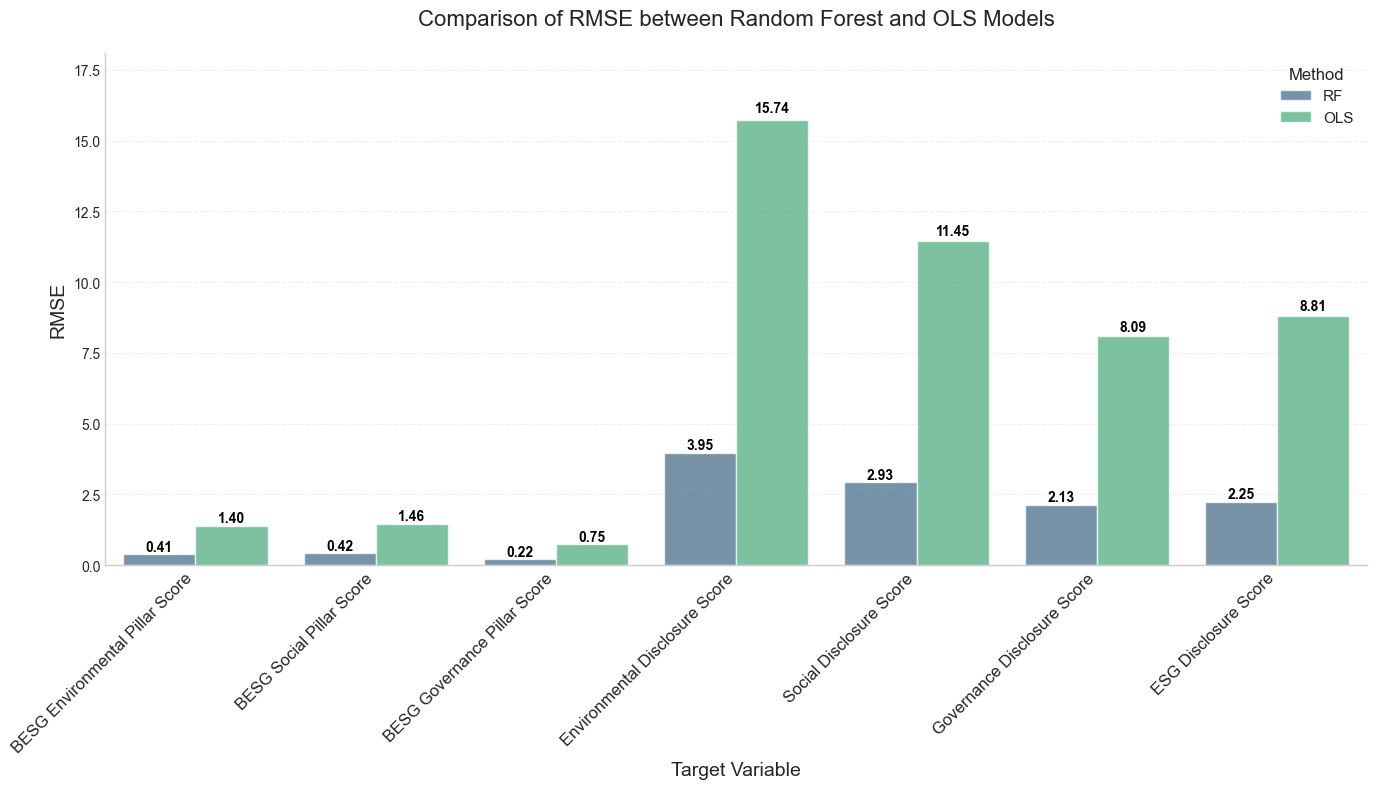

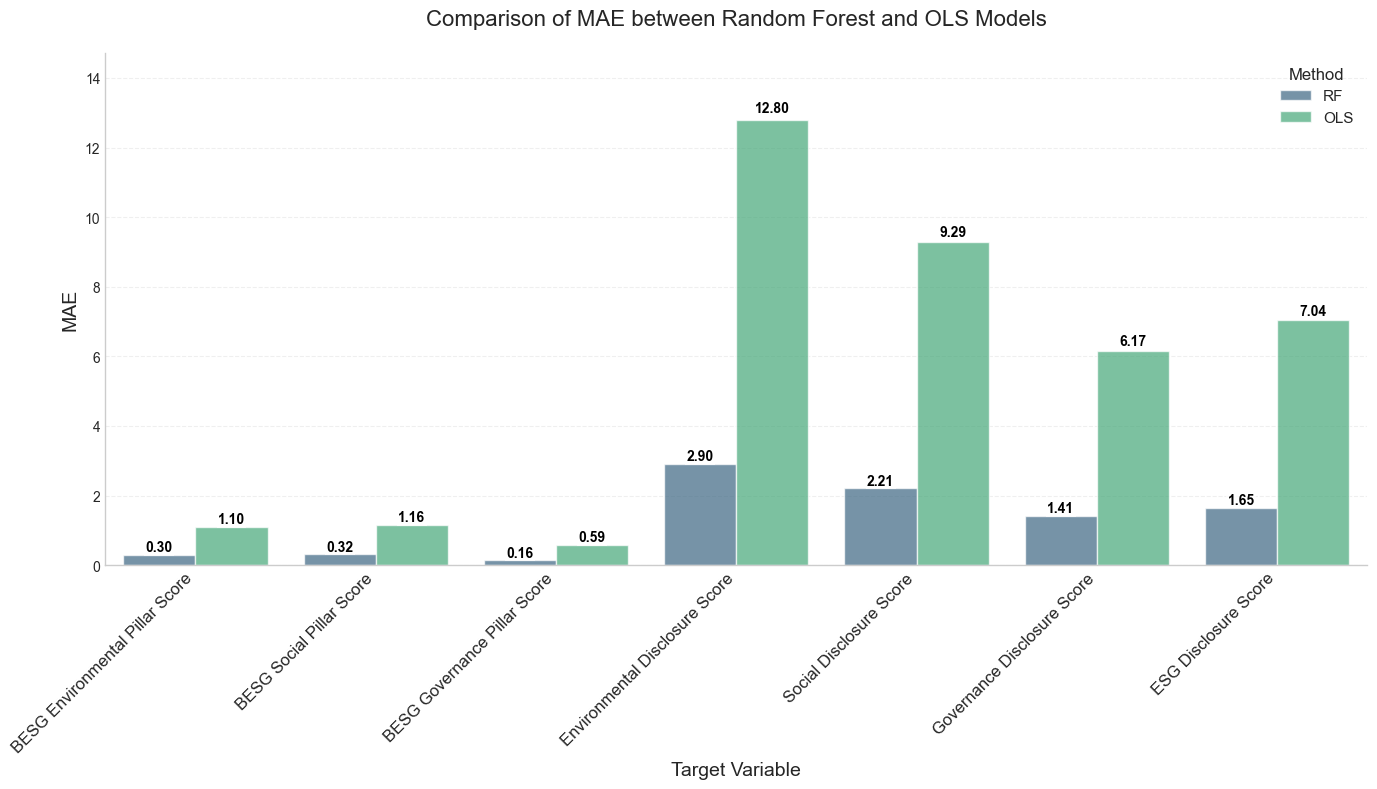

In [38]:
# Plot performance metrics for each metric
for metric in ['R² Score', 'Adjusted R² Score', 'MSE', 'RMSE', 'MAE']:
    plt.figure(figsize=(14, 8))

    # Get the data for the current metric
    metric_data = comparison_melted[comparison_melted['Metric'] == metric]

    # Create the bar plot with improved aesthetics
    ax = sns.barplot(x='Target Variable', y='Value', hue='Model Type', data=metric_data,
                    palette='viridis', alpha=0.7, linewidth=1)

    # Add a title with better formatting
    plt.title(f'Comparison of {metric} between Random Forest and OLS Models',
              fontsize=16, pad=20)

    # Improve axis labels
    plt.ylabel(metric, fontsize=14)
    plt.xlabel('Target Variable', fontsize=14)

    # Format x-tick labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Annotate each bar with its value, formatting based on metric type
    for i, p in enumerate(ax.patches):
        val = p.get_height()
        # Format differently for different metrics
        if 'R²' in metric:
            # Format as percentage for R² metrics
            txt = f'{val:.3f}'
        elif metric == 'MSE' and val > 100:
            # For large MSE values, use scientific notation
            txt = f'{val:.1f}'
        else:
            # For smaller values, show decimal places
            txt = f'{val:.2f}'

        # Position the text properly and only show if value is > 0
        if val > 0:
            ax.text(p.get_x() + p.get_width()/2, val * 1.01,
                    txt, ha='center', va='bottom', fontsize=10, fontweight='bold',
                    color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

    # Add a grid for easier comparison
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Improve legend
    plt.legend(title='Method', title_fontsize=12, fontsize=11,
               edgecolor='gray', fancybox=True, framealpha=0.9)

    # Set appropriate y-axis limits based on the metric
    if metric == 'MSE':
        # For MSE, which can have large values
        plt.ylim(0, max(metric_data['Value']) * 1.1)
    else:
        # For other metrics
        plt.ylim(0, max(metric_data['Value']) * 1.15)

    # Remove top and right spines for cleaner look
    sns.despine()

    # Ensure layout is tight
    plt.tight_layout()

    # Show the plot
    plt.show()


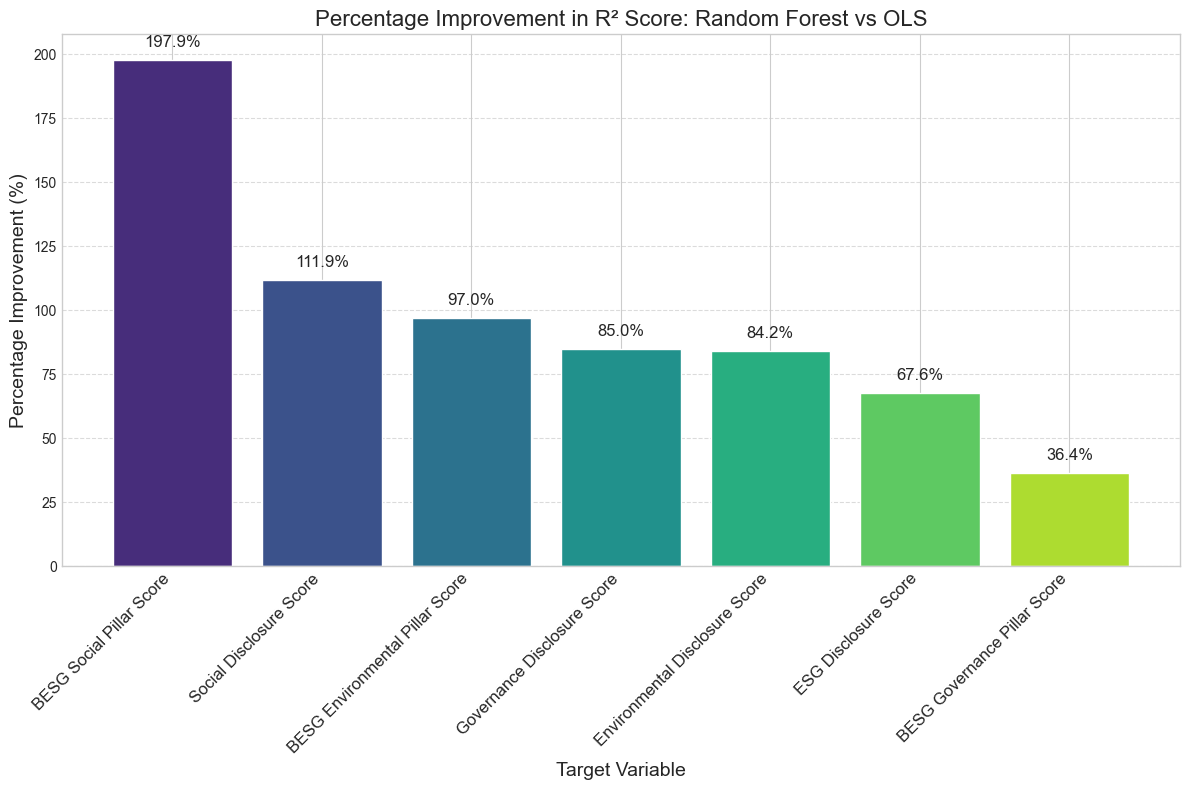

In [39]:
improvement_data = comparison_df[['Target Variable', 'R² Score (RF)', 'R² Score (OLS)']].copy()
improvement_data['Improvement Ratio'] = improvement_data['R² Score (RF)'] / improvement_data['R² Score (OLS)']
improvement_data['Percentage Improvement'] = (improvement_data['R² Score (RF)'] - improvement_data['R² Score (OLS)']) / improvement_data['R² Score (OLS)'] * 100

# Sort by improvement percentage
improvement_data = improvement_data.sort_values('Percentage Improvement', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(
    improvement_data['Target Variable'],
    improvement_data['Percentage Improvement'],
    color=sns.color_palette('viridis', len(improvement_data))
)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 5,
        f'{height:.1f}%',
        ha='center', fontsize=12
    )

plt.title('Percentage Improvement in R² Score: Random Forest vs OLS', fontsize=16)
plt.xlabel('Target Variable', fontsize=14)
plt.ylabel('Percentage Improvement (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

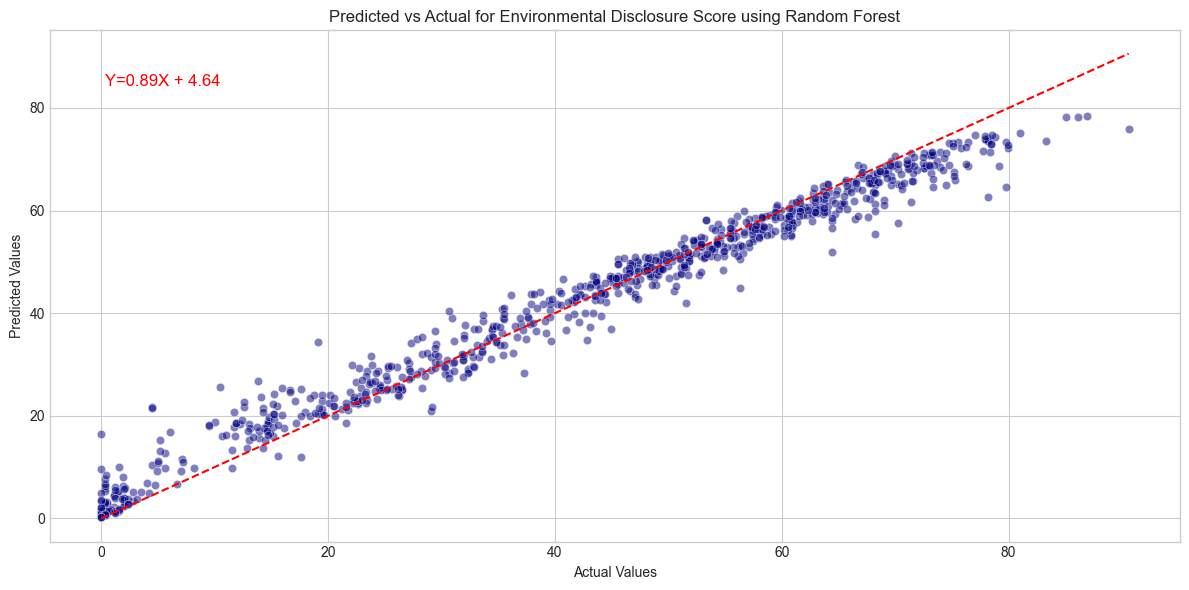

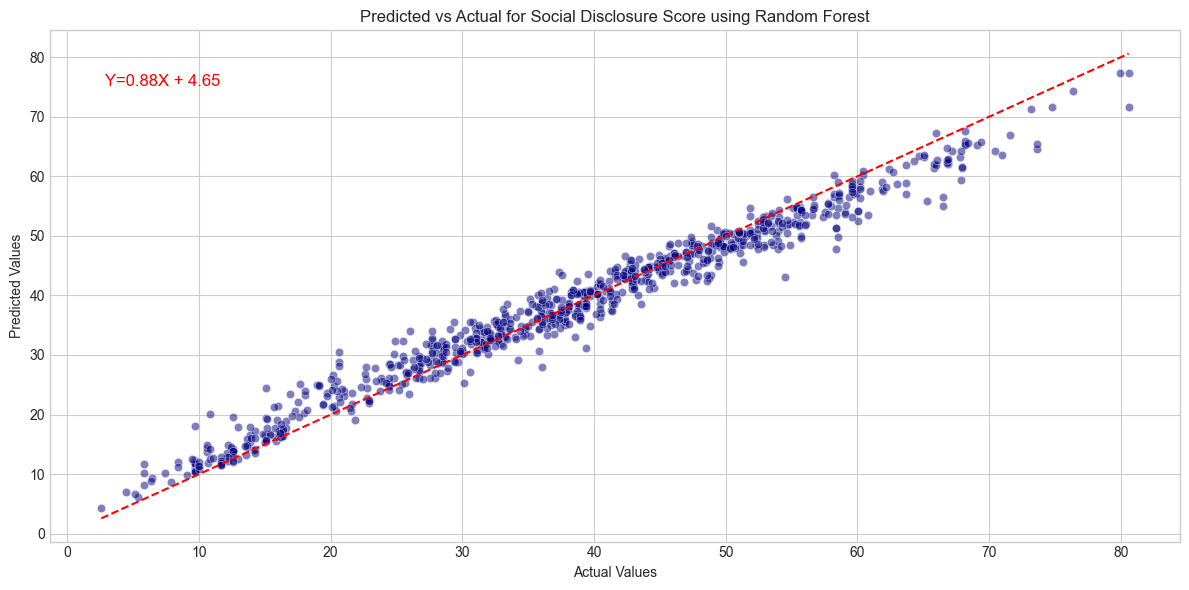

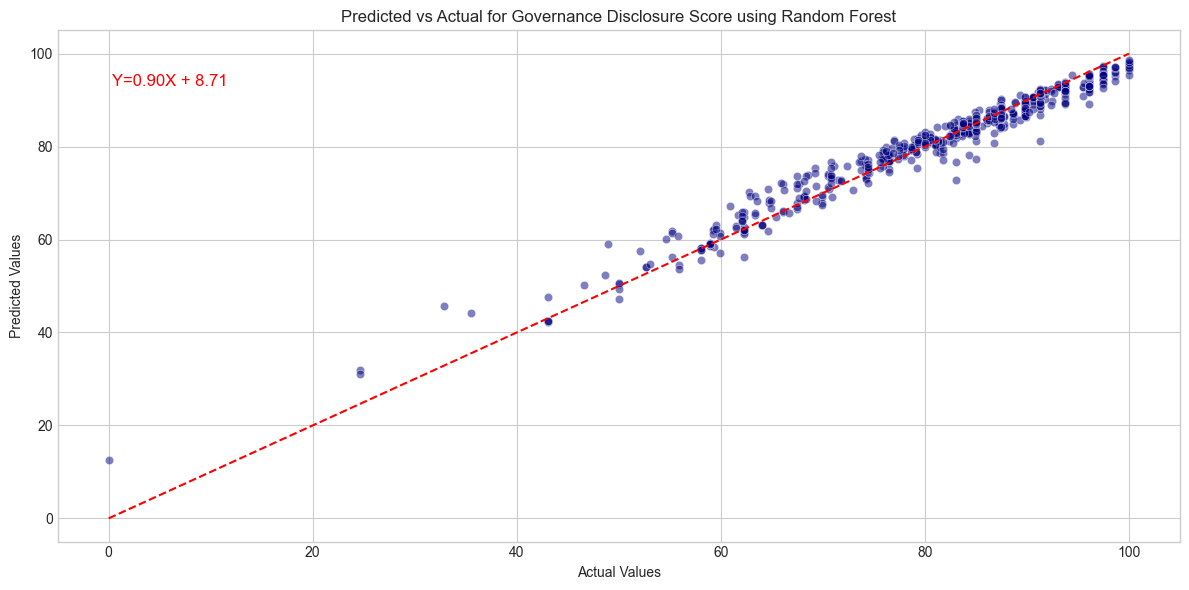

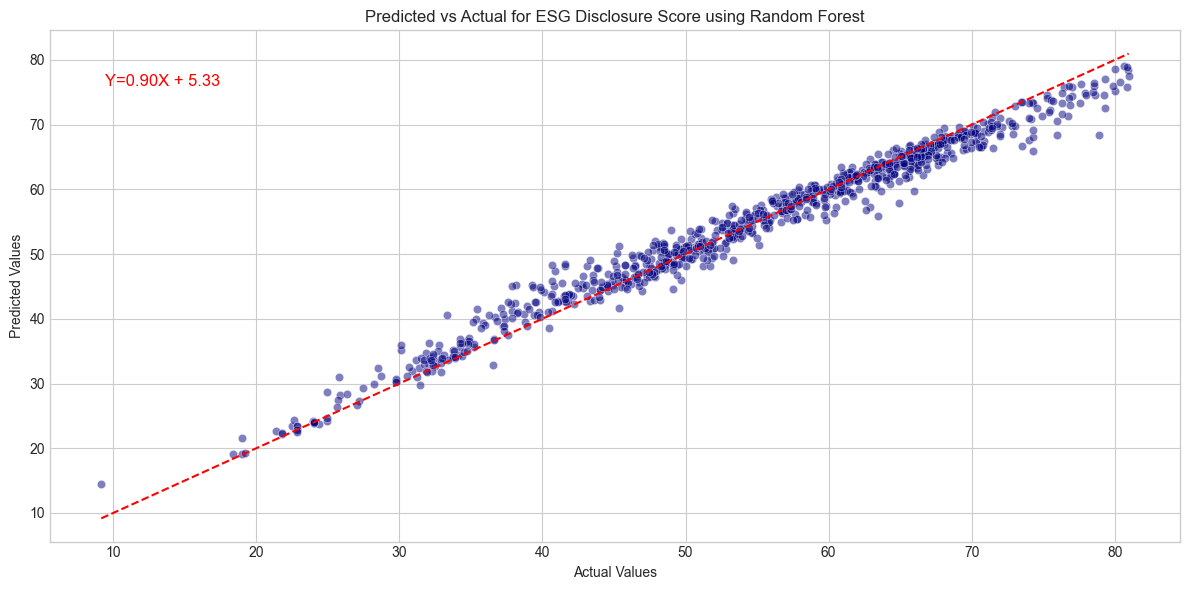

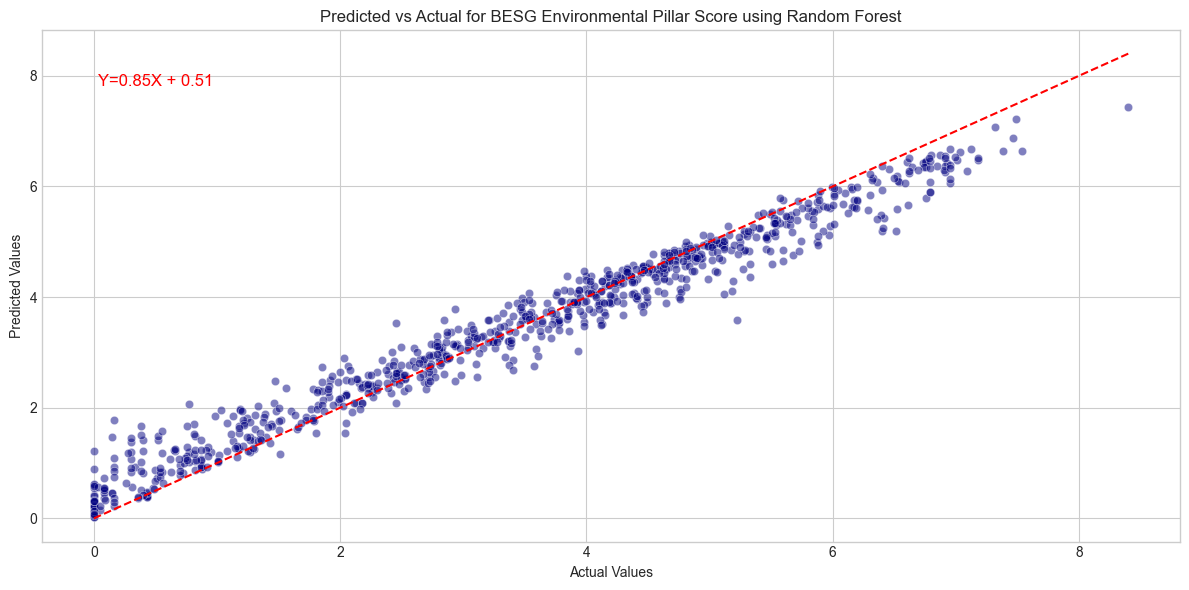

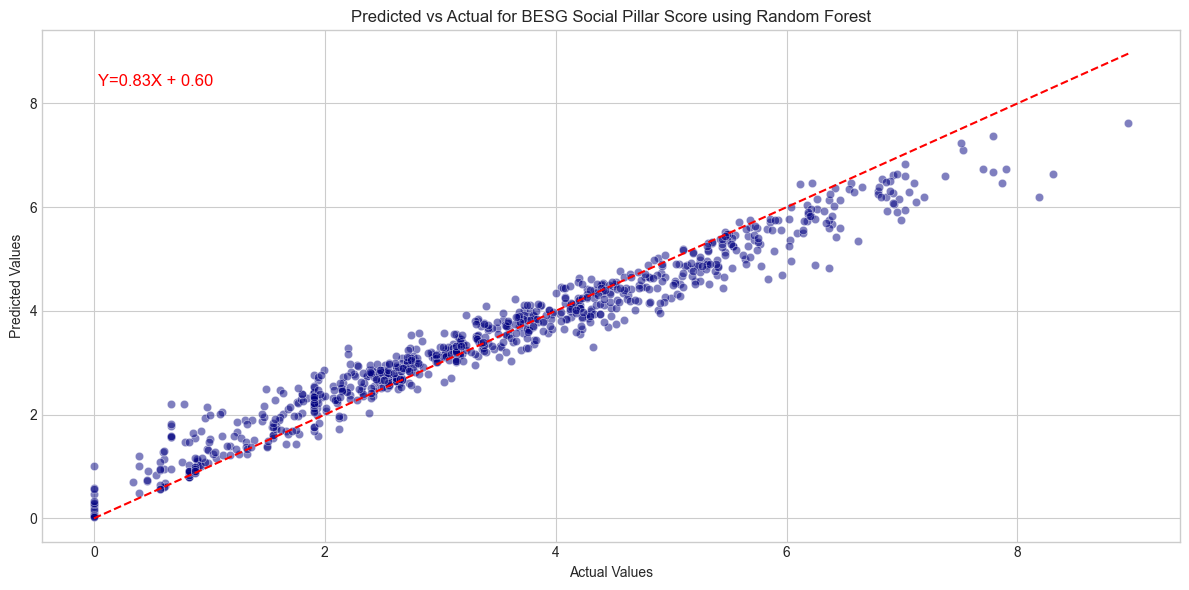

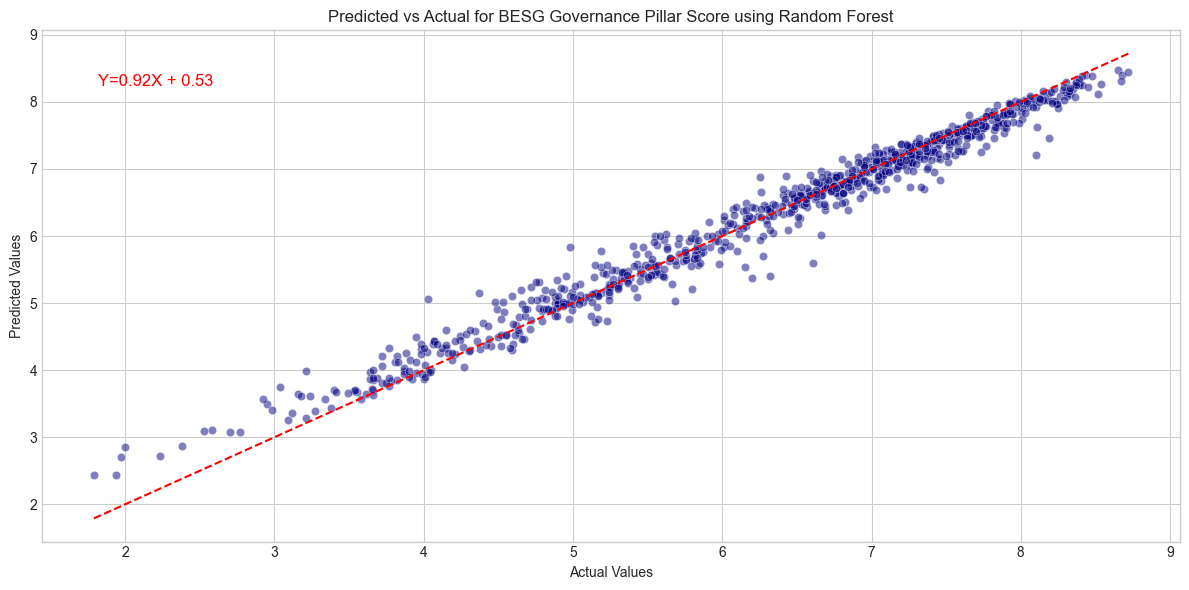

In [40]:
# Plot predicted vs actual values for each target variable using Random Forest
for score in disclosure_scores + pillar_scores:
    plt.figure(figsize=(12, 6))
    model = rf_models[score]

    # Recreate the same preprocessing used during training
    # Define columns to exclude (all scores except the target)
    scores_to_exclude = [
        'BESG ESG Score', 'BESG Environmental Pillar Score',
        'BESG Social Pillar Score', 'BESG Governance Pillar Score',
        'ESG Disclosure Score', 'Environmental Disclosure Score',
        'Social Disclosure Score', 'Governance Disclosure Score'
    ]

    # Non-numeric columns to exclude
    other_cols_to_exclude = ['Company', 'Ticker', 'Year']

    # All columns to exclude
    cols_to_exclude = scores_to_exclude + other_cols_to_exclude

    # Remove target score from exclusion list
    cols_to_exclude = [col for col in cols_to_exclude if col != score]

    # Exclude columns
    df_model = df_encoded.drop(columns=[col for col in cols_to_exclude if col in df_encoded.columns])

    # Prepare data (same as during training)
    X, y, _ = prepare_data_for_modeling(df_model, score, threshold=0.3)

    # Predict values
    y_pred = model.predict(X)

    # Scatter plot of predicted vs actual
    sns.scatterplot(x=y, y=y_pred, color='navy', alpha=0.5)
    # Add a regression line
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
    # Annotate the regression line with the gradient and intercept on top of regression line
    slope, intercept = np.polyfit(y, y_pred, 1)
    plt.annotate(f'Y={slope:.2f}X + {intercept:.2f}', xy=(0.1, 0.9), xycoords='axes fraction',
                 fontsize=12, color='red', ha='center', va='center')
    plt.title(f'Predicted vs Actual for {score} using Random Forest')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.tight_layout()
    plt.show()